# BFSI Capstone Project- CredX default customer analysis

## Section 1: Import Libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api   as sm
from sklearn.preprocessing     import scale
from sklearn.decomposition     import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing     import StandardScaler,scale
from sklearn.preprocessing     import LabelEncoder
from sklearn.model_selection   import train_test_split
from sklearn.linear_model      import LogisticRegression
from sklearn.model_selection   import KFold
from sklearn.model_selection   import cross_val_score
from sklearn.model_selection   import GridSearchCV
from sklearn.ensemble          import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from imblearn.combine          import SMOTETomek
from sklearn.ensemble          import AdaBoostClassifier
from imblearn                  import under_sampling, over_sampling
from imblearn.over_sampling    import SMOTE
from sklearn.svm               import SVC
from sklearn                   import metrics
from sklearn.utils             import resample
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.naive_bayes       import BernoulliNB
from sklearn.metrics           import classification_report,accuracy_score,confusion_matrix,roc_curve,auc,precision_score, recall_score, f1_score, roc_auc_score
from matplotlib.pyplot   import xticks
%matplotlib inline

# Section 2: Import datasets

In [2]:
demo = pd.read_csv("Demographic data.csv")
cred = pd.read_csv("Credit Bureau data.csv")

# Section 3: Exploratory data analysis

In [3]:
demo.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [4]:
#To know no.of rows & columns in a dataframe
demo.shape

(71295, 12)

In [5]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [6]:
#Verify statistical details of dataframe
demo.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [7]:
#Verifying the missing values percentage in demo dataset
round(100*(demo.isnull().sum()/len(demo.index)), 2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

In [8]:
#Total nulls in demo dataset
demo.isnull().sum(axis=0)

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [9]:
cred.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [10]:
#To know no.of rows & columns in a dataframe
cred.shape

(71295, 19)

In [11]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [12]:
#Verify statistical details of dataframe
cred.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [13]:
#Verifying the missing values
round(100*(cred.isnull().sum()/len(cred.index)), 2)

Application ID                                                     0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
Avgas CC Utilization in last 12 months                             1.48
No of trades opened in last 6 months                               0.00
No of trades opened in last 12 months                              0.00
No of PL trades opened in last 6 months                            0.00
No of PL trades opened in last 12 months                           0.00
No of Inquiries in last 6 months (excluding home & auto loans)     0.00
No of Inquiries in last 12 months (excluding home & auto loans) 

In [14]:
#Total nulls in demo dataset#Total nulls in cred dataset
cred.isnull().sum(axis=0)

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [15]:
print(cred.columns)

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')


#### Rename columns in both data sets

In [16]:
demo.rename(columns={'Application ID' : 'Application_ID',                     
                    'Marital Status (at the time of application)' : 'Marital_Status',
                     'No of dependents' : 'No_of_dependents',
                     'Profession ' : 'Profession',
                     'Type of residence' : 'Type_of_residence',
                     'No of months in current residence' : 'No_of_months_in_current_residence',
                     'No of months in current company' : 'No_of_months_in_current_company',
                     'Performance Tag' : 'Performance_Tag_demo'
                    }, inplace = True)

In [17]:
cred.rename(columns={ 'Application ID' : 'Application_ID',                     
                     'No of times 90 DPD or worse in last 6 months' : 'No_of_times_90DPD_worse_last_6months',
                     'No of times 60 DPD or worse in last 6 months' : 'No_of_times_60DPD_worse_last_6months',
                     'No of times 30 DPD or worse in last 6 months' : 'No_of_times_30DPD_worse_last_6months',
                     'No of times 90 DPD or worse in last 12 months' : 'No_of_times_90DPD_worse_last_12months',
                     'No of times 60 DPD or worse in last 12 months' : 'No_of_times_60DPD_worse_last_12months',
                     'No of times 30 DPD or worse in last 12 months' : 'No_of_times_30DPD_worse_last_12months',
                     'Avgas CC Utilization in last 12 months' : 'AvgCC_Utilization_12months',
                     'No of trades opened in last 6 months' : 'No_of_Trades_opened_in_last_6_months',
                     'No of trades opened in last 12 months' : 'No_of_Trades_opened_in_last_12_months',
                     'No of PL trades opened in last 6 months' : 'No_of_PL_trades_opened_in_last_6_months',
                     'No of PL trades opened in last 12 months' : 'No_of_PL_trades_opened_in_last_12_months',
                     'No of Inquiries in last 6 months (excluding home & auto loans)' : 'No_of_Inq_in_last_6_months',
                     'No of Inquiries in last 12 months (excluding home & auto loans)' : 'No_of_Inq_in_last_12_months',
                     'Presence of open home loan' : 'Presence_of_open_home_loan',
                     'Outstanding Balance' : 'Outstanding_Balance',
                     'Total No of Trades': 'Total_No_of_Trades',
                     'Presence of open auto loan': 'Presence_of_open_auto_loan',
                     'Performance Tag' : 'Performance_Tag_cred'
                    }, inplace = True)

In [18]:
# Find Duplicate Data
dup1 = demo["Application_ID"]
demo[dup1.isin(dup1[dup1.duplicated()])].sort_values(by = "Application_ID")

,Application_ID,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,Performance_Tag_demo
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0


In [19]:
# Remove duplicate data
demo = demo[~dup1.isin(dup1[dup1.duplicated()])]

In [20]:
# Find Duplicate Data in cred dataset
dup2 = cred['Application_ID']
demo[dup2.isin(dup2[dup2.duplicated()])].sort_values(by = "Application_ID")

,Application_ID,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,Performance_Tag_demo


In [21]:
#Join both dataframes
master=demo.set_index('Application_ID').join(cred.set_index('Application_ID'),how='left')
master.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan,Performance_Tag_cred
Application_ID,,,,,,,,,,,,,,,,,,,,,
100450,52,M,Married,4.0,32.0,Professional,SE_PROF,Rented,79,3,...,8,2,5,1,3,1.0,3903438.0,9,0,0.0
128993,36,M,Married,4.0,13.0,Professional,SAL,Rented,6,21,...,6,1,4,4,7,0.0,741058.0,8,0,1.0
142768,55,M,Married,1.0,29.0,Phd,SAL,Rented,46,3,...,7,2,4,1,2,0.0,815325.0,9,0,0.0
176721,55,M,Married,3.0,53.0,Professional,SE_PROF,Rented,6,27,...,1,0,1,2,3,0.0,209593.0,3,0,0.0
197956,28,F,Married,3.0,35.0,Masters,SAL,Rented,6,43,...,13,5,5,6,11,0.0,992024.0,25,0,0.0


In [22]:
# Verify statistical details of 'Performance tag' in both datasets

perf_tag = master[['Performance_Tag_cred','Performance_Tag_demo']]
perf_tag.describe()

,Performance_Tag_cred,Performance_Tag_demo
count,69864.000000,69864.000000
mean,0.042182,0.042182
std,0.201006,0.201006
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [23]:
perf_tag.head(10), perf_tag.tail(10)

(                Performance_Tag_cred  Performance_Tag_demo
 Application_ID                                            
 100450                           0.0                   0.0
 128993                           1.0                   1.0
 142768                           0.0                   0.0
 176721                           0.0                   0.0
 197956                           0.0                   0.0
 203973                           0.0                   0.0
 207075                           NaN                   NaN
 210394                           0.0                   0.0
 223052                           0.0                   0.0
 237197                           0.0                   0.0,
                 Performance_Tag_cred  Performance_Tag_demo
 Application_ID                                            
 999967793                        0.0                   0.0
 999970567                        0.0                   0.0
 999972578                        0.0  

In [24]:
master['Performance_Tag_cred'].value_counts()

0.0    66917
1.0     2947
Name: Performance_Tag_cred, dtype: int64

In [25]:
master['Performance_Tag_demo'].value_counts()

0.0    66917
1.0     2947
Name: Performance_Tag_demo, dtype: int64

In [26]:
#As both has same values we can remove 1 column
master = master.drop('Performance_Tag_demo', axis=1)

In [27]:
master.isnull().sum(axis=0)

Age                                            0
Gender                                         2
Marital_Status                                 6
No_of_dependents                               3
Income                                         0
Education                                    119
Profession                                    14
Type_of_residence                              8
No_of_months_in_current_residence              0
No_of_months_in_current_company                0
No_of_times_90DPD_worse_last_6months           0
No_of_times_60DPD_worse_last_6months           0
No_of_times_30DPD_worse_last_6months           0
No_of_times_90DPD_worse_last_12months          0
No_of_times_60DPD_worse_last_12months          0
No_of_times_30DPD_worse_last_12months          0
AvgCC_Utilization_12months                  1058
No_of_Trades_opened_in_last_6_months           1
No_of_Trades_opened_in_last_12_months          0
No_of_PL_trades_opened_in_last_6_months        0
No_of_PL_trades_open

#### Since Performance.Tag is the target variable, rows with NA's are removed and saved separately.
#### There are 1425 records with no performance tag which indicates that the applicant was rejected to give credit card.
#### 2.00 % of the observations has NA values for 'Performance_Tag'. 

In [28]:
#Saving performance tag rejected records in a separate file to use it to test model.
rejected_credit = master[master['Performance_Tag_cred'].isna()]
rejected_credit.shape

(1425, 28)

In [29]:
rejected_credit.isnull().sum()

Age                                            0
Gender                                         0
Marital_Status                                 0
No_of_dependents                               0
Income                                         0
Education                                      1
Profession                                     1
Type_of_residence                              0
No_of_months_in_current_residence              0
No_of_months_in_current_company                0
No_of_times_90DPD_worse_last_6months           0
No_of_times_60DPD_worse_last_6months           0
No_of_times_30DPD_worse_last_6months           0
No_of_times_90DPD_worse_last_12months          0
No_of_times_60DPD_worse_last_12months          0
No_of_times_30DPD_worse_last_12months          0
AvgCC_Utilization_12months                    35
No_of_Trades_opened_in_last_6_months           0
No_of_Trades_opened_in_last_12_months          0
No_of_PL_trades_opened_in_last_6_months        0
No_of_PL_trades_open

In [30]:
rejected_credit.describe()

,Age,No_of_dependents,Income,No_of_months_in_current_residence,No_of_months_in_current_company,No_of_times_90DPD_worse_last_6months,No_of_times_60DPD_worse_last_6months,No_of_times_30DPD_worse_last_6months,No_of_times_90DPD_worse_last_12months,No_of_times_60DPD_worse_last_12months,...,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan,Performance_Tag_cred
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,...,1425.000000,1425.000000,1425.00000,1425.000000,1425.000000,1425.000000,1.425000e+03,1425.000000,1425.000000,0.0
mean,42.367018,3.141053,16.740351,32.370526,22.144561,1.316491,2.335439,3.209825,2.190877,3.209123,...,7.883509,2.056842,4.06386,2.035789,4.035789,0.098947,1.045252e+06,8.771930,0.072281,NaN
std,10.051170,1.181151,13.710898,32.204102,19.889198,0.788908,1.079579,1.257076,1.010507,1.245126,...,2.505144,1.062775,1.47764,1.072241,1.474306,0.298696,8.246355e+05,2.572936,0.259043,NaN
min,22.000000,1.000000,4.500000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.715500e+04,1.000000,0.000000,NaN
25%,34.000000,3.000000,5.000000,6.000000,6.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,6.000000,1.000000,3.00000,1.000000,3.000000,0.000000,6.101750e+05,7.000000,0.000000,NaN
50%,41.000000,3.000000,11.000000,19.000000,15.000000,1.000000,2.000000,3.000000,2.000000,3.000000,...,8.000000,2.000000,4.00000,2.000000,4.000000,0.000000,8.046720e+05,9.000000,0.000000,NaN
75%,50.000000,4.000000,24.000000,47.000000,34.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,10.000000,3.000000,5.00000,3.000000,5.000000,0.000000,1.074624e+06,11.000000,0.000000,NaN
max,65.000000,5.000000,60.000000,126.000000,75.000000,3.000000,5.000000,7.000000,5.000000,7.000000,...,14.000000,4.000000,8.00000,4.000000,8.000000,1.000000,4.143938e+06,16.000000,1.000000,NaN


In [31]:
impute = rejected_credit['AvgCC_Utilization_12months'].median()

In [32]:
rejected_credit['AvgCC_Utilization_12months']= rejected_credit['AvgCC_Utilization_12months'].fillna(impute)

In [33]:
rejected_credit['Performance_Tag_cred']= rejected_credit['Performance_Tag_cred'].fillna(1.0)

In [34]:
rejected_credit['Performance_Tag_cred'] = rejected_credit['Performance_Tag_cred'].astype(int)

In [35]:
#Drop remaining 2 NA values
rejected_credit = rejected_credit.dropna()


In [36]:
rejected_credit.isnull().sum()

Age                                         0
Gender                                      0
Marital_Status                              0
No_of_dependents                            0
Income                                      0
Education                                   0
Profession                                  0
Type_of_residence                           0
No_of_months_in_current_residence           0
No_of_months_in_current_company             0
No_of_times_90DPD_worse_last_6months        0
No_of_times_60DPD_worse_last_6months        0
No_of_times_30DPD_worse_last_6months        0
No_of_times_90DPD_worse_last_12months       0
No_of_times_60DPD_worse_last_12months       0
No_of_times_30DPD_worse_last_12months       0
AvgCC_Utilization_12months                  0
No_of_Trades_opened_in_last_6_months        0
No_of_Trades_opened_in_last_12_months       0
No_of_PL_trades_opened_in_last_6_months     0
No_of_PL_trades_opened_in_last_12_months    0
No_of_Inq_in_last_6_months        

In [37]:
rejected_credit.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan,Performance_Tag_cred
Application_ID,,,,,,,,,,,,,,,,,,,,,
207075,46,M,Married,3.0,6.0,Bachelor,SAL,Rented,6,19,...,11,3,6,3,4,0.0,1072760.0,11,0,1
4498953,42,M,Married,3.0,23.0,Bachelor,SE,Rented,81,6,...,8,1,4,0,3,0.0,795925.0,8,0,1
5976236,54,M,Single,4.0,9.0,Professional,SE,Owned,124,21,...,6,1,4,1,3,0.0,809827.0,7,0,1
6353025,61,F,Married,4.0,29.0,Masters,SAL,Rented,6,13,...,7,2,4,1,5,0.0,735463.0,7,0,1
6663850,45,F,Married,3.0,19.0,Masters,SAL,Owned,6,35,...,4,1,2,2,2,0.0,359750.0,6,0,1


In [38]:
rejected_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 207075 to 997504566
Data columns (total 28 columns):
Age                                         1423 non-null int64
Gender                                      1423 non-null object
Marital_Status                              1423 non-null object
No_of_dependents                            1423 non-null float64
Income                                      1423 non-null float64
Education                                   1423 non-null object
Profession                                  1423 non-null object
Type_of_residence                           1423 non-null object
No_of_months_in_current_residence           1423 non-null int64
No_of_months_in_current_company             1423 non-null int64
No_of_times_90DPD_worse_last_6months        1423 non-null int64
No_of_times_60DPD_worse_last_6months        1423 non-null int64
No_of_times_30DPD_worse_last_6months        1423 non-null int64
No_of_times_90DPD_worse_last_12months     

In [39]:
#Variables 'Gender', 'Marital_Status' has only 2 states. So we convert them either to 1's and 0's or their numeric equivalent
rejected_credit['Gender']= rejected_credit['Gender'].replace({'M': 1, 'F': 0})
rejected_credit['Marital_Status']= rejected_credit['Marital_Status'].replace({'Married': 1, 'Single': 0})

In [40]:
#Assign numbers to Education, Profession, Type_of_residence
rejected_credit['Education']= rejected_credit['Education'].replace({'Bachelor': 1, 'Masters': 2, 'Others': 3, 'Phd': 4,
                                                             'Professional': 5})

rejected_credit['Profession']= rejected_credit['Profession'].replace({'SAL': 1, 'SE': 2, 'SE_PROF': 3})

rejected_credit['Type_of_residence']= rejected_credit['Type_of_residence'].replace({'Company provided': 1, 
                                                                                    'Living with Parents': 2, 
                                                                                    'Others': 3, 'Owned': 4,
                                                                                     'Rented': 5})



#Add results to original df
#rejected_credit = pd.concat([rejected_credit, edu], axis=1)

#Display head of df
rejected_credit.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan,Performance_Tag_cred
Application_ID,,,,,,,,,,,,,,,,,,,,,
207075,46,1,1,3.0,6.0,1,1,5,6,19,...,11,3,6,3,4,0.0,1072760.0,11,0,1
4498953,42,1,1,3.0,23.0,1,2,5,81,6,...,8,1,4,0,3,0.0,795925.0,8,0,1
5976236,54,1,0,4.0,9.0,5,2,4,124,21,...,6,1,4,1,3,0.0,809827.0,7,0,1
6353025,61,0,1,4.0,29.0,2,1,5,6,13,...,7,2,4,1,5,0.0,735463.0,7,0,1
6663850,45,0,1,3.0,19.0,2,1,4,6,35,...,4,1,2,2,2,0.0,359750.0,6,0,1


In [41]:
X_rej = pd.DataFrame(rejected_credit.drop(['Performance_Tag_cred'],axis=1))
y_rej = rejected_credit['Performance_Tag_cred']

In [42]:
#Now we will use min max scaling and scale the variables which are not in between 0 & 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Age', 'Gender', 'Marital_Status', 'No_of_dependents', 'Income',
       'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company',
       'No_of_times_90DPD_worse_last_6months',
       'No_of_times_60DPD_worse_last_6months',
       'No_of_times_30DPD_worse_last_6months',
       'No_of_times_90DPD_worse_last_12months',
       'No_of_times_60DPD_worse_last_12months',
       'No_of_times_30DPD_worse_last_12months', 'AvgCC_Utilization_12months',
       'No_of_Trades_opened_in_last_6_months',
       'No_of_Trades_opened_in_last_12_months',
       'No_of_PL_trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_12_months',
       'No_of_Inq_in_last_6_months', 'No_of_Inq_in_last_12_months',
       'Presence_of_open_home_loan', 'Outstanding_Balance',
       'Total_No_of_Trades', 'Presence_of_open_auto_loan']

X_rej[num_vars] = scaler.fit_transform(X_rej[num_vars])

In [43]:
X_rej.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_6_months,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan
Application_ID,,,,,,,,,,,,,,,,,,,,,
207075,0.558140,1.0,1.0,0.50,0.027027,0.00,0.0,1.00,0.000000,0.222222,...,0.666667,0.785714,0.75,0.75,0.75,0.500,0.0,0.255794,0.666667,0.0
4498953,0.465116,1.0,1.0,0.50,0.333333,0.00,0.5,1.00,0.625000,0.041667,...,0.333333,0.571429,0.25,0.50,0.00,0.375,0.0,0.188711,0.466667,0.0
5976236,0.744186,1.0,0.0,0.75,0.081081,1.00,0.5,0.75,0.983333,0.250000,...,0.166667,0.428571,0.25,0.50,0.25,0.375,0.0,0.192080,0.400000,0.0
6353025,0.906977,0.0,1.0,0.75,0.441441,0.25,0.0,1.00,0.000000,0.138889,...,0.500000,0.500000,0.50,0.50,0.25,0.625,0.0,0.174060,0.400000,0.0
6663850,0.534884,0.0,1.0,0.50,0.261261,0.25,0.0,0.75,0.000000,0.444444,...,0.333333,0.285714,0.25,0.25,0.50,0.250,0.0,0.083017,0.333333,0.0


In [44]:
y_rej.head()

Application_ID
207075     1
4498953    1
5976236    1
6353025    1
6663850    1
Name: Performance_Tag_cred, dtype: int32

### Univariate analysis

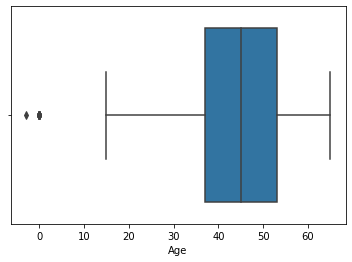

In [45]:
sns.boxplot(x='Age', data=master)
plt.show()

##### Median Age of applicants is 45 years and there are few outliers

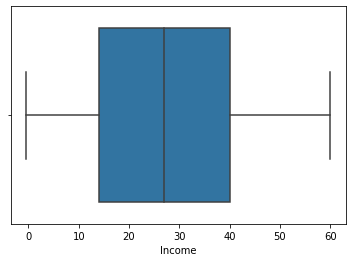

In [46]:
sns.boxplot(x='Income', data=master)
plt.show()

##### Median income of applicants is 27 and there are no outliers

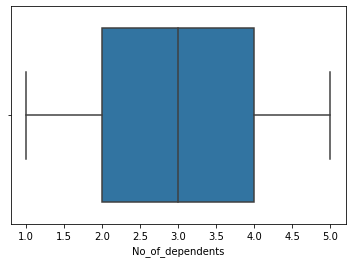

In [47]:
sns.boxplot(x='No_of_dependents', data=master)
plt.show()

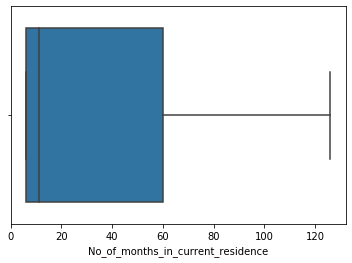

In [48]:
sns.boxplot(x='No_of_months_in_current_residence', data=master)
plt.show()

#### Median No_of_months_in_current_residence is 10 and there are no outliers

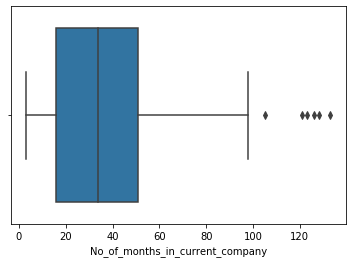

In [49]:
sns.boxplot(x='No_of_months_in_current_company', data=master)
plt.show()

#### Median No_of_months_in_current_company is 34 and there are few outliers

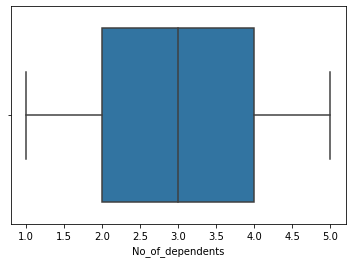

In [50]:
sns.boxplot(x='No_of_dependents', data=master)
plt.show()

#### Median No_of_dependents is 3 and there are no outliers

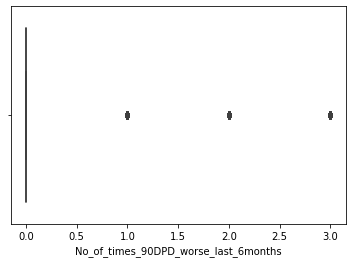

In [51]:
sns.boxplot(x='No_of_times_90DPD_worse_last_6months', data=master)
plt.show()

#### Median is zero and there are few outliers 

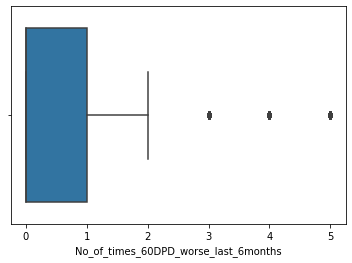

In [52]:
sns.boxplot(x='No_of_times_60DPD_worse_last_6months', data=master)
plt.show()

#### Median is zero and there are few outliers 

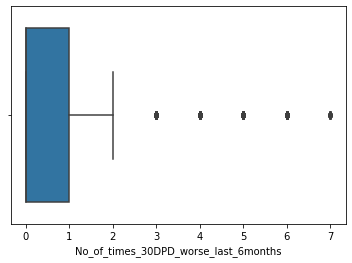

In [53]:
sns.boxplot(x='No_of_times_30DPD_worse_last_6months', data=master)
plt.show()

#### Median is zero and there are few outliers 

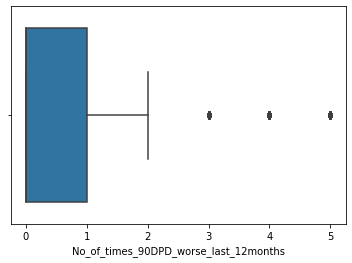

In [54]:
sns.boxplot(x='No_of_times_90DPD_worse_last_12months', data=master)
plt.show()

#### Median is zero and there are few outliers 

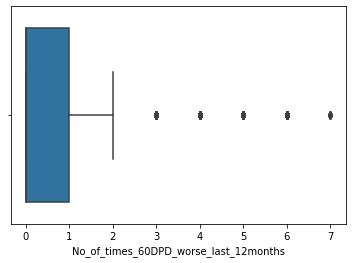

In [55]:
sns.boxplot(x='No_of_times_60DPD_worse_last_12months', data=master)
plt.show()

#### Median is zero and there are few outliers 

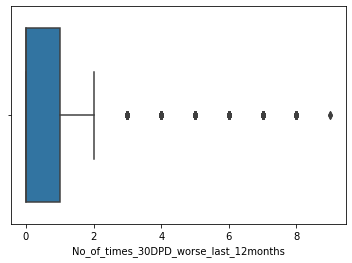

In [56]:
sns.boxplot(x='No_of_times_30DPD_worse_last_12months', data=master)
plt.show()

#### Median is zero and there are few outliers 

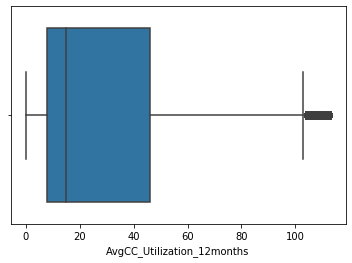

In [57]:
sns.boxplot(x='AvgCC_Utilization_12months', data=master)
plt.show()

#### Median number of avg credit card usage is 15 and there are few outliers

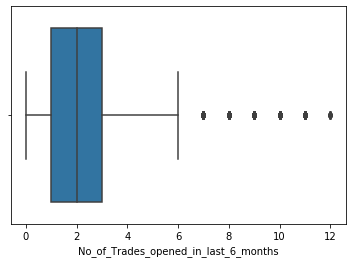

In [58]:
sns.boxplot(x='No_of_Trades_opened_in_last_6_months', data=master)
plt.show()

#### Median is 2 and there are  outliers

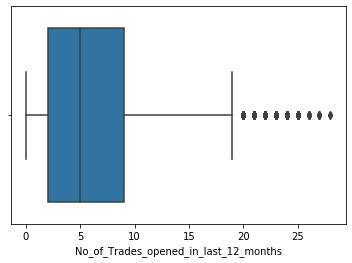

In [59]:
sns.boxplot(x='No_of_Trades_opened_in_last_12_months', data=master)
plt.show()

#### Median is 5 and there are  outliers

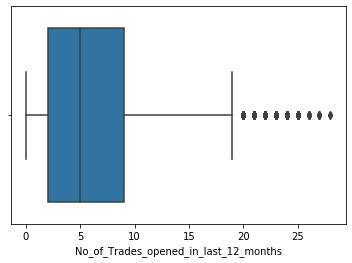

In [60]:
sns.boxplot(x='No_of_Trades_opened_in_last_12_months', data=master)
plt.show()

#### Median is 5 and there are  outliers

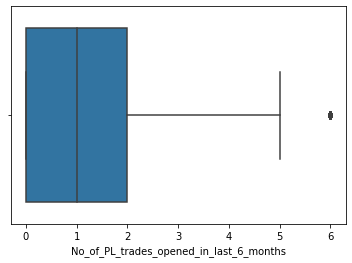

In [61]:
sns.boxplot(x='No_of_PL_trades_opened_in_last_6_months', data=master)
plt.show()

#### Median is 1 and there are  outliers

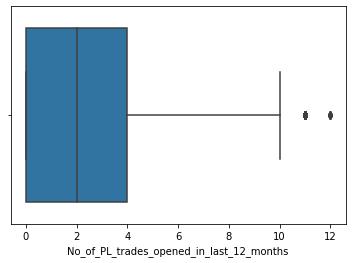

In [62]:
sns.boxplot(x='No_of_PL_trades_opened_in_last_12_months', data=master)
plt.show()

#### Median is 2 and there are  outliers

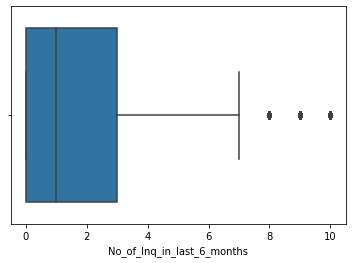

In [63]:
sns.boxplot(x='No_of_Inq_in_last_6_months', data=master)
plt.show()

#### Median is 1 and there are  outliers

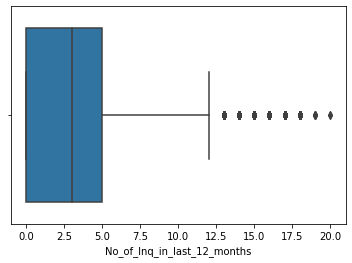

In [64]:
sns.boxplot(x='No_of_Inq_in_last_12_months', data=master)
plt.show()

#### Median is 3 and there are  outliers

### Bivariate analysis

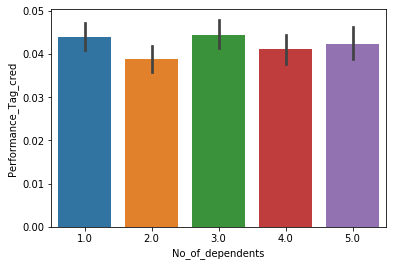

In [65]:
sns.barplot(x='No_of_dependents', y= 'Performance_Tag_cred' ,data=master)
plt.show()

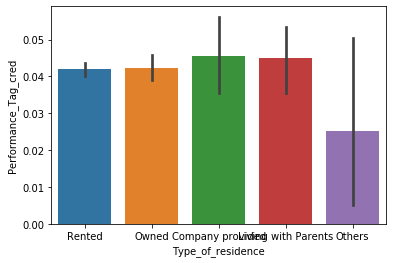

In [66]:
sns.barplot(x='Type_of_residence', y= 'Performance_Tag_cred' ,data=master)
plt.show()

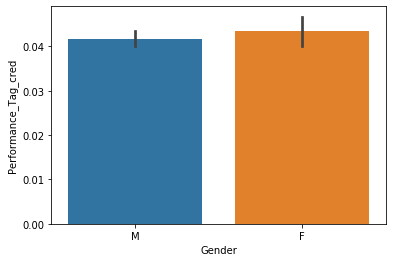

In [67]:
sns.barplot(x='Gender', y= 'Performance_Tag_cred' ,data=master)
plt.show()

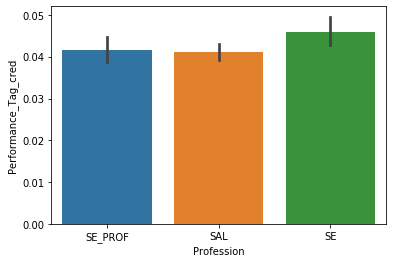

In [68]:
sns.barplot(x='Profession', y= 'Performance_Tag_cred' ,data=master)
plt.show()

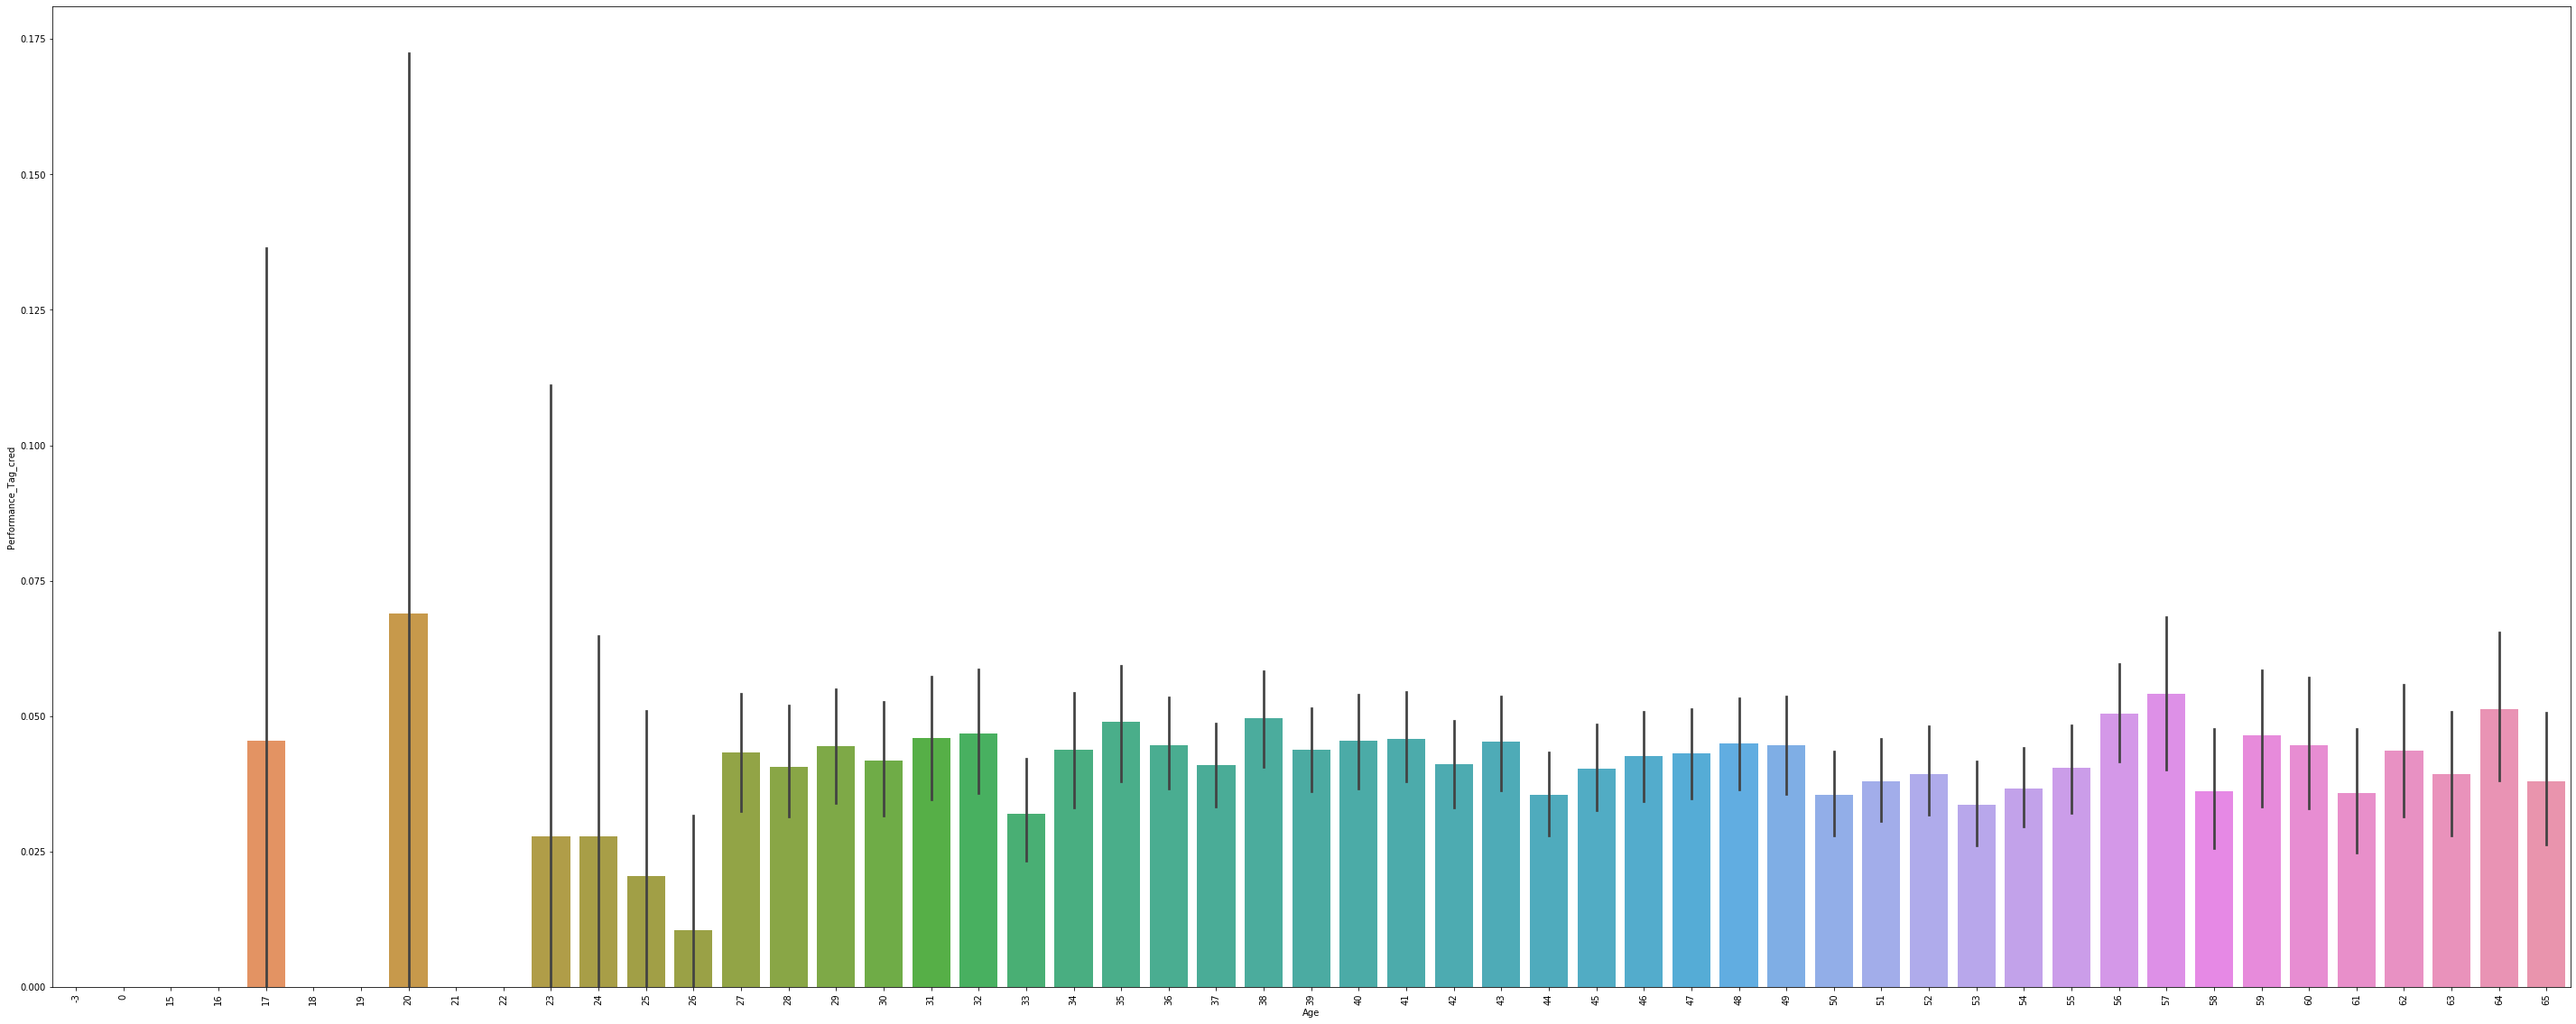

In [69]:
plt.figure(figsize=(50,20))
sns.barplot(x='Age', y= 'Performance_Tag_cred' ,data=master)
xticks(rotation = 90)
plt.show()

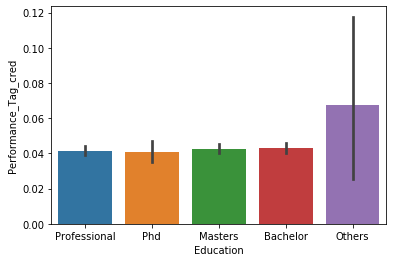

In [70]:
sns.barplot(x='Education', y= 'Performance_Tag_cred' ,data=master)
plt.show()

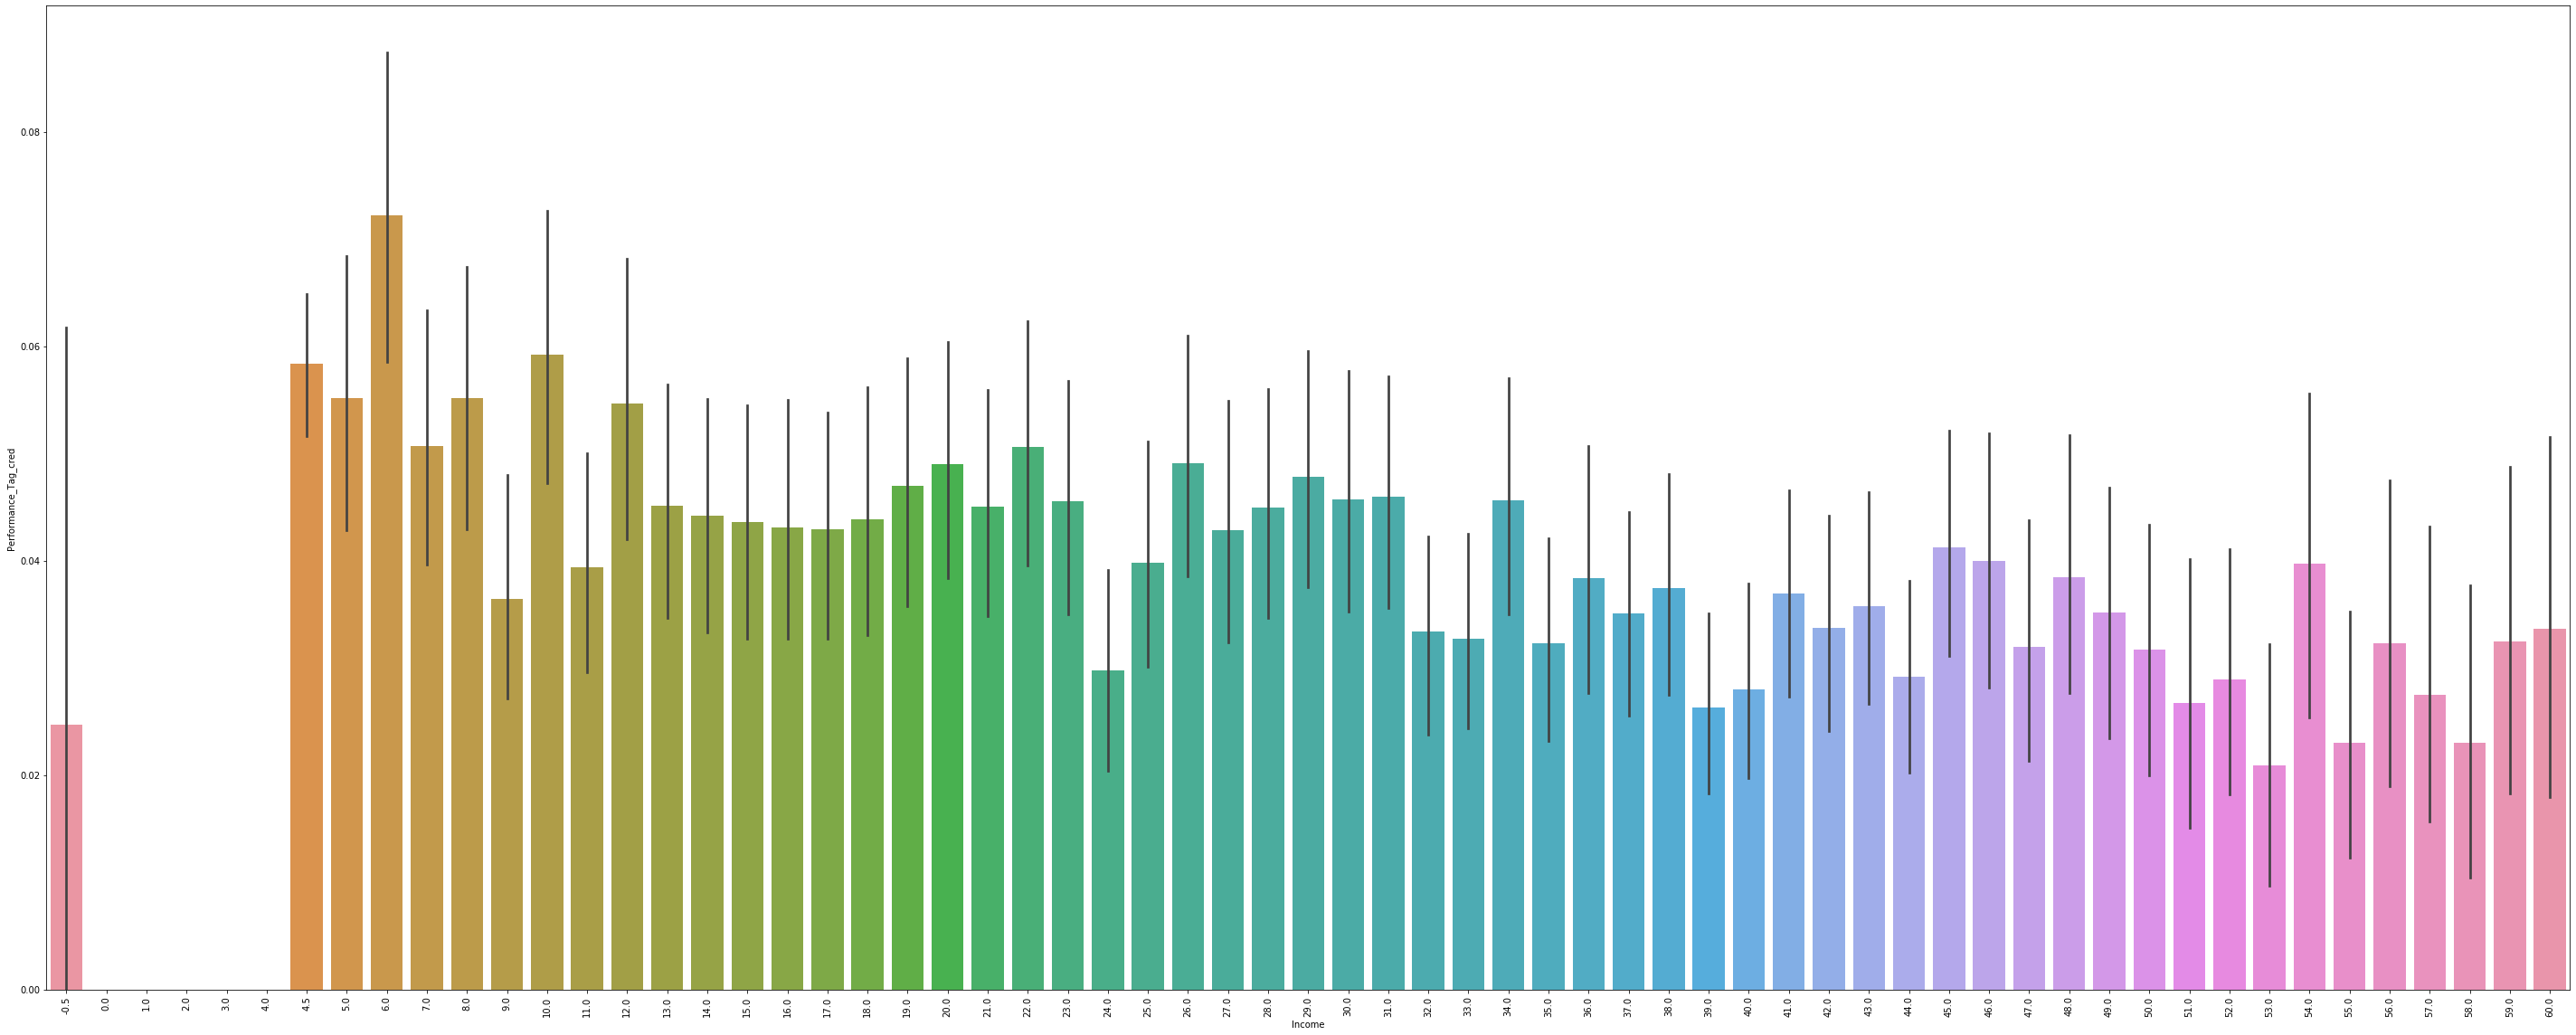

In [71]:
plt.figure(figsize=(50,20))
sns.barplot(x='Income', y= 'Performance_Tag_cred' ,data=master)
xticks(rotation = 90)
plt.show()

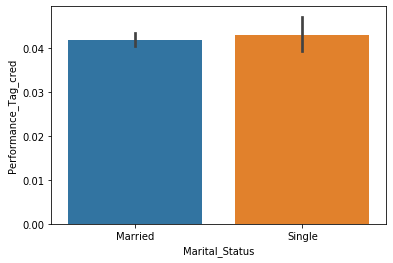

In [72]:
sns.barplot(x='Marital_Status', y= 'Performance_Tag_cred' ,data=master)
plt.show()

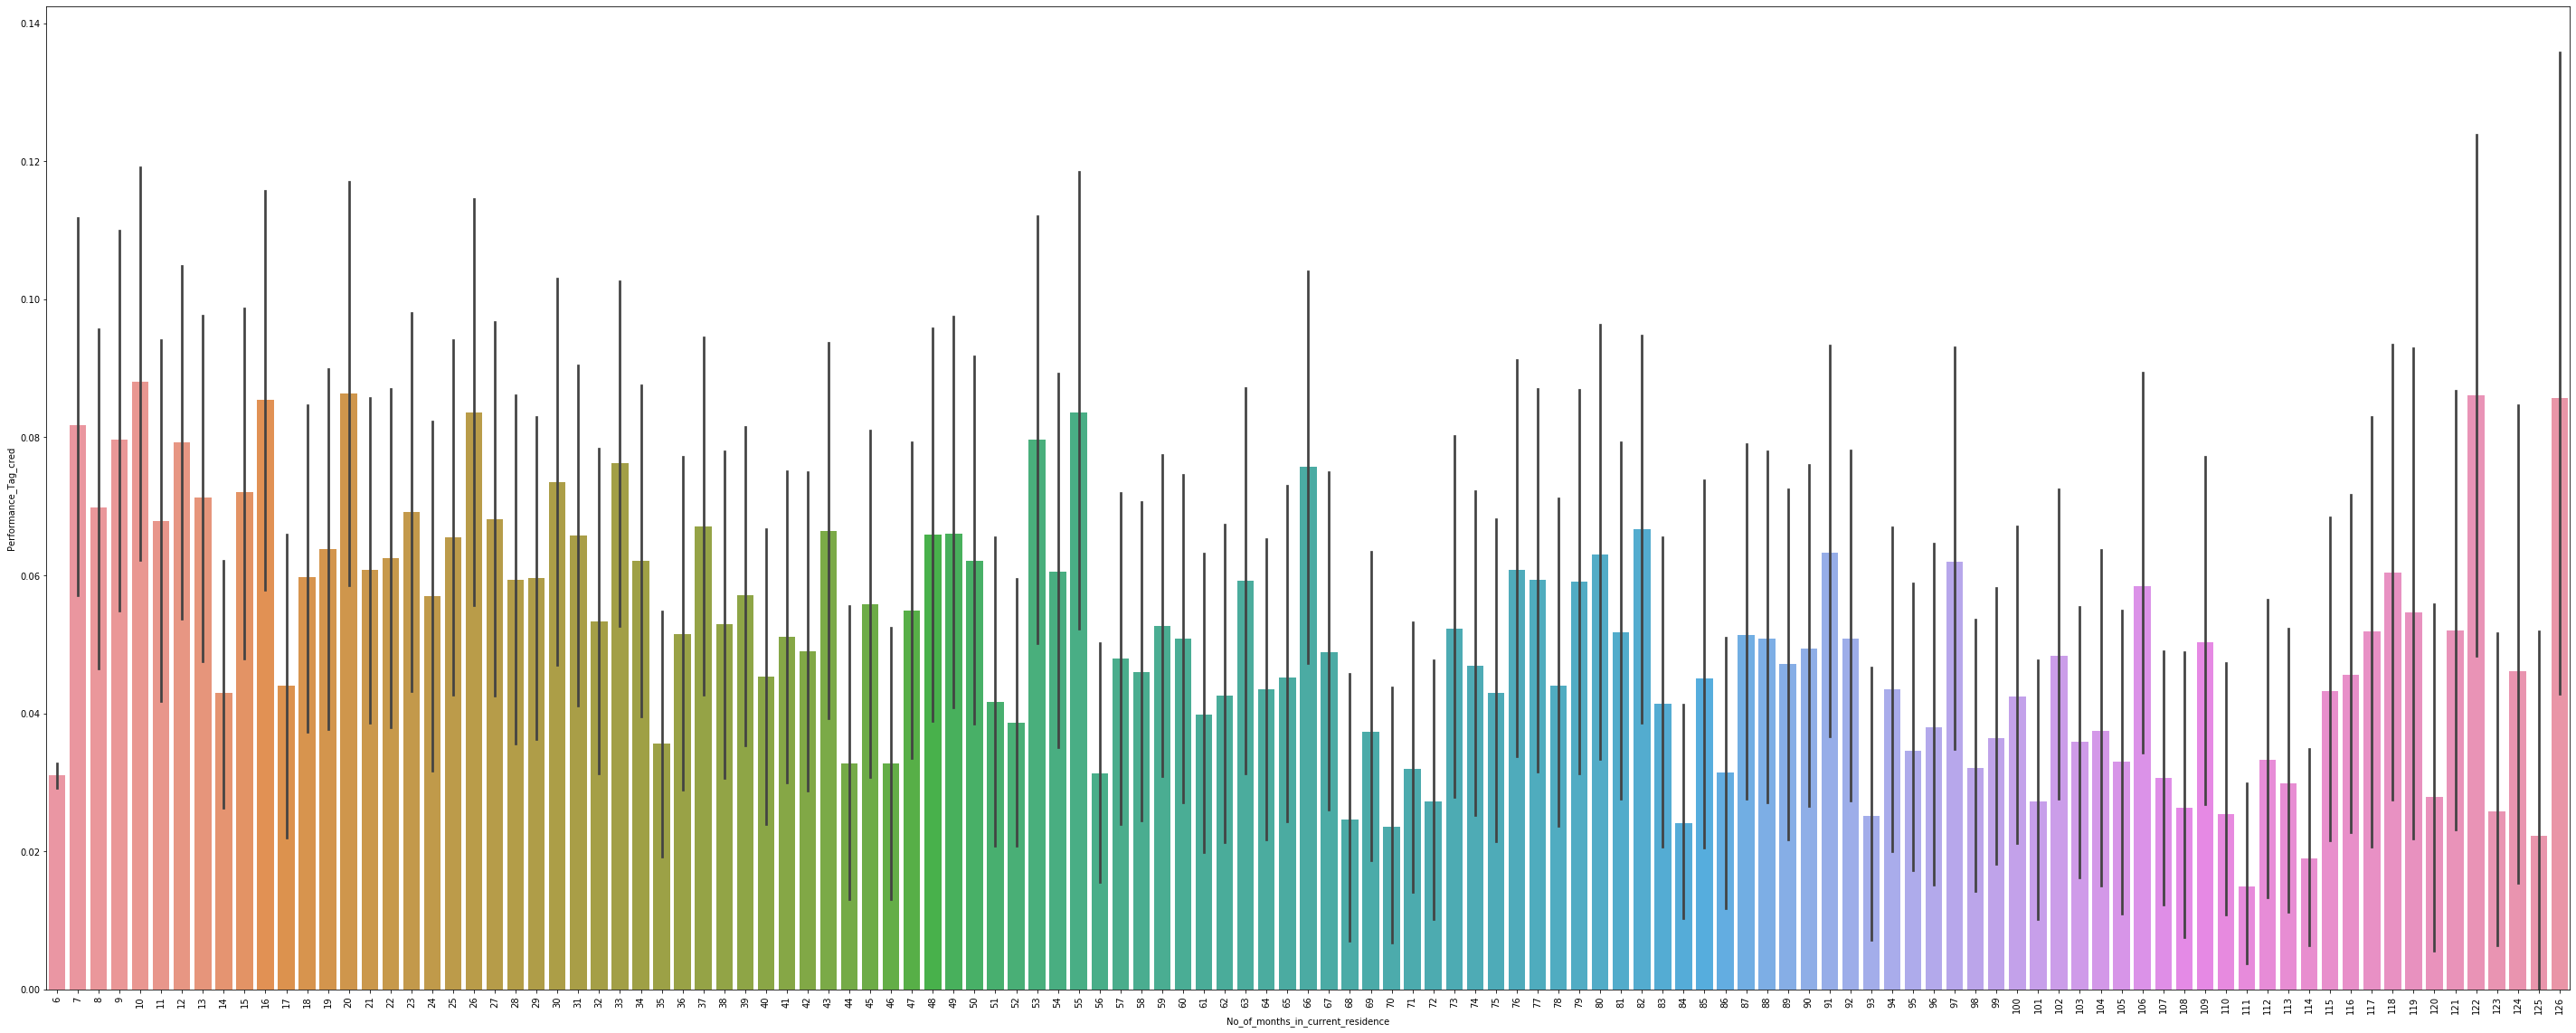

In [73]:
plt.figure(figsize=(50,20))
sns.barplot(x='No_of_months_in_current_residence', y= 'Performance_Tag_cred' ,data=master)
xticks(rotation = 90)
plt.show()

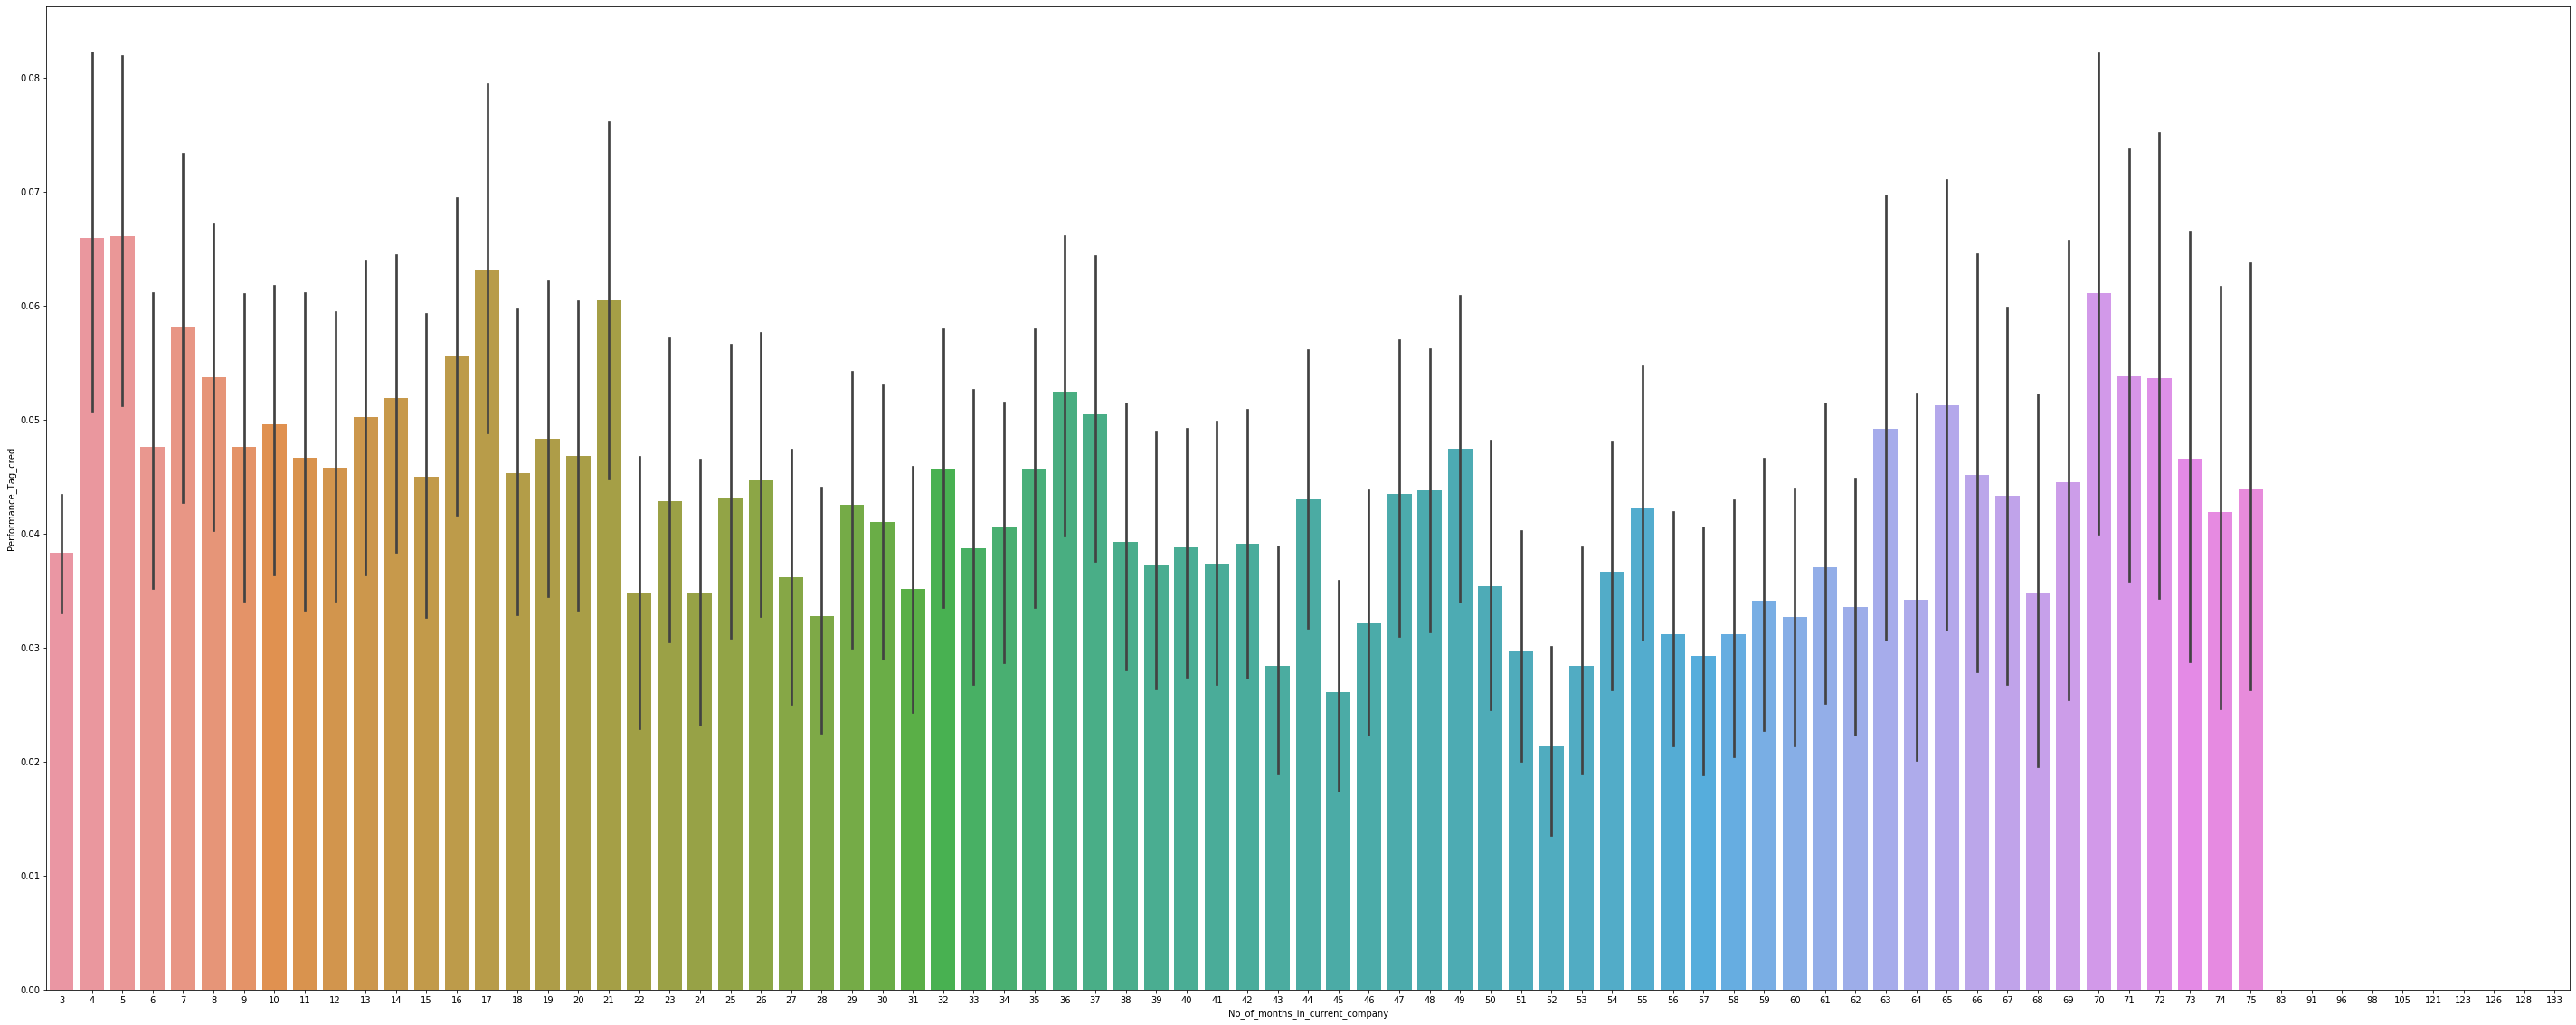

In [74]:
plt.figure(figsize=(50,20))
sns.barplot(x='No_of_months_in_current_company', y= 'Performance_Tag_cred' ,data=master)
plt.show()

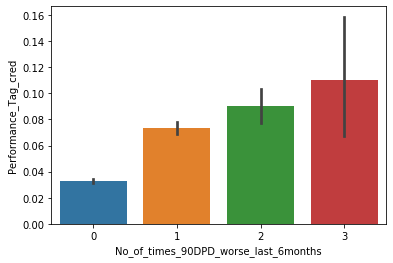

In [75]:
sns.barplot(x='No_of_times_90DPD_worse_last_6months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

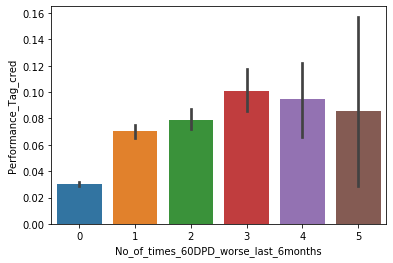

In [76]:
sns.barplot(x='No_of_times_60DPD_worse_last_6months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

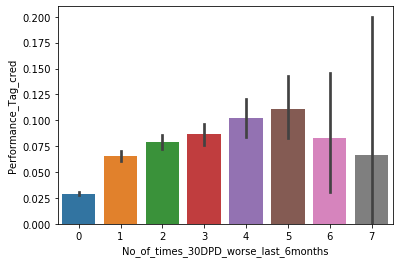

In [77]:
sns.barplot(x='No_of_times_30DPD_worse_last_6months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

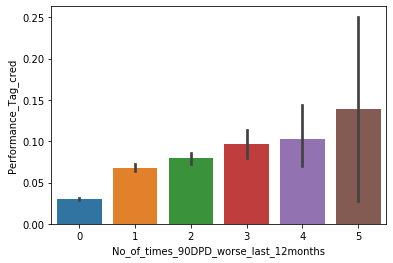

In [78]:
sns.barplot(x='No_of_times_90DPD_worse_last_12months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

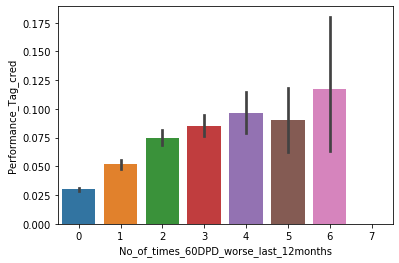

In [79]:
sns.barplot(x='No_of_times_60DPD_worse_last_12months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

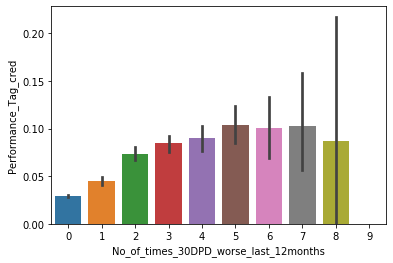

In [80]:
sns.barplot(x='No_of_times_30DPD_worse_last_12months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

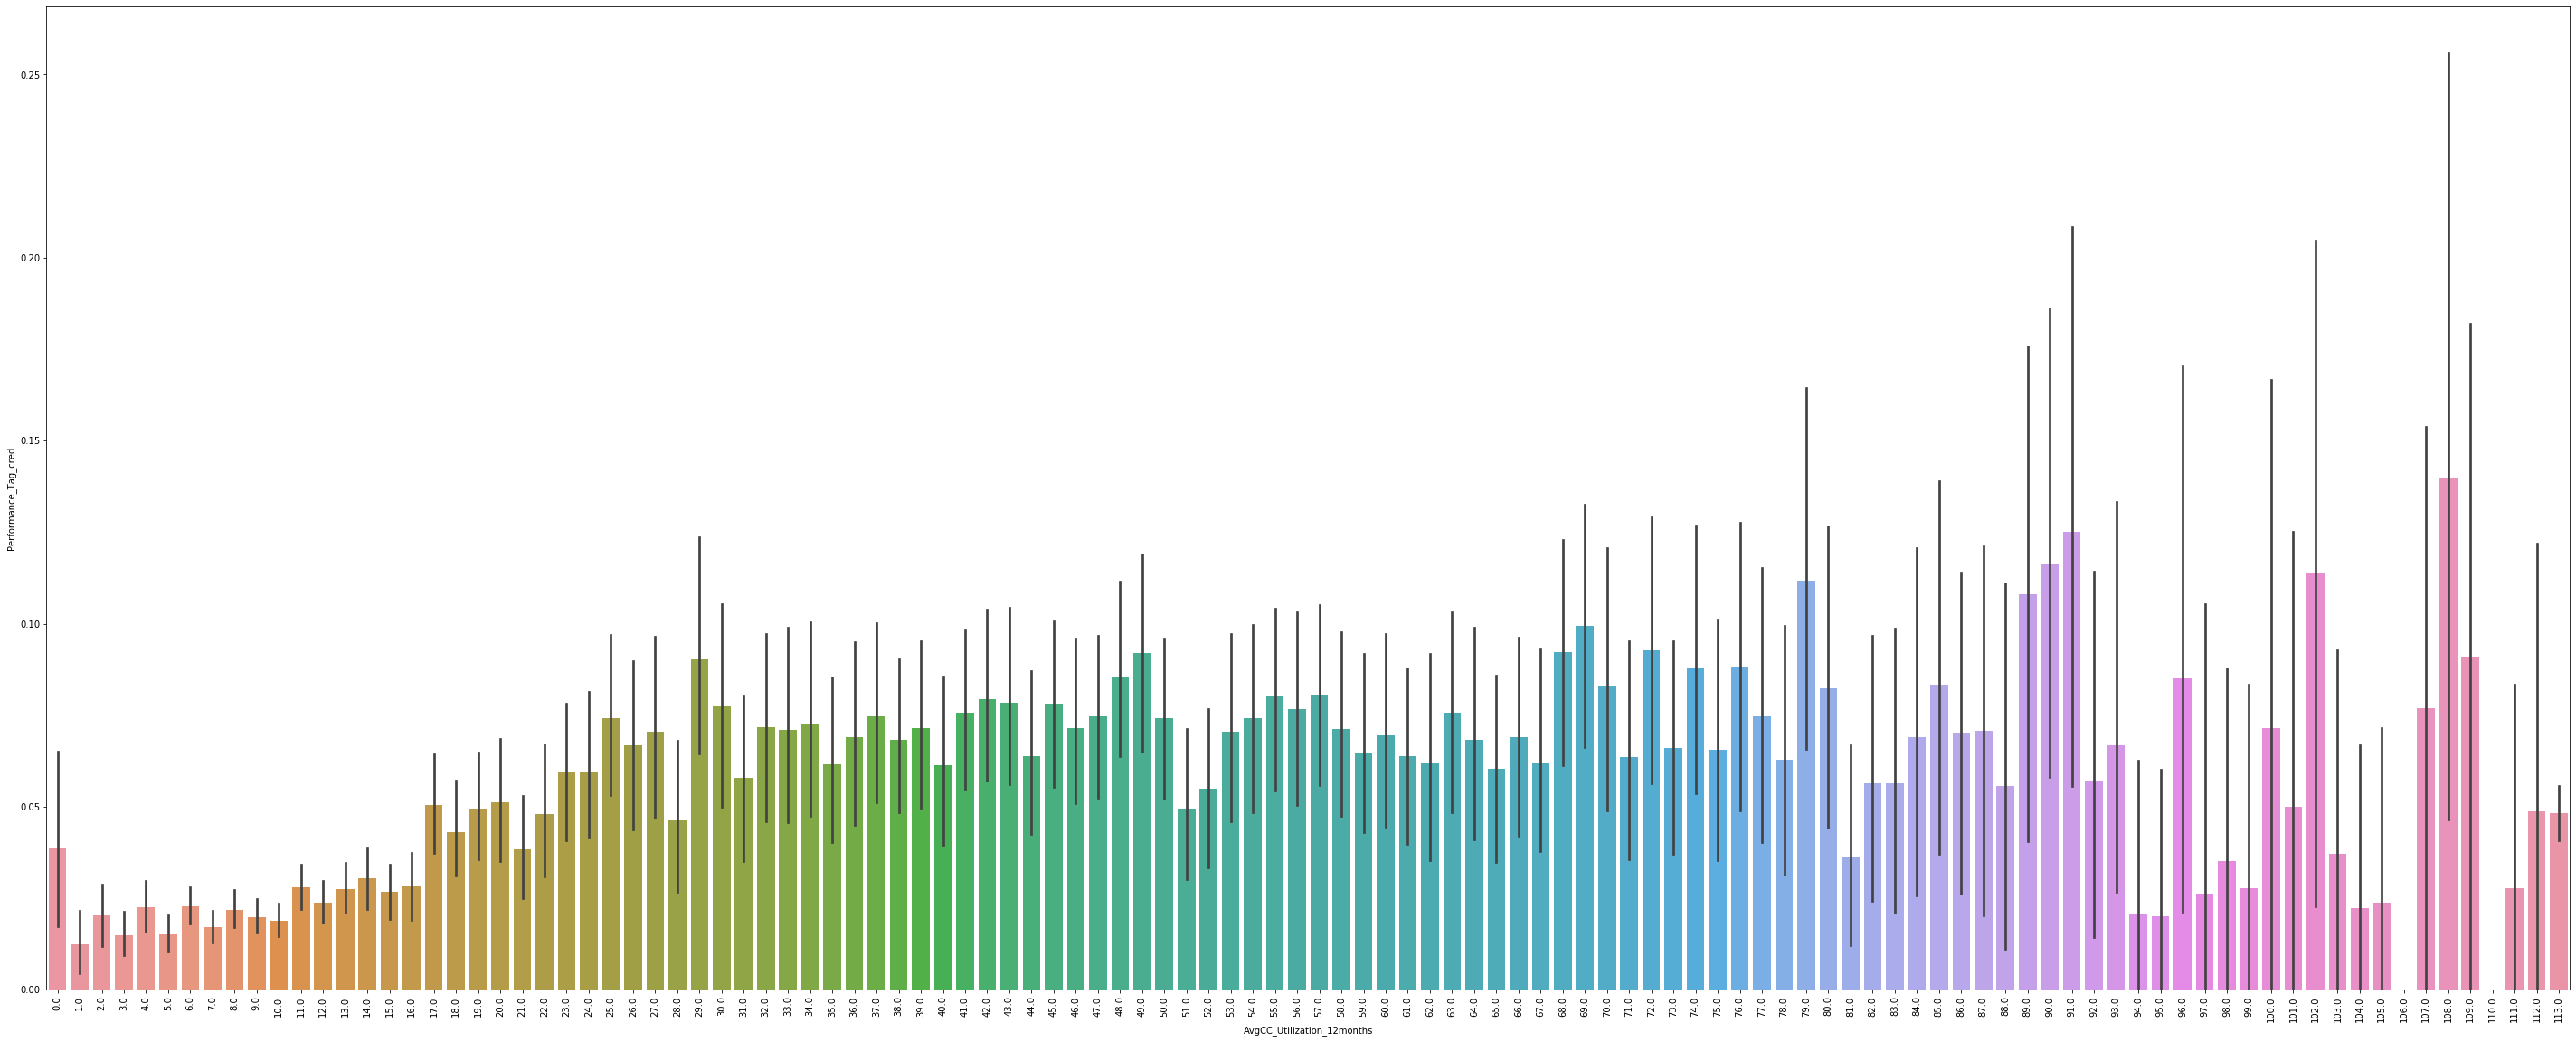

In [81]:
plt.figure(figsize=(50,20))
sns.barplot(x='AvgCC_Utilization_12months', y= 'Performance_Tag_cred' ,data=master)
xticks(rotation = 90)
plt.show()

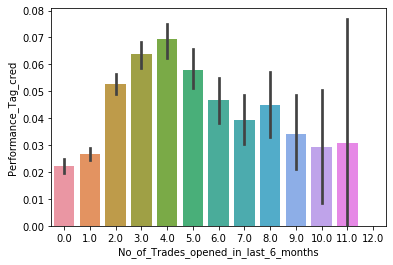

In [82]:
sns.barplot(x='No_of_Trades_opened_in_last_6_months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

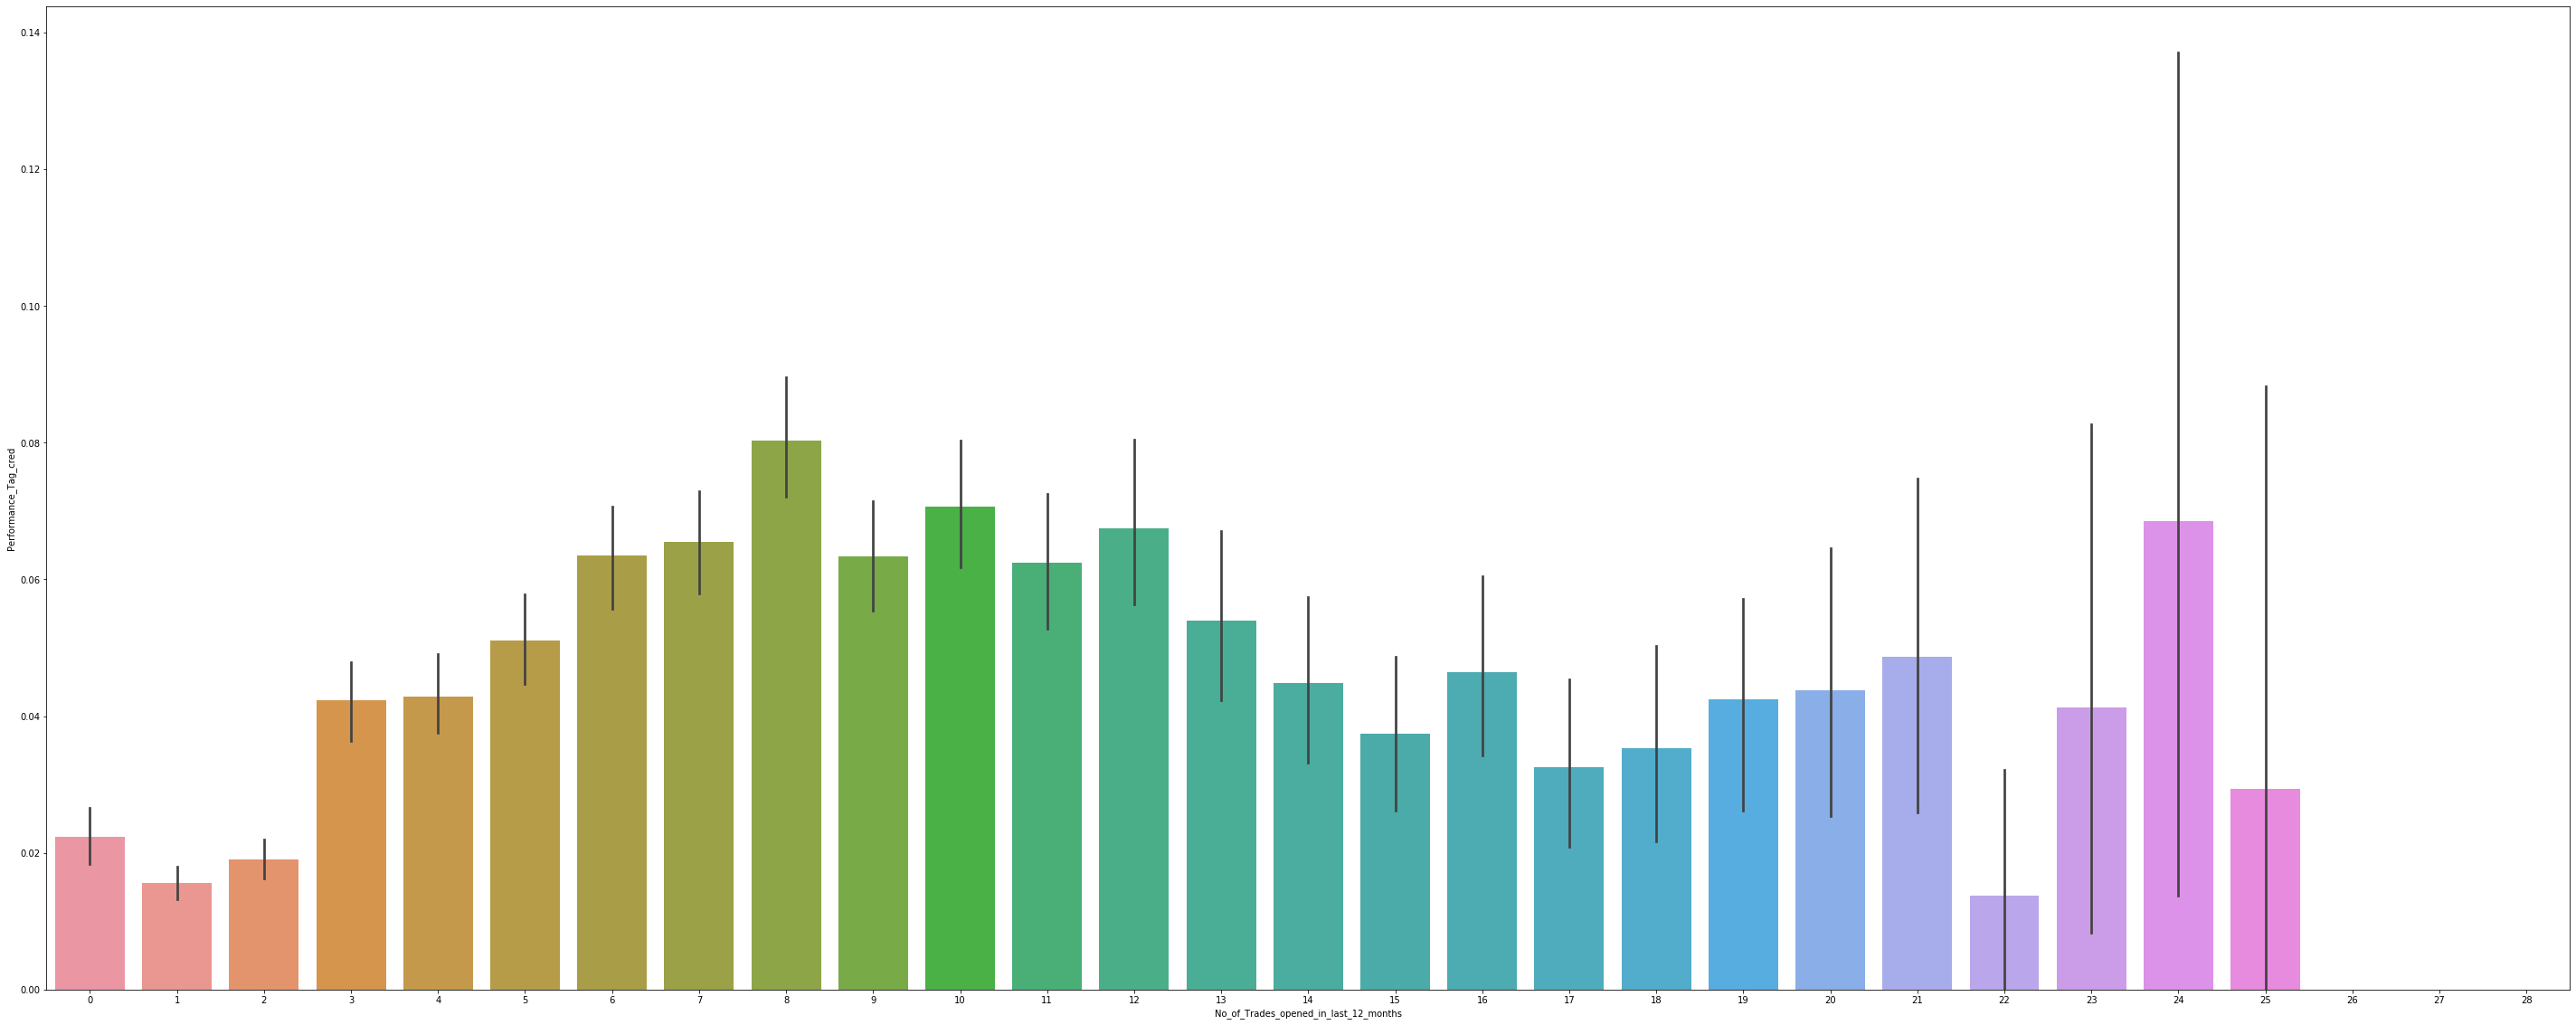

In [83]:
plt.figure(figsize=(50,20))
sns.barplot(x='No_of_Trades_opened_in_last_12_months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

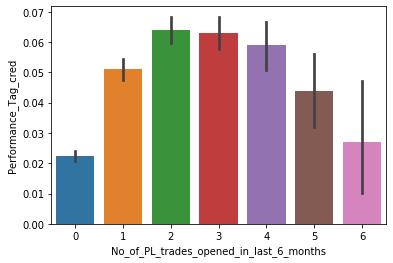

In [84]:
sns.barplot(x='No_of_PL_trades_opened_in_last_6_months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

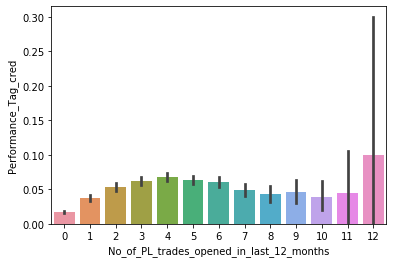

In [85]:
sns.barplot(x='No_of_PL_trades_opened_in_last_12_months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

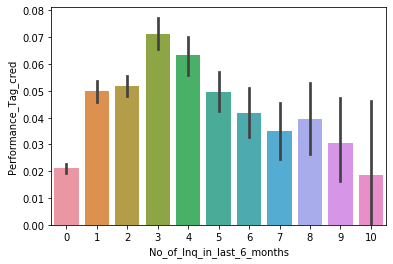

In [86]:
sns.barplot(x='No_of_Inq_in_last_6_months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

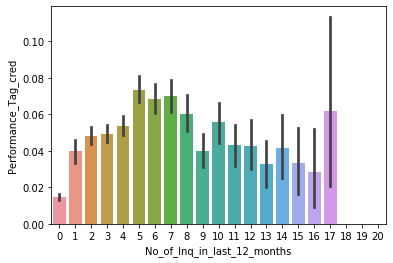

In [87]:
sns.barplot(x='No_of_Inq_in_last_12_months', y= 'Performance_Tag_cred' ,data=master)
plt.show()

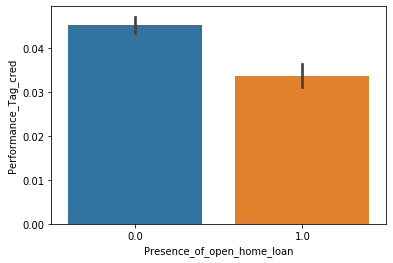

In [88]:
sns.barplot(x='Presence_of_open_home_loan', y= 'Performance_Tag_cred' ,data=master)
plt.show()

In [89]:
rs = np.random.RandomState(0)
corr = master.corr()
plt.figure(figsize = (5,6))
corr.style.background_gradient(cmap='BuGn')


,Age,No_of_dependents,Income,No_of_months_in_current_residence,No_of_months_in_current_company,No_of_times_90DPD_worse_last_6months,No_of_times_60DPD_worse_last_6months,No_of_times_30DPD_worse_last_6months,No_of_times_90DPD_worse_last_12months,No_of_times_60DPD_worse_last_12months,No_of_times_30DPD_worse_last_12months,AvgCC_Utilization_12months,No_of_Trades_opened_in_last_6_months,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan,Performance_Tag_cred
Age,1,0.168985,0.0623167,-0.0666792,-0.0200654,-0.0251697,-0.0305854,-0.0322725,-0.0305115,-0.0304413,-0.0327632,-0.00823549,0.0141949,0.013907,0.0084469,0.00709283,0.0124701,0.0161678,-0.00801819,-0.00640176,0.0210098,-0.00913598,-0.00171413
No_of_dependents,0.168985,1,0.0248736,-0.00562991,-0.00811608,0.00645692,0.00851017,0.00867227,0.00708859,0.0103762,0.00960754,-0.00278501,-0.00327221,-0.00321929,-0.00112301,-0.00245691,-0.00725453,-0.00775878,0.00157102,0.00034307,-0.0014977,-0.00205685,-0.000407268
Income,0.0623167,0.0248736,1,-0.090547,-0.0874172,-0.200372,-0.217592,-0.228279,-0.223199,-0.210072,-0.217851,-0.187892,-0.141715,-0.162881,-0.182818,-0.200063,-0.141923,-0.153669,0.0745801,0.00702465,-0.105368,0.0324836,-0.0387647
No_of_months_in_current_residence,-0.0666792,-0.00562991,-0.090547,1,-0.0724425,0.137036,0.130401,0.130974,0.147966,0.16711,0.163419,0.261368,-0.054752,-0.0395091,0.0345519,0.0383963,-0.0727045,-0.0830146,0.00210491,0.0218417,-0.104381,0.010909,0.0162474
No_of_months_in_current_company,-0.0200654,-0.00811608,-0.0874172,-0.0724425,1,-0.118409,-0.133942,-0.142167,-0.133252,-0.138995,-0.144316,-0.0520908,0.0153071,0.0094531,-0.0144572,-0.0171836,0.0211678,0.0227208,0.0176087,0.0136052,0.0437813,0.00336622,-0.0190731
No_of_times_90DPD_worse_last_6months,-0.0251697,0.00645692,-0.200372,0.137036,-0.118409,1,0.889152,0.846335,0.894406,0.825734,0.806182,0.358657,0.14418,0.181626,0.257621,0.286426,0.138277,0.152194,-0.117774,-0.0231464,0.0386212,-0.0268448,0.0880573
No_of_times_60DPD_worse_last_6months,-0.0305854,0.00851017,-0.217592,0.130401,-0.133942,0.889152,1,0.954784,0.850453,0.930732,0.910465,0.354405,0.159029,0.198928,0.277073,0.309033,0.151703,0.167376,-0.123784,-0.0228822,0.0452919,-0.0282062,0.0956492
No_of_times_30DPD_worse_last_6months,-0.0322725,0.00867227,-0.228279,0.130974,-0.142167,0.846335,0.954784,1,0.837748,0.907984,0.955161,0.356235,0.168301,0.210146,0.290107,0.323572,0.161993,0.178623,-0.127524,-0.0223842,0.0491754,-0.0286398,0.102776
No_of_times_90DPD_worse_last_12months,-0.0305115,0.00708859,-0.223199,0.147966,-0.133252,0.894406,0.850453,0.837748,1,0.816726,0.813869,0.387098,0.161956,0.203577,0.287105,0.318915,0.158433,0.17475,-0.129183,-0.0241956,0.0438248,-0.0317583,0.0976083
No_of_times_60DPD_worse_last_12months,-0.0304413,0.0103762,-0.210072,0.16711,-0.138995,0.825734,0.930732,0.907984,0.816726,1,0.90581,0.348946,0.137534,0.176173,0.262083,0.29113,0.129714,0.142863,-0.116024,-0.0213877,0.0176197,-0.023303,0.0928933


<Figure size 360x432 with 0 Axes>

### WOE Analaysis and IV (Information Value)### 

In [90]:
# Let's Convert categorical variables to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = master.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    master[i] = d[i].transform(master[i].fillna('NA'))

In [91]:
# Scaling the numeric variables
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['Age', 'Gender', 'Marital_Status', 'No_of_dependents', 'Income','Education', 'Profession', 'Type_of_residence',                 
'No_of_months_in_current_residence','No_of_months_in_current_company','No_of_times_90DPD_worse_last_6months',            
'No_of_times_60DPD_worse_last_6months', 'No_of_times_30DPD_worse_last_6months', 'No_of_times_90DPD_worse_last_12months',           
'No_of_times_60DPD_worse_last_12months', 'No_of_times_30DPD_worse_last_12months','AvgCC_Utilization_12months',  
'No_of_Trades_opened_in_last_6_months', 'No_of_Trades_opened_in_last_12_months','No_of_PL_trades_opened_in_last_6_months',         
'No_of_PL_trades_opened_in_last_12_months', 'No_of_Inq_in_last_6_months','No_of_Inq_in_last_12_months',                     
'Presence_of_open_home_loan', 'Outstanding_Balance', 'Total_No_of_Trades', 'Presence_of_open_auto_loan']

# Scale these variables using 'fit_transform'
master[varlist] = scaler.fit_transform(master[varlist])

In [92]:
master.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan,Performance_Tag_cred
Application_ID,,,,,,,,,,,,,,,,,,,,,
100450,0.710005,0.555935,-0.417056,0.820995,0.309646,1.238779,1.611124,0.419195,1.208921,-1.516788,...,0.428995,0.586152,1.075370,-0.387327,-0.149422,1.702781,2.075395,0.114669,-0.30403,0.0
128993,-0.899844,0.555935,-0.417056,0.820995,-0.915016,1.238779,-0.801374,0.419195,-0.777013,-0.634869,...,0.034144,-0.152969,0.662166,1.134479,0.967186,-0.587275,-0.397356,-0.026356,-0.30403,1.0
142768,1.011852,0.555935,-0.417056,-1.349267,0.116279,0.772761,-0.801374,0.419195,0.311170,-1.516788,...,0.231569,0.586152,0.662166,-0.387327,-0.428574,-0.587275,-0.339284,0.114669,-0.30403,0.0
176721,1.011852,0.555935,-0.417056,0.097574,1.663221,1.238779,1.611124,0.419195,-0.777013,-0.340896,...,-0.952986,-0.892089,-0.577444,0.119942,-0.149422,-0.587275,-0.812922,-0.731480,-0.30403,0.0
197956,-1.704768,-1.798212,-0.417056,0.097574,0.503014,-0.625292,-0.801374,0.419195,-0.777013,0.443031,...,1.416125,2.803513,1.075370,2.149017,2.083794,-0.587275,-0.201119,2.371067,-0.30403,0.0


In [93]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71289 entries, 100450 to 1000084142
Data columns (total 28 columns):
Age                                         71289 non-null float64
Gender                                      71289 non-null float64
Marital_Status                              71289 non-null float64
No_of_dependents                            71286 non-null float64
Income                                      71289 non-null float64
Education                                   71289 non-null float64
Profession                                  71289 non-null float64
Type_of_residence                           71289 non-null float64
No_of_months_in_current_residence           71289 non-null float64
No_of_months_in_current_company             71289 non-null float64
No_of_times_90DPD_worse_last_6months        71289 non-null float64
No_of_times_60DPD_worse_last_6months        71289 non-null float64
No_of_times_30DPD_worse_last_6months        71289 non-null float64
No_of_time

In [94]:

# creating functions for woe and IV
def woe_iv(data, target, bins=8, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        null_data = data[data[ivars].isnull()]
        nonnull_data = data[data[ivars].notnull()]
        
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>8):            
            binned_x = pd.qcut(nonnull_data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': nonnull_data[target]})
        else:
            d0 = pd.DataFrame({'x': nonnull_data[ivars], 'y': nonnull_data[target]})
            
        if(~null_data.empty):
            d1 = pd.DataFrame({'x' : 'NULL', 'y' : null_data[target]})
            d0 = pd.concat([d0, d1], axis = 0)
            
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Defaults']                
        d['% of Defaults'] = np.maximum(d['Defaults'], 0.5) / d['Defaults'].sum()
        d['Non-Defaults'] = d['N'] - d['Defaults']
        d['% of Non-Defaults'] = np.maximum(d['Non-Defaults'], 0.5) / d['Non-Defaults'].sum()
        d['WoE'] = np.log(d['% of Defaults']/d['% of Non-Defaults'])
        d['IV'] = round(d['WoE'] * (d['% of Defaults'] - d['% of Non-Defaults']),6)
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        woeDF['min_val']=0
        woeDF['max_val']=0
        for cols in np.unique(woeDF.Variable):
            if (data[cols].dtype.kind in 'bifc') and (len(np.unique(data[cols]))>8):
                woeDF.loc[(woeDF.Variable==cols) & (woeDF.Cutoff!='NULL'),'min_val'
                         ] = woeDF[woeDF.Variable==cols
                                  ]['Cutoff'].apply(lambda x: 0 if x=='NULL' else float(str(x).split(',')[0].split('(')[1].strip()))
                woeDF.loc[(woeDF.Variable==cols) & (woeDF.Cutoff!='NULL'),'max_val'
                         ] = woeDF[woeDF.Variable==cols
                                  ]['Cutoff'].apply(lambda x: 0 if x=='NULL' else float(str(x).split(',')[1].split(']')[0].strip()))
         #Print WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [95]:
# Let's see woe and iv for master data (without any imputation)
iv, woe = woe_iv(data = master, target = 'Performance_Tag_cred', bins=8, show_woe = True)


Information value of Age is 0.004529
  Variable            Cutoff     N  Defaults  % of Defaults  Non-Defaults  \
0      Age  (-4.825, -1.302]  8724     370.0       0.125551        8354.0   
1      Age  (-1.302, -0.799]  8758     370.0       0.125551        8388.0   
2      Age  (-0.799, -0.397]  9444     436.0       0.147947        9008.0   
3      Age  (-0.397, 0.0057]  9238     375.0       0.127248        8863.0   
4      Age   (0.0057, 0.408]  9090     398.0       0.135053        8692.0   
5      Age    (0.408, 0.811]  9093     333.0       0.112996        8760.0   
6      Age    (0.811, 1.213]  7618     335.0       0.113675        7283.0   
7      Age    (1.213, 2.018]  7899     330.0       0.111978        7569.0   

   % of Non-Defaults       WoE        IV  
0           0.124841  0.005673  0.000004  
1           0.125349  0.001611  0.000000  
2           0.134615  0.094439  0.001259  
3           0.132448 -0.040049  0.000208  
4           0.129892  0.038959  0.000201  
5          

                               Variable    Cutoff      N  Defaults  \
0  No_of_times_90DPD_worse_last_6months -0.506037  54662    1794.0   
1  No_of_times_90DPD_worse_last_6months  1.366038  13218     970.0   
2  No_of_times_90DPD_worse_last_6months  3.238114   1776     160.0   
3  No_of_times_90DPD_worse_last_6months  5.110190    208      23.0   

   % of Defaults  Non-Defaults  % of Non-Defaults       WoE        IV  
0       0.608755       52868.0           0.790053 -0.260685  0.047262  
1       0.329148       12248.0           0.183033  0.586843  0.085747  
2       0.054293        1616.0           0.024149  0.810130  0.024420  
3       0.007805         185.0           0.002765  1.037804  0.005230  
Information value of No_of_times_60DPD_worse_last_6months is 0.211274
                               Variable    Cutoff      N  Defaults  \
0  No_of_times_60DPD_worse_last_6months -0.521627  51868    1582.0   
1  No_of_times_60DPD_worse_last_6months  0.690007  11130     783.0   
2  No_of_

Information value of No_of_Trades_opened_in_last_12_months is 0.292923
                                Variable                         Cutoff  \
0  No_of_Trades_opened_in_last_12_months  (-1.1509999999999998, -0.953]   
1  No_of_Trades_opened_in_last_12_months               (-0.953, -0.756]   
2  No_of_Trades_opened_in_last_12_months               (-0.756, -0.558]   
3  No_of_Trades_opened_in_last_12_months               (-0.558, -0.163]   
4  No_of_Trades_opened_in_last_12_months                (-0.163, 0.232]   
5  No_of_Trades_opened_in_last_12_months                 (0.232, 0.626]   
6  No_of_Trades_opened_in_last_12_months                 (0.626, 1.219]   
7  No_of_Trades_opened_in_last_12_months                 (1.219, 4.378]   

       N  Defaults  % of Defaults  Non-Defaults  % of Non-Defaults       WoE  \
0  16332     289.0       0.098066       16043.0           0.239745 -0.893936   
1   9322     178.0       0.060400        9144.0           0.136647 -0.816404   
2   4678     

                     Variable    Cutoff      N  Defaults  % of Defaults  \
0  Presence_of_open_auto_loan -0.304030  63935    2728.0       0.925687   
1  Presence_of_open_auto_loan  3.289144   5929     219.0       0.074313   

   Non-Defaults  % of Non-Defaults       WoE        IV  
0       61207.0            0.91467  0.011973  0.000132  
1        5710.0            0.08533 -0.138237  0.001523  


In [96]:
woe.sort_values(by=['Variable','WoE'], ascending = False)

,% of Defaults,% of Non-Defaults,Cutoff,Defaults,IV,N,Non-Defaults,Variable,WoE,max_val,min_val
2,0.000170,0.000120,-2.56146,0.0,0.000018,8,8.0,Type_of_residence,0.350077,0.0000,0.0000
0,0.024771,0.022849,-4.54856,73.0,0.000155,1602,1529.0,Type_of_residence,0.080756,0.0000,0.0000
1,0.027146,0.025360,-3.55501,80.0,0.000122,1777,1697.0,Type_of_residence,0.068075,0.0000,0.0000
4,0.201222,0.200398,-0.574355,593.0,0.000003,14003,13410.0,Type_of_residence,0.004104,0.0000,0.0000
5,0.745165,0.748390,0.419195,2196.0,0.000014,52276,50080.0,Type_of_residence,-0.004319,0.0000,0.0000
3,0.001697,0.002884,-1.5679,5.0,0.000630,198,193.0,Type_of_residence,-0.530587,0.0000,0.0000
5,0.170682,0.099078,"(-0.0264, 0.256]",503.0,0.038945,7133,6630.0,Total_No_of_Trades,0.543895,0.2560,-0.0264
6,0.167628,0.098704,"(0.256, 1.102]",494.0,0.036503,7099,6605.0,Total_No_of_Trades,0.529619,1.1020,0.2560
4,0.192060,0.131417,"(-0.308, -0.0264]",566.0,0.023010,9360,8794.0,Total_No_of_Trades,0.379434,-0.0264,-0.3080
3,0.158466,0.152622,"(-0.59, -0.308]",467.0,0.000220,10680,10213.0,Total_No_of_Trades,0.037578,-0.3080,-0.5900


In [97]:
# displaying the consolidate IV values for each variable in demographics data set
iv.sort_values(by='IV', ascending = False)

,Variable,IV
0,AvgCC_Utilization_12months,0.306609
0,No_of_Trades_opened_in_last_12_months,0.292923
0,No_of_PL_trades_opened_in_last_12_months,0.255968
0,Outstanding_Balance,0.246717
0,No_of_times_30DPD_worse_last_6months,0.244250
0,Total_No_of_Trades,0.242576
0,No_of_PL_trades_opened_in_last_6_months,0.224219
0,No_of_times_90DPD_worse_last_12months,0.215653
0,No_of_times_60DPD_worse_last_6months,0.211274
0,No_of_times_30DPD_worse_last_12months,0.191012


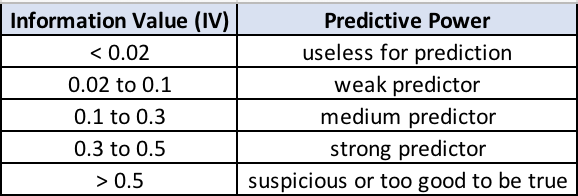

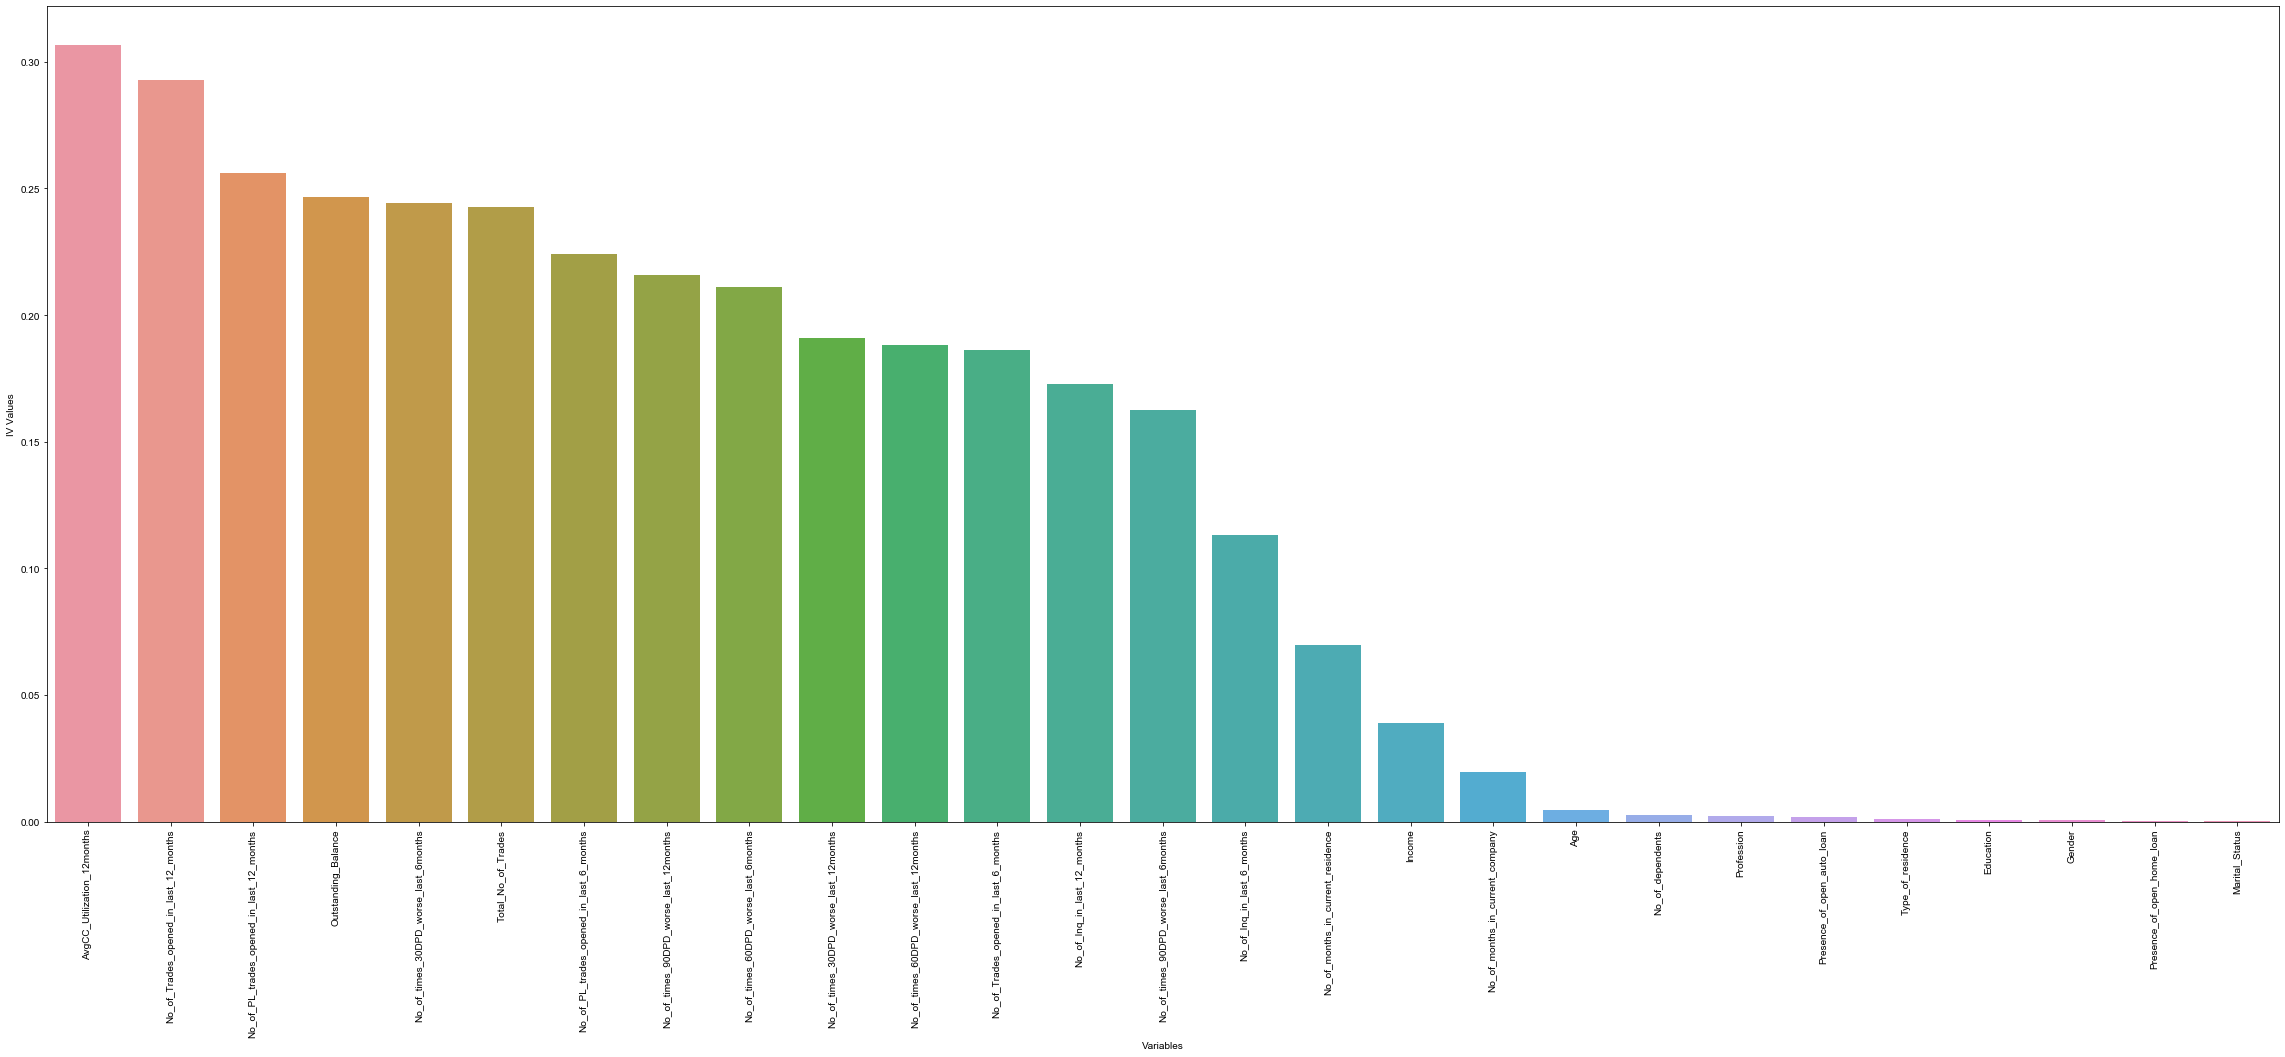

In [98]:
## plotting all the consolidated IV values of the demographics variable
plt.figure(figsize=(40,15))
ax = sns.barplot(x='Variable', y='IV', data=iv.sort_values(by='IV', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 3)
plt.xlabel('Variables')
plt.ylabel('IV Values')
plt.show()

In [99]:
# Variables name with less than .02 IV Value as they do not affect the decision making significantly
high_IV = iv.loc[iv.IV > 0.1]
high_IV = high_IV.sort_values(by='IV', ascending = False)
high_IV

,Variable,IV
0,AvgCC_Utilization_12months,0.306609
0,No_of_Trades_opened_in_last_12_months,0.292923
0,No_of_PL_trades_opened_in_last_12_months,0.255968
0,Outstanding_Balance,0.246717
0,No_of_times_30DPD_worse_last_6months,0.244250
0,Total_No_of_Trades,0.242576
0,No_of_PL_trades_opened_in_last_6_months,0.224219
0,No_of_times_90DPD_worse_last_12months,0.215653
0,No_of_times_60DPD_worse_last_6months,0.211274
0,No_of_times_30DPD_worse_last_12months,0.191012


In [100]:
### Getting the Variables name with less than .02 IV Value as they do not affect the decision making significantly
low_IV = iv.loc[iv.IV <= 0.02]
low_IV = low_IV.sort_values(by='IV', ascending = False)
low_IV

,Variable,IV
0,No_of_months_in_current_company,0.019809
0,Age,0.004529
0,No_of_dependents,0.002818
0,Profession,0.002221
0,Presence_of_open_auto_loan,0.001655
0,Type_of_residence,0.000942
0,Education,0.000782
0,Gender,0.000568
0,Presence_of_open_home_loan,0.000462
0,Marital_Status,0.000147


#### From the above analysis it can be concluded that Demographic variables are weak predictors whereas, credi bureau data has good predictor variables.

#### Below are top predictor variables obtained from IV analysis:
•	AvgCC_Utilization_12months
•	No_of_Trades_opened_in_last_12_months
•	No_of_PL_trades_opened_in_last_12_months
•	Outstanding_Balance
•	No_of_times_30DPD_worse_last_6months
•	Total_No_of_Trades
•	No_of_PL_trades_opened_in_last_6_months
•	No_of_times_90DPD_worse_last_12months
•	No_of_times_60DPD_worse_last_6months
•	No_of_times_30DPD_worse_last_12months
•	No_of_times_60DPD_worse_last_12months

In [101]:
# evaluating the overall IV for the dataset
iv.IV.sum()

3.3966629999999998

In [102]:
['Age', 'Gender', 'Marital_Status', 'No_of_dependents',
       'Income', 'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company']

['Age',
 'Gender',
 'Marital_Status',
 'No_of_dependents',
 'Income',
 'Education',
 'Profession',
 'Type_of_residence',
 'No_of_months_in_current_residence',
 'No_of_months_in_current_company']

In [103]:
# function to create woe transformed dataframe from original dataframe
def create_woe_dataframe(no_impute_df,woe_df) :
    woe_data = pd.DataFrame(no_impute_df).copy()

    for cols in woe_data.columns:
        df = woe_df[woe_df.Variable==cols]
        if (woe_data[cols].dtype.kind in 'bifc') and (len(np.unique(woe_data[cols]))>8):
            for idx in df.index :
                minval = df[idx:idx+1].min_val.sum()
                maxval = df[idx:idx+1].max_val.sum()
                woe_data.loc[(woe_data[cols]>minval) & (woe_data[cols]<=maxval),cols] = df[idx:idx+1].WoE.sum()
        else:
            for idx in df.index :
                cutoff = list(df[idx:idx+1].Cutoff)[0]
                woe_data.loc[woe_data[cols]==cutoff,cols] = df[idx:idx+1].WoE.sum()

        woe_data.loc[pd.isnull(woe_data[cols]),cols] = df[df.Cutoff=='NULL'].WoE.sum()
        woe_data[cols] = pd.to_numeric(woe_data[cols])
    
    return woe_data

In [104]:
# creating demographics WoE dataframe from original demographics dataframe
woe_main = create_woe_dataframe(master,woe)
woe_main.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan,Performance_Tag_cred
Application_ID,,,,,,,,,,,,,,,,,,,,,
100450,-0.147143,-0.010094,-0.003997,-0.025162,-0.011820,-0.017933,-0.013343,-0.004319,0.110164,0.007627,...,0.571295,0.438391,0.243113,0.554893,0.484087,0.001235,0.202003,0.529619,0.011973,0.0
128993,-0.040049,-0.010094,-0.003997,-0.025162,-0.011820,-0.017933,-0.028033,-0.004319,0.239047,0.007627,...,0.571295,0.199395,0.426105,0.012371,0.484087,0.001235,0.292527,0.529619,0.011973,1.0
142768,0.043498,-0.010094,-0.003997,0.040040,-0.011820,-0.029557,-0.028033,-0.004319,0.239047,0.007627,...,0.571295,0.438391,0.426105,0.554893,0.484087,0.001235,0.292527,0.529619,0.011973,0.0
176721,0.043498,-0.010094,-0.003997,0.054178,-0.330618,-0.017933,-0.013343,-0.004319,0.239047,-0.063642,...,-0.816404,-0.649191,-0.686488,0.554893,0.484087,0.001235,0.292527,0.529619,0.011973,0.0
197956,-0.040049,0.032129,-0.003997,0.054178,-0.205147,0.007904,-0.028033,-0.004319,0.239047,-0.150721,...,0.006261,0.044969,0.243113,0.012371,0.013660,0.001235,0.292527,-0.104863,0.011973,0.0


In [105]:
demo.columns

Index(['Application_ID', 'Age', 'Gender', 'Marital_Status', 'No_of_dependents',
       'Income', 'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company',
       'Performance_Tag_demo'],
      dtype='object')

In [106]:
woe_main.Performance_Tag_cred = woe_main.Performance_Tag_cred.apply(int)
woe_main.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan,Performance_Tag_cred
Application_ID,,,,,,,,,,,,,,,,,,,,,
100450,-0.147143,-0.010094,-0.003997,-0.025162,-0.011820,-0.017933,-0.013343,-0.004319,0.110164,0.007627,...,0.571295,0.438391,0.243113,0.554893,0.484087,0.001235,0.202003,0.529619,0.011973,0
128993,-0.040049,-0.010094,-0.003997,-0.025162,-0.011820,-0.017933,-0.028033,-0.004319,0.239047,0.007627,...,0.571295,0.199395,0.426105,0.012371,0.484087,0.001235,0.292527,0.529619,0.011973,1
142768,0.043498,-0.010094,-0.003997,0.040040,-0.011820,-0.029557,-0.028033,-0.004319,0.239047,0.007627,...,0.571295,0.438391,0.426105,0.554893,0.484087,0.001235,0.292527,0.529619,0.011973,0
176721,0.043498,-0.010094,-0.003997,0.054178,-0.330618,-0.017933,-0.013343,-0.004319,0.239047,-0.063642,...,-0.816404,-0.649191,-0.686488,0.554893,0.484087,0.001235,0.292527,0.529619,0.011973,0
197956,-0.040049,0.032129,-0.003997,0.054178,-0.205147,0.007904,-0.028033,-0.004319,0.239047,-0.150721,...,0.006261,0.044969,0.243113,0.012371,0.013660,0.001235,0.292527,-0.104863,0.011973,0


In [107]:
woe_demo= woe_main[['Age', 'Gender', 'Marital_Status', 'No_of_dependents',
       'Income', 'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company', 'Performance_Tag_cred']]

In [108]:
woe_demo.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,Performance_Tag_cred
Application_ID,,,,,,,,,,,
100450,-0.147143,-0.010094,-0.003997,-0.025162,-0.011820,-0.017933,-0.013343,-0.004319,0.110164,0.007627,0
128993,-0.040049,-0.010094,-0.003997,-0.025162,-0.011820,-0.017933,-0.028033,-0.004319,0.239047,0.007627,1
142768,0.043498,-0.010094,-0.003997,0.040040,-0.011820,-0.029557,-0.028033,-0.004319,0.239047,0.007627,0
176721,0.043498,-0.010094,-0.003997,0.054178,-0.330618,-0.017933,-0.013343,-0.004319,0.239047,-0.063642,0
197956,-0.040049,0.032129,-0.003997,0.054178,-0.205147,0.007904,-0.028033,-0.004319,0.239047,-0.150721,0


### Splitting woe_demo data into Train & Validation

In [109]:
woe_demo.columns

Index(['Age', 'Gender', 'Marital_Status', 'No_of_dependents', 'Income',
       'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company',
       'Performance_Tag_cred'],
      dtype='object')

In [110]:
#Take all the independent variables and save as X dataframe
X=pd.DataFrame(woe_demo.drop(['Performance_Tag_cred'],axis=1))
#Get dependent variable into y dataframe
y = woe_demo['Performance_Tag_cred']
#Get independent columns and update dataframe
X.columns

Index(['Age', 'Gender', 'Marital_Status', 'No_of_dependents', 'Income',
       'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company'],
      dtype='object')

In [111]:
#Train Validation split
X_train, X_val, Y_train, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=200)

In [112]:
X_train.shape,X_val.shape

((49902, 10), (21387, 10))

In [113]:
Y_train.shape,y_val.shape

((49902,), (21387,))

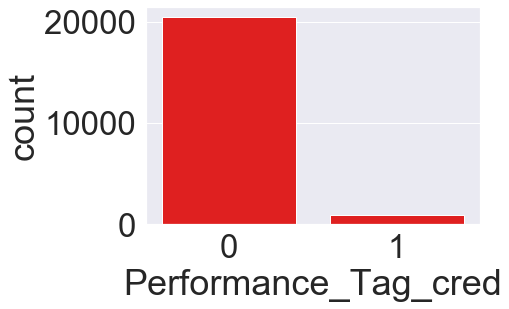

In [114]:
#Visualzing the target variable 
sns.countplot(x= y_val, color="red")

In [115]:
Y_train.head()

Application_ID
311026201    0
168197028    0
90038065     0
107369639    0
301072022    0
Name: Performance_Tag_cred, dtype: int64

In [116]:
X_train.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company
Application_ID,,,,,,,,,,
311026201,-0.010058,-0.010094,-0.003997,-0.025162,-0.178805,0.017390,0.091379,-0.004319,0.239047,-0.150721
168197028,-0.040049,-0.010094,-0.003997,0.040040,-0.011820,0.007904,-0.028033,0.068075,0.110164,0.015869
90038065,-0.040049,-0.010094,-0.003997,0.040040,-0.205147,0.017390,-0.013343,0.004104,0.239047,-0.294304
107369639,0.038959,0.032129,-0.003997,0.004346,-0.330618,0.007904,-0.013343,-0.004319,0.239047,0.007627
301072022,0.038959,0.032129,-0.003997,-0.085198,-0.011820,0.017390,-0.013343,-0.004319,0.239047,0.015869


In [117]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(ratio=0.8, random_state=100)
X_res,y_res=smk.fit_sample(X_train,Y_train)

In [118]:
X_res.shape,y_res.shape

((86071, 10), (86071,))

In [119]:
X_res = pd.DataFrame(X_res)
y_res= pd.DataFrame(y_res)
#Get independent columns and update dataframe
X_res.columns=woe_demo.drop('Performance_Tag_cred',axis=1).columns

In [120]:
X_res.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company
0,-0.010058,-0.010094,-0.003997,-0.025162,-0.178805,0.017390,0.091379,-0.004319,0.239047,-0.150721
1,-0.040049,-0.010094,-0.003997,0.040040,-0.011820,0.007904,-0.028033,0.068075,0.110164,0.015869
2,-0.040049,-0.010094,-0.003997,0.040040,-0.205147,0.017390,-0.013343,0.004104,0.239047,-0.294304
3,0.038959,0.032129,-0.003997,0.004346,-0.330618,0.007904,-0.013343,-0.004319,0.239047,0.007627
4,0.038959,0.032129,-0.003997,-0.085198,-0.011820,0.017390,-0.013343,-0.004319,0.239047,0.015869


In [121]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res[0])))

Original dataset shape Counter({0: 68342, 1: 2947})
Resampled dataset shape Counter({0: 47824, 1: 38247})


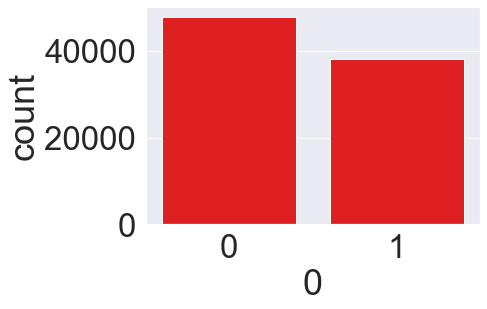

In [122]:
#Visualzing the target variable 
sns.countplot(x= y_res[0], color="red")

#### Logistic Regression model on demo_woe dataset

In [123]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm1 = sm.add_constant(X_res)
logm = sm.GLM(y_res,X_train_sm1, family = sm.families.Binomial())
res1 = logm.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86071
Model:                            GLM   Df Residuals:                    86060
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58793.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1759e+05
Time:                        23:32:08   Pearson chi2:                 8.61e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.1191      0.015     -8.079      0.000      -0.148      -0.090
Age                                  -0.0498      0.030     -1.657      0.098      -0.109       0.009
Gender                               -0.9185      0.378     -2.430      0.015      -1.659      -0.178
Marital_Status                       -5.0649      0.749     -6.765      0.000      -6.532      -3.597
No_of_dependents                      1.0752      0.135      7.950      0.000       0.810       1.340
Income                                0.4843      0.037     13.228      0.000       0.413       0.556
Education                             1.0807      0.262      4.125      0.000       0.567       1.594
Profession                            0.1529      0.149      1.029      0.303      -0.138       0.444
Type_of_residence                     0.6465      0.250      2.587      0.010       0.157       1.136
No_of_months_in_current_residence    -0.0107      0.067     -0.161      0.872      -0.141       0.120
No_of_months_in_current_company       1.2693      0.071     17.959      0.000       1.131       1.408
=====================================================================================================
"""

In [124]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_res.columns
vif['VIF'] = [variance_inflation_factor(X_res.values, i) for i in range(X_res.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,No_of_months_in_current_residence,1.31
9,No_of_months_in_current_company,1.21
4,Income,1.12
0,Age,1.00
1,Gender,1.00
2,Marital_Status,1.00
3,No_of_dependents,1.00
5,Education,1.00
6,Profession,1.00
7,Type_of_residence,1.00


In [125]:
X_res2 = X_train_sm1.drop('No_of_months_in_current_residence',1)

In [126]:
X_train_sm2 = sm.add_constant(X_res2)
logm = sm.GLM(y_res,X_res2, family = sm.families.Binomial())
res2 = logm.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86071
Model:                            GLM   Df Residuals:                    86061
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58793.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1759e+05
Time:                        23:32:09   Pearson chi2:                 8.61e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.1210      0.008    -14.588      0.000      -0.137      -0.105
Age                                -0.0500      0.030     -1.661      0.097      -0.109       0.009
Gender                             -0.9179      0.378     -2.429      0.015      -1.659      -0.177
Marital_Status                     -5.0630      0.749     -6.763      0.000      -6.530      -3.596
No_of_dependents                    1.0752      0.135      7.950      0.000       0.810       1.340
Income                              0.4844      0.037     13.231      0.000       0.413       0.556
Education                           1.0808      0.262      4.125      0.000       0.567       1.594
Profession                          0.1531      0.148      1.031      0.303      -0.138       0.444
Type_of_residence                   0.6464      0.250      2.587      0.010       0.157       1.136
No_of_months_in_current_company     1.2693      0.071     17.961      0.000       1.131       1.408
===================================================================================================
"""

In [127]:
X_res3 = X_res2.drop('Profession',1)

In [128]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res3)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res3 = logm.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86071
Model:                            GLM   Df Residuals:                    86062
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58794.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1759e+05
Time:                        23:32:09   Pearson chi2:                 8.61e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.1211      0.008    -14.597      0.000      -0.137      -0.105
Age                                -0.0501      0.030     -1.665      0.096      -0.109       0.009
Gender                             -0.9138      0.378     -2.418      0.016      -1.654      -0.173
Marital_Status                     -5.0518      0.748     -6.750      0.000      -6.519      -3.585
No_of_dependents                    1.0751      0.135      7.949      0.000       0.810       1.340
Income                              0.4843      0.037     13.229      0.000       0.413       0.556
Education                           1.0799      0.262      4.121      0.000       0.566       1.593
Type_of_residence                   0.6330      0.249      2.538      0.011       0.144       1.122
No_of_months_in_current_company     1.2697      0.071     17.967      0.000       1.131       1.408
===================================================================================================
"""

In [129]:
X_res4 = X_res3.drop('Age',1)

In [130]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res4)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res4 = logm.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86071
Model:                            GLM   Df Residuals:                    86063
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58795.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1759e+05
Time:                        23:32:10   Pearson chi2:                 8.61e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.1210      0.008    -14.583      0.000      -0.137      -0.105
Gender                             -0.9051      0.378     -2.397      0.017      -1.645      -0.165
Marital_Status                     -5.0191      0.748     -6.711      0.000      -6.485      -3.553
No_of_dependents                    1.0783      0.135      7.974      0.000       0.813       1.343
Income                              0.4842      0.037     13.229      0.000       0.412       0.556
Education                           1.0853      0.262      4.142      0.000       0.572       1.599
Type_of_residence                   0.6342      0.249      2.543      0.011       0.145       1.123
No_of_months_in_current_company     1.2685      0.071     17.951      0.000       1.130       1.407
===================================================================================================
"""

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_res4.columns
vif['VIF'] = [variance_inflation_factor(X_res4.values, i) for i in range(X_res4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.44
1,Gender,1.00
2,Marital_Status,1.00
3,No_of_dependents,1.00
4,Income,1.00
5,Education,1.00
6,Type_of_residence,1.00
7,No_of_months_in_current_company,1.00


#### All the above features have less p-values(<0.05) and less VIF(<5 which means less  correlation among variables. Hence we can consider above model as final.

In [132]:
# Getting the predicted values on the train set
y_res_pred = res4.predict(X_train_sm)
y_res_pred[:10]

0    0.405996
1    0.504390
2    0.377590
3    0.432938
4    0.452317
5    0.477924
6    0.424109
7    0.474639
8    0.463761
9    0.429325
dtype: float64

In [133]:
y_res_pred = y_res_pred.values.reshape(-1)
y_res_pred[:10]

array([0.40599599, 0.50439045, 0.37758981, 0.43293785, 0.45231684,
       0.47792436, 0.42410918, 0.47463867, 0.46376083, 0.42932539])

In [134]:
y_res[:5]

,0
0,0
1,0
2,0
3,0
4,0


In [135]:
y_res1 = y_res.values.reshape(-1)
y_res1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [136]:
y_res_pred_final= pd.DataFrame({'Performance Tag':y_res1, 'Probability':y_res_pred})
y_res_pred_final.head()

,Performance Tag,Probability
0,0,0.405996
1,0,0.504390
2,0,0.377590
3,0,0.432938
4,0,0.452317


In [137]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_res_pred_final['predicted'] = y_res_pred_final.Probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_res_pred_final.head()

,Performance Tag,Probability,predicted
0,0,0.405996,0
1,0,0.504390,1
2,0,0.377590,0
3,0,0.432938,0
4,0,0.452317,0


In [138]:
confusion = metrics.confusion_matrix(y_res_pred_final['Performance Tag'], y_res_pred_final.predicted )
print(confusion)

[[47251   573]
 [37693   554]]


In [139]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_res_pred_final['Performance Tag'], y_res_pred_final.predicted))

0.5554135539264096


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.014484796193165478

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.9880185680829708

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve(y_res_pred_final['Performance Tag'], 
                                         y_res_pred_final.Probability, drop_intermediate = False )


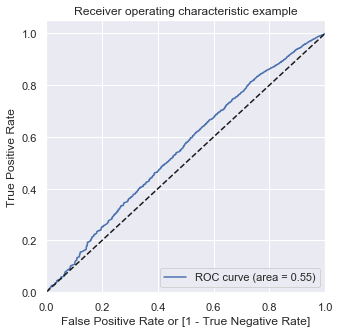

In [145]:
sns.set(font_scale = 1)
draw_roc(y_res_pred_final['Performance Tag'], y_res_pred_final.Probability)

### Section 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Probability.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head(10)

,Performance Tag,Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.405996,0,1,1,1,1,1,0,0,0,0,0
1,0,0.504390,1,1,1,1,1,1,1,0,0,0,0
2,0,0.377590,0,1,1,1,1,0,0,0,0,0,0
3,0,0.432938,0,1,1,1,1,1,0,0,0,0,0
4,0,0.452317,0,1,1,1,1,1,0,0,0,0,0
5,0,0.477924,0,1,1,1,1,1,0,0,0,0,0
6,0,0.424109,0,1,1,1,1,1,0,0,0,0,0
7,0,0.474639,0,1,1,1,1,1,0,0,0,0,0
8,0,0.463761,0,1,1,1,1,1,0,0,0,0,0
9,0,0.429325,0,1,1,1,1,1,0,0,0,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final['Performance Tag'], y_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.444366  1.000000  0.000000
0.1   0.1  0.444412  1.000000  0.000084
0.2   0.2  0.444435  1.000000  0.000125
0.3   0.3  0.444761  1.000000  0.000711
0.4   0.4  0.485948  0.880304  0.170563
0.5   0.5  0.555414  0.014485  0.988019
0.6   0.6  0.555414  0.007164  0.993873
0.7   0.7  0.555541  0.004183  0.996487
0.8   0.8  0.555634  0.000000  1.000000
0.9   0.9  0.555634  0.000000  1.000000


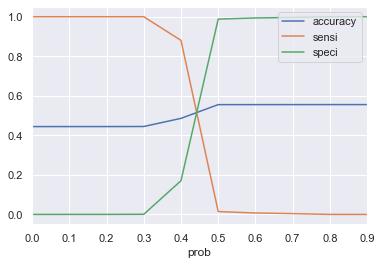

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.44 is the optimum point to take it as a cutoff probability.

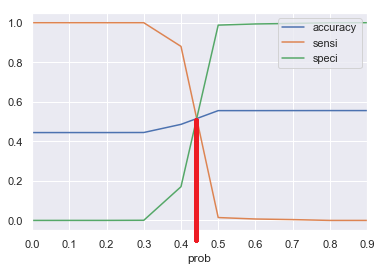

In [149]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Probability.map( lambda x: 1 if x > 0.44 else 0)

y_res_pred_final.head()

,Performance Tag,Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.405996,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.504390,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.377590,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.432938,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.452317,0,1,1,1,1,1,0,0,0,0,0,1


In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)

0.526867353696367

In [151]:
confusion2 = metrics.confusion_matrix(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)
confusion2

array([[20733, 27091],
       [13632, 24615]], dtype=int64)

In [152]:
print('Accuracy : ' + str(accuracy_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))
print('F1 Score : ' + str(f1_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))
print ('Recall score: '+ str(recall_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))
print ('Precision score: '+ str(precision_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))

Accuracy : 0.526867353696367
ROC_AUC Score : 0.5385534939915255
F1 Score : 0.5472858048091782
Recall score: 0.6435798886187152
Precision score: 0.4760569372993463


In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6435798886187152

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.4335270993643359

In [156]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.5664729006356641


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.4760569372993463


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6033173286774335


## Precision and Recall

##### Precision
TP / TP + FP

In [159]:
#Looking at the confusion matrix again
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.4760569372993463

##### Recall
TP / TP + FN

In [160]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.6435798886187152

### Splitting woe_main data into Train & Validation

In [161]:
woe_main1 =woe_main

In [162]:
woe_main1.columns

Index(['Age', 'Gender', 'Marital_Status', 'No_of_dependents', 'Income',
       'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company',
       'No_of_times_90DPD_worse_last_6months',
       'No_of_times_60DPD_worse_last_6months',
       'No_of_times_30DPD_worse_last_6months',
       'No_of_times_90DPD_worse_last_12months',
       'No_of_times_60DPD_worse_last_12months',
       'No_of_times_30DPD_worse_last_12months', 'AvgCC_Utilization_12months',
       'No_of_Trades_opened_in_last_6_months',
       'No_of_Trades_opened_in_last_12_months',
       'No_of_PL_trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_12_months',
       'No_of_Inq_in_last_6_months', 'No_of_Inq_in_last_12_months',
       'Presence_of_open_home_loan', 'Outstanding_Balance',
       'Total_No_of_Trades', 'Presence_of_open_auto_loan',
       'Performance_Tag_cred'],
      dtype='object')

In [163]:
#Take all the independent variables and save as X dataframe
X=pd.DataFrame(woe_main1.drop(['Performance_Tag_cred'],axis=1))
#Get dependent variable into y dataframe
y = woe_demo['Performance_Tag_cred']
#Get independent columns and update dataframe
X.columns

Index(['Age', 'Gender', 'Marital_Status', 'No_of_dependents', 'Income',
       'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company',
       'No_of_times_90DPD_worse_last_6months',
       'No_of_times_60DPD_worse_last_6months',
       'No_of_times_30DPD_worse_last_6months',
       'No_of_times_90DPD_worse_last_12months',
       'No_of_times_60DPD_worse_last_12months',
       'No_of_times_30DPD_worse_last_12months', 'AvgCC_Utilization_12months',
       'No_of_Trades_opened_in_last_6_months',
       'No_of_Trades_opened_in_last_12_months',
       'No_of_PL_trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_12_months',
       'No_of_Inq_in_last_6_months', 'No_of_Inq_in_last_12_months',
       'Presence_of_open_home_loan', 'Outstanding_Balance',
       'Total_No_of_Trades', 'Presence_of_open_auto_loan'],
      dtype='object')

In [164]:
#Train Validation split
X_train, X_val, Y_train, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=200)

In [165]:
X_train.shape,X_val.shape

((49902, 27), (21387, 27))

In [166]:
Y_train.shape,y_val.shape

((49902,), (21387,))

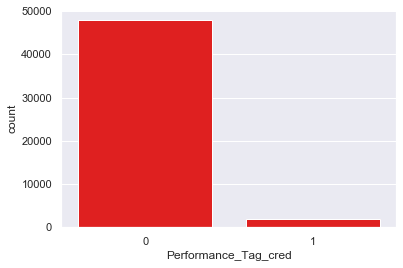

In [167]:
#Visualzing the target variable 
sns.countplot(x= Y_train, color="red")

In [168]:
Y_train.head()

Application_ID
311026201    0
168197028    0
90038065     0
107369639    0
301072022    0
Name: Performance_Tag_cred, dtype: int64

In [169]:
X_train.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_6_months,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan
Application_ID,,,,,,,,,,,,,,,,,,,,,
311026201,-0.010058,-0.010094,-0.003997,-0.025162,-0.178805,0.017390,0.091379,-0.004319,0.239047,-0.150721,...,0.457282,-0.816404,-0.649191,-0.686488,0.554893,-0.498226,0.001235,0.292527,0.529619,0.011973
168197028,-0.040049,-0.010094,-0.003997,0.040040,-0.011820,0.007904,-0.028033,0.068075,0.110164,0.015869,...,0.457282,0.571295,0.199395,0.500166,0.554893,0.484087,0.001235,0.292527,0.529619,0.011973
90038065,-0.040049,-0.010094,-0.003997,0.040040,-0.205147,0.017390,-0.013343,0.004104,0.239047,-0.294304,...,0.457282,-0.816404,-0.649191,-0.686488,0.554893,-0.498226,0.001235,0.292527,0.529619,-0.138237
107369639,0.038959,0.032129,-0.003997,0.004346,-0.330618,0.007904,-0.013343,-0.004319,0.239047,0.007627,...,-0.000353,0.006261,0.352618,0.243113,0.012371,0.013660,0.001235,0.292527,-0.104863,0.011973
301072022,0.038959,0.032129,-0.003997,-0.085198,-0.011820,0.017390,-0.013343,-0.004319,0.239047,0.015869,...,0.457282,0.491736,0.423571,0.243113,0.554893,-0.498226,0.001235,0.292527,0.529619,0.011973


In [170]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(ratio=0.8, random_state=100)
X_res,y_res=smk.fit_sample(X_train,Y_train)

In [171]:
X_res.shape,y_res.shape

((86073, 27), (86073,))

In [172]:
X_res = pd.DataFrame(X_res)
y_res= pd.DataFrame(y_res)
#Get independent columns and update dataframe
X_res.columns=woe_main.drop('Performance_Tag_cred',axis=1).columns

In [173]:
X_res.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_6_months,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan
0,-0.010058,-0.010094,-0.003997,-0.025162,-0.178805,0.017390,0.091379,-0.004319,0.239047,-0.150721,...,0.457282,-0.816404,-0.649191,-0.686488,0.554893,-0.498226,0.001235,0.292527,0.529619,0.011973
1,-0.040049,-0.010094,-0.003997,0.040040,-0.011820,0.007904,-0.028033,0.068075,0.110164,0.015869,...,0.457282,0.571295,0.199395,0.500166,0.554893,0.484087,0.001235,0.292527,0.529619,0.011973
2,-0.040049,-0.010094,-0.003997,0.040040,-0.205147,0.017390,-0.013343,0.004104,0.239047,-0.294304,...,0.457282,-0.816404,-0.649191,-0.686488,0.554893,-0.498226,0.001235,0.292527,0.529619,-0.138237
3,0.038959,0.032129,-0.003997,0.004346,-0.330618,0.007904,-0.013343,-0.004319,0.239047,0.007627,...,-0.000353,0.006261,0.352618,0.243113,0.012371,0.013660,0.001235,0.292527,-0.104863,0.011973
4,0.038959,0.032129,-0.003997,-0.085198,-0.011820,0.017390,-0.013343,-0.004319,0.239047,0.015869,...,0.457282,0.491736,0.423571,0.243113,0.554893,-0.498226,0.001235,0.292527,0.529619,0.011973


In [174]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res[0])))

Original dataset shape Counter({0: 68342, 1: 2947})
Resampled dataset shape Counter({0: 47825, 1: 38248})


### Logistic Regression model on combined dataset imputed with WOE

In [175]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm1 = sm.add_constant(X_res)
logm = sm.GLM(y_res,X_train_sm1, family = sm.families.Binomial())
res1 = logm.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86045
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55107.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1021e+05
Time:                        23:37:32   Pearson chi2:                 8.59e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4857      0.028    -17.478      0.000      -0.540      -0.431
Age                                         -0.0203      0.031     -0.646      0.518      -0.082       0.041
Gender                                       1.2994      0.408      3.188      0.001       0.501       2.098
Marital_Status                              -0.3053      0.721     -0.424      0.672      -1.718       1.108
No_of_dependents                             1.1257      0.150      7.529      0.000       0.833       1.419
Income                                       0.2790      0.037      7.451      0.000       0.206       0.352
Education                                    0.1203      0.305      0.394      0.694      -0.478       0.719
Profession                                  -0.5731      0.167     -3.436      0.001      -0.900      -0.246
Type_of_residence                            0.9874      0.280      3.532      0.000       0.439       1.535
No_of_months_in_current_residence            0.6647      0.075      8.818      0.000       0.517       0.812
No_of_months_in_current_company              1.0363      0.080     12.960      0.000       0.880       1.193
No_of_times_90DPD_worse_last_6months        -0.1555      0.045     -3.478      0.001      -0.243      -0.068
No_of_times_60DPD_worse_last_6months         0.2487      0.062      4.032      0.000       0.128       0.370
No_of_times_30DPD_worse_last_6months         0.2883      0.053      5.421      0.000       0.184       0.393
No_of_times_90DPD_worse_last_12months        0.1513      0.035      4.336      0.000       0.083       0.220
No_of_times_60DPD_worse_last_12months       -0.2977      0.043     -6.894      0.000      -0.382      -0.213
No_of_times_30DPD_worse_last_12months        0.0876      0.028      3.149      0.002       0.033       0.142
AvgCC_Utilization_12months                   0.2791      0.017     16.561      0.000       0.246       0.312
No_of_Trades_opened_in_last_6_months         0.1249      0.050      2.489      0.013       0.027       0.223
No_of_Trades_opened_in_last_12_months        0.0244      0.022      1.124      0.261      -0.018       0.067
No_of_PL_trades_opened_in_last_6_months      0.2237      0.027      8.289      0.000       0.171       0.277
No_of_PL_trades_opened_in_last_12_months     0.1856      0.025      7.323      0.000       0.136       0.235
No_of_Inq_in_last_6_months                   0.0370      0.033      1.118      0.263      -0.028       0.102
No_of_Inq_in_last_12_months                  0.4323      0.024     18.356      0.000       0.386       0.478
Presence_of_open_home_loan                  -0.1785      0.377     -0.474      0.636      -0.917       0.560
Outstanding_Balance            

In [176]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_res.columns
vif['VIF'] = [variance_inflation_factor(X_res.values, i) for i in range(X_res.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,No_of_times_60DPD_worse_last_6months,16.94
12,No_of_times_30DPD_worse_last_6months,14.83
10,No_of_times_90DPD_worse_last_6months,6.75
14,No_of_times_60DPD_worse_last_12months,6.73
17,No_of_Trades_opened_in_last_6_months,6.70
13,No_of_times_90DPD_worse_last_12months,5.54
21,No_of_Inq_in_last_6_months,5.09
15,No_of_times_30DPD_worse_last_12months,3.65
20,No_of_PL_trades_opened_in_last_12_months,3.60
25,Total_No_of_Trades,3.59


In [177]:
X_res2 = X_train_sm1.drop('Age',1)

In [178]:
X_train_sm2 = sm.add_constant(X_res2)
logm = sm.GLM(y_res,X_res2, family = sm.families.Binomial())
res2 = logm.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86046
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55107.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1021e+05
Time:                        23:37:41   Pearson chi2:                 8.59e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4853      0.028    -17.467      0.000      -0.540      -0.431
Gender                                       1.3034      0.408      3.198      0.001       0.505       2.102
Marital_Status                              -0.2931      0.721     -0.407      0.684      -1.705       1.119
No_of_dependents                             1.1276      0.149      7.543      0.000       0.835       1.421
Income                                       0.2791      0.037      7.453      0.000       0.206       0.352
Education                                    0.1212      0.305      0.397      0.691      -0.477       0.720
Profession                                  -0.5735      0.167     -3.438      0.001      -0.900      -0.247
Type_of_residence                            0.9886      0.280      3.536      0.000       0.441       1.537
No_of_months_in_current_residence            0.6637      0.075      8.806      0.000       0.516       0.811
No_of_months_in_current_company              1.0361      0.080     12.958      0.000       0.879       1.193
No_of_times_90DPD_worse_last_6months        -0.1556      0.045     -3.481      0.000      -0.243      -0.068
No_of_times_60DPD_worse_last_6months         0.2485      0.062      4.029      0.000       0.128       0.369
No_of_times_30DPD_worse_last_6months         0.2887      0.053      5.428      0.000       0.184       0.393
No_of_times_90DPD_worse_last_12months        0.1510      0.035      4.327      0.000       0.083       0.219
No_of_times_60DPD_worse_last_12months       -0.2974      0.043     -6.888      0.000      -0.382      -0.213
No_of_times_30DPD_worse_last_12months        0.0877      0.028      3.153      0.002       0.033       0.142
AvgCC_Utilization_12months                   0.2790      0.017     16.560      0.000       0.246       0.312
No_of_Trades_opened_in_last_6_months         0.1245      0.050      2.480      0.013       0.026       0.223
No_of_Trades_opened_in_last_12_months        0.0244      0.022      1.125      0.261      -0.018       0.067
No_of_PL_trades_opened_in_last_6_months      0.2238      0.027      8.290      0.000       0.171       0.277
No_of_PL_trades_opened_in_last_12_months     0.1855      0.025      7.318      0.000       0.136       0.235
No_of_Inq_in_last_6_months                   0.0370      0.033      1.117      0.264      -0.028       0.102
No_of_Inq_in_last_12_months                  0.4323      0.024     18.357      0.000       0.386       0.478
Presence_of_open_home_loan                  -0.1748      0.377     -0.464      0.643      -0.913       0.564
Outstanding_Balance                          0.2011      0.026      7.827      0.000       0.151       0.251
Total_No_of_Trades             

In [179]:
X_res3 = X_res2.drop('Marital_Status',1)

In [180]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res3)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res3 = logm.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86047
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55107.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1021e+05
Time:                        23:37:42   Pearson chi2:                 8.59e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4855      0.028    -17.478      0.000      -0.540      -0.431
Gender                                       1.3044      0.408      3.200      0.001       0.506       2.103
No_of_dependents                             1.1272      0.149      7.541      0.000       0.834       1.420
Income                                       0.2789      0.037      7.449      0.000       0.206       0.352
Education                                    0.1220      0.305      0.399      0.690      -0.477       0.720
Profession                                  -0.5738      0.167     -3.440      0.001      -0.901      -0.247
Type_of_residence                            0.9845      0.279      3.524      0.000       0.437       1.532
No_of_months_in_current_residence            0.6639      0.075      8.809      0.000       0.516       0.812
No_of_months_in_current_company              1.0361      0.080     12.958      0.000       0.879       1.193
No_of_times_90DPD_worse_last_6months        -0.1553      0.045     -3.475      0.001      -0.243      -0.068
No_of_times_60DPD_worse_last_6months         0.2482      0.062      4.024      0.000       0.127       0.369
No_of_times_30DPD_worse_last_6months         0.2883      0.053      5.422      0.000       0.184       0.393
No_of_times_90DPD_worse_last_12months        0.1512      0.035      4.334      0.000       0.083       0.220
No_of_times_60DPD_worse_last_12months       -0.2974      0.043     -6.886      0.000      -0.382      -0.213
No_of_times_30DPD_worse_last_12months        0.0879      0.028      3.157      0.002       0.033       0.142
AvgCC_Utilization_12months                   0.2791      0.017     16.565      0.000       0.246       0.312
No_of_Trades_opened_in_last_6_months         0.1247      0.050      2.485      0.013       0.026       0.223
No_of_Trades_opened_in_last_12_months        0.0245      0.022      1.127      0.260      -0.018       0.067
No_of_PL_trades_opened_in_last_6_months      0.2237      0.027      8.289      0.000       0.171       0.277
No_of_PL_trades_opened_in_last_12_months     0.1854      0.025      7.313      0.000       0.136       0.235
No_of_Inq_in_last_6_months                   0.0370      0.033      1.116      0.265      -0.028       0.102
No_of_Inq_in_last_12_months                  0.4324      0.024     18.364      0.000       0.386       0.479
Presence_of_open_home_loan                  -0.1741      0.377     -0.462      0.644      -0.913       0.565
Outstanding_Balance                          0.2010      0.026      7.826      0.000       0.151       0.251
Total_No_of_Trades                          -0.0935      0.028     -3.316      0.001      -0.149      -0.038
Presence_of_open_auto_loan     

In [181]:
X_res4 = X_res3.drop('Education',1)

In [182]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res4)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res4 = logm.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86048
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55107.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1021e+05
Time:                        23:37:43   Pearson chi2:                 8.59e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4856      0.028    -17.483      0.000      -0.540      -0.431
Gender                                       1.3032      0.408      3.198      0.001       0.504       2.102
No_of_dependents                             1.1272      0.149      7.541      0.000       0.834       1.420
Income                                       0.2789      0.037      7.448      0.000       0.206       0.352
Profession                                  -0.5740      0.167     -3.441      0.001      -0.901      -0.247
Type_of_residence                            0.9849      0.279      3.526      0.000       0.437       1.532
No_of_months_in_current_residence            0.6638      0.075      8.808      0.000       0.516       0.812
No_of_months_in_current_company              1.0362      0.080     12.958      0.000       0.879       1.193
No_of_times_90DPD_worse_last_6months        -0.1554      0.045     -3.476      0.001      -0.243      -0.068
No_of_times_60DPD_worse_last_6months         0.2483      0.062      4.026      0.000       0.127       0.369
No_of_times_30DPD_worse_last_6months         0.2883      0.053      5.422      0.000       0.184       0.393
No_of_times_90DPD_worse_last_12months        0.1513      0.035      4.337      0.000       0.083       0.220
No_of_times_60DPD_worse_last_12months       -0.2975      0.043     -6.889      0.000      -0.382      -0.213
No_of_times_30DPD_worse_last_12months        0.0879      0.028      3.160      0.002       0.033       0.142
AvgCC_Utilization_12months                   0.2792      0.017     16.571      0.000       0.246       0.312
No_of_Trades_opened_in_last_6_months         0.1251      0.050      2.493      0.013       0.027       0.223
No_of_Trades_opened_in_last_12_months        0.0245      0.022      1.128      0.259      -0.018       0.067
No_of_PL_trades_opened_in_last_6_months      0.2237      0.027      8.287      0.000       0.171       0.277
No_of_PL_trades_opened_in_last_12_months     0.1854      0.025      7.312      0.000       0.136       0.235
No_of_Inq_in_last_6_months                   0.0370      0.033      1.118      0.264      -0.028       0.102
No_of_Inq_in_last_12_months                  0.4322      0.024     18.360      0.000       0.386       0.478
Presence_of_open_home_loan                  -0.1735      0.377     -0.460      0.645      -0.912       0.565
Outstanding_Balance                          0.2012      0.026      7.831      0.000       0.151       0.252
Total_No_of_Trades                          -0.0937      0.028     -3.326      0.001      -0.149      -0.038
Presence_of_open_auto_loan                   2.0827      0.203     10.237      0.000       1.684       2.481
===============================

In [183]:
X_res5 = X_res4.drop('No_of_Trades_opened_in_last_12_months',1)

In [184]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res5)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res5 = logm.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86049
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55108.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1022e+05
Time:                        23:37:44   Pearson chi2:                 8.59e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4878      0.028    -17.604      0.000      -0.542      -0.433
Gender                                       1.3025      0.407      3.197      0.001       0.504       2.101
No_of_dependents                             1.1283      0.149      7.549      0.000       0.835       1.421
Income                                       0.2795      0.037      7.466      0.000       0.206       0.353
Profession                                  -0.5731      0.167     -3.436      0.001      -0.900      -0.246
Type_of_residence                            0.9859      0.279      3.529      0.000       0.438       1.534
No_of_months_in_current_residence            0.6656      0.075      8.834      0.000       0.518       0.813
No_of_months_in_current_company              1.0388      0.080     12.997      0.000       0.882       1.195
No_of_times_90DPD_worse_last_6months        -0.1546      0.045     -3.459      0.001      -0.242      -0.067
No_of_times_60DPD_worse_last_6months         0.2495      0.062      4.046      0.000       0.129       0.370
No_of_times_30DPD_worse_last_6months         0.2879      0.053      5.414      0.000       0.184       0.392
No_of_times_90DPD_worse_last_12months        0.1510      0.035      4.328      0.000       0.083       0.219
No_of_times_60DPD_worse_last_12months       -0.2997      0.043     -6.947      0.000      -0.384      -0.215
No_of_times_30DPD_worse_last_12months        0.0875      0.028      3.146      0.002       0.033       0.142
AvgCC_Utilization_12months                   0.2811      0.017     16.766      0.000       0.248       0.314
No_of_Trades_opened_in_last_6_months         0.1320      0.050      2.649      0.008       0.034       0.230
No_of_PL_trades_opened_in_last_6_months      0.2276      0.027      8.503      0.000       0.175       0.280
No_of_PL_trades_opened_in_last_12_months     0.1893      0.025      7.535      0.000       0.140       0.238
No_of_Inq_in_last_6_months                   0.0354      0.033      1.069      0.285      -0.029       0.100
No_of_Inq_in_last_12_months                  0.4398      0.023     19.507      0.000       0.396       0.484
Presence_of_open_home_loan                  -0.1677      0.377     -0.445      0.656      -0.906       0.571
Outstanding_Balance                          0.2034      0.026      7.946      0.000       0.153       0.254
Total_No_of_Trades                          -0.0817      0.026     -3.134      0.002      -0.133      -0.031
Presence_of_open_auto_loan                   2.0868      0.203     10.260      0.000       1.688       2.485
============================================================================================================
"""

In [185]:
X_res6 = X_res5.drop('Presence_of_open_home_loan',1)

In [186]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res6)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res6 = logm.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86050
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55108.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1022e+05
Time:                        23:37:45   Pearson chi2:                 8.59e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4877      0.028    -17.602      0.000      -0.542      -0.433
Gender                                       1.3011      0.407      3.194      0.001       0.503       2.100
No_of_dependents                             1.1275      0.149      7.543      0.000       0.835       1.420
Income                                       0.2794      0.037      7.465      0.000       0.206       0.353
Profession                                  -0.5722      0.167     -3.431      0.001      -0.899      -0.245
Type_of_residence                            0.9865      0.279      3.531      0.000       0.439       1.534
No_of_months_in_current_residence            0.6663      0.075      8.846      0.000       0.519       0.814
No_of_months_in_current_company              1.0387      0.080     12.996      0.000       0.882       1.195
No_of_times_90DPD_worse_last_6months        -0.1548      0.045     -3.463      0.001      -0.242      -0.067
No_of_times_60DPD_worse_last_6months         0.2496      0.062      4.047      0.000       0.129       0.370
No_of_times_30DPD_worse_last_6months         0.2882      0.053      5.419      0.000       0.184       0.392
No_of_times_90DPD_worse_last_12months        0.1512      0.035      4.334      0.000       0.083       0.220
No_of_times_60DPD_worse_last_12months       -0.2998      0.043     -6.951      0.000      -0.384      -0.215
No_of_times_30DPD_worse_last_12months        0.0876      0.028      3.149      0.002       0.033       0.142
AvgCC_Utilization_12months                   0.2815      0.017     16.822      0.000       0.249       0.314
No_of_Trades_opened_in_last_6_months         0.1336      0.050      2.690      0.007       0.036       0.231
No_of_PL_trades_opened_in_last_6_months      0.2274      0.027      8.497      0.000       0.175       0.280
No_of_PL_trades_opened_in_last_12_months     0.1890      0.025      7.527      0.000       0.140       0.238
No_of_Inq_in_last_6_months                   0.0359      0.033      1.085      0.278      -0.029       0.101
No_of_Inq_in_last_12_months                  0.4399      0.023     19.511      0.000       0.396       0.484
Outstanding_Balance                          0.2025      0.026      7.938      0.000       0.153       0.253
Total_No_of_Trades                          -0.0844      0.025     -3.328      0.001      -0.134      -0.035
Presence_of_open_auto_loan                   2.0880      0.203     10.267      0.000       1.689       2.487
============================================================================================================
"""

In [187]:
X_res7 = X_res6.drop('No_of_Inq_in_last_6_months',1)

In [188]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res7)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res7 = logm.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86051
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55109.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1022e+05
Time:                        23:37:45   Pearson chi2:                 8.59e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4771      0.026    -18.399      0.000      -0.528      -0.426
Gender                                       1.2988      0.407      3.188      0.001       0.500       2.097
No_of_dependents                             1.1276      0.149      7.544      0.000       0.835       1.421
Income                                       0.2793      0.037      7.460      0.000       0.206       0.353
Profession                                  -0.5715      0.167     -3.427      0.001      -0.898      -0.245
Type_of_residence                            0.9836      0.279      3.521      0.000       0.436       1.531
No_of_months_in_current_residence            0.6630      0.075      8.809      0.000       0.515       0.810
No_of_months_in_current_company              1.0383      0.080     12.991      0.000       0.882       1.195
No_of_times_90DPD_worse_last_6months        -0.1549      0.045     -3.466      0.001      -0.243      -0.067
No_of_times_60DPD_worse_last_6months         0.2500      0.062      4.055      0.000       0.129       0.371
No_of_times_30DPD_worse_last_6months         0.2885      0.053      5.425      0.000       0.184       0.393
No_of_times_90DPD_worse_last_12months        0.1513      0.035      4.337      0.000       0.083       0.220
No_of_times_60DPD_worse_last_12months       -0.2999      0.043     -6.953      0.000      -0.384      -0.215
No_of_times_30DPD_worse_last_12months        0.0856      0.028      3.084      0.002       0.031       0.140
AvgCC_Utilization_12months                   0.2815      0.017     16.820      0.000       0.249       0.314
No_of_Trades_opened_in_last_6_months         0.1455      0.048      3.002      0.003       0.051       0.240
No_of_PL_trades_opened_in_last_6_months      0.2256      0.027      8.445      0.000       0.173       0.278
No_of_PL_trades_opened_in_last_12_months     0.1866      0.025      7.461      0.000       0.138       0.236
No_of_Inq_in_last_12_months                  0.4420      0.022     19.674      0.000       0.398       0.486
Outstanding_Balance                          0.2020      0.026      7.921      0.000       0.152       0.252
Total_No_of_Trades                          -0.0813      0.025     -3.224      0.001      -0.131      -0.032
Presence_of_open_auto_loan                   2.0888      0.203     10.271      0.000       1.690       2.487
============================================================================================================
"""

In [189]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_res7.columns
vif['VIF'] = [variance_inflation_factor(X_res7.values, i) for i in range(X_res7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,No_of_times_60DPD_worse_last_6months,16.94
10,No_of_times_30DPD_worse_last_6months,14.89
0,const,13.11
8,No_of_times_90DPD_worse_last_6months,6.76
12,No_of_times_60DPD_worse_last_12months,6.72
11,No_of_times_90DPD_worse_last_12months,5.57
13,No_of_times_30DPD_worse_last_12months,3.64
17,No_of_PL_trades_opened_in_last_12_months,3.53
16,No_of_PL_trades_opened_in_last_6_months,3.42
14,AvgCC_Utilization_12months,1.81


In [190]:
#Dropping variables with high VIF values
X_res8 = X_res7.drop('No_of_times_60DPD_worse_last_6months',1)

In [191]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res8)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res8 = logm.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86052
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55117.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1023e+05
Time:                        23:37:49   Pearson chi2:                 8.59e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4767      0.026    -18.387      0.000      -0.528      -0.426
Gender                                       1.3209      0.408      3.238      0.001       0.521       2.120
No_of_dependents                             1.1269      0.149      7.540      0.000       0.834       1.420
Income                                       0.2779      0.037      7.423      0.000       0.205       0.351
Profession                                  -0.5922      0.167     -3.552      0.000      -0.919      -0.265
Type_of_residence                            0.9789      0.279      3.505      0.000       0.432       1.526
No_of_months_in_current_residence            0.6736      0.075      8.958      0.000       0.526       0.821
No_of_months_in_current_company              1.0431      0.080     13.053      0.000       0.887       1.200
No_of_times_90DPD_worse_last_6months        -0.0736      0.040     -1.849      0.064      -0.152       0.004
No_of_times_30DPD_worse_last_6months         0.4154      0.043      9.630      0.000       0.331       0.500
No_of_times_90DPD_worse_last_12months        0.1422      0.035      4.085      0.000       0.074       0.210
No_of_times_60DPD_worse_last_12months       -0.2344      0.040     -5.871      0.000      -0.313      -0.156
No_of_times_30DPD_worse_last_12months        0.0779      0.028      2.814      0.005       0.024       0.132
AvgCC_Utilization_12months                   0.2817      0.017     16.837      0.000       0.249       0.315
No_of_Trades_opened_in_last_6_months         0.1424      0.048      2.940      0.003       0.047       0.237
No_of_PL_trades_opened_in_last_6_months      0.2267      0.027      8.487      0.000       0.174       0.279
No_of_PL_trades_opened_in_last_12_months     0.1850      0.025      7.395      0.000       0.136       0.234
No_of_Inq_in_last_12_months                  0.4419      0.022     19.665      0.000       0.398       0.486
Outstanding_Balance                          0.2031      0.026      7.964      0.000       0.153       0.253
Total_No_of_Trades                          -0.0823      0.025     -3.267      0.001      -0.132      -0.033
Presence_of_open_auto_loan                   2.0841      0.203     10.250      0.000       1.686       2.483
============================================================================================================
"""

In [192]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_res8.columns
vif['VIF'] = [variance_inflation_factor(X_res8.values, i) for i in range(X_res8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.11
9,No_of_times_30DPD_worse_last_6months,9.59
11,No_of_times_60DPD_worse_last_12months,5.84
10,No_of_times_90DPD_worse_last_12months,5.55
8,No_of_times_90DPD_worse_last_6months,5.40
12,No_of_times_30DPD_worse_last_12months,3.62
16,No_of_PL_trades_opened_in_last_12_months,3.52
15,No_of_PL_trades_opened_in_last_6_months,3.42
13,AvgCC_Utilization_12months,1.81
17,No_of_Inq_in_last_12_months,1.73


In [193]:
#Dropping variables with high P values
X_res9 = X_res8.drop('No_of_times_90DPD_worse_last_6months',1)

In [194]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res9)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res9 = logm.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86053
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55119.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1024e+05
Time:                        23:37:53   Pearson chi2:                 8.59e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4800      0.026    -18.553      0.000      -0.531      -0.429
Gender                                       1.3226      0.408      3.242      0.001       0.523       2.122
No_of_dependents                             1.1262      0.149      7.536      0.000       0.833       1.419
Income                                       0.2790      0.037      7.452      0.000       0.206       0.352
Profession                                  -0.5881      0.167     -3.528      0.000      -0.915      -0.261
Type_of_residence                            0.9774      0.279      3.501      0.000       0.430       1.525
No_of_months_in_current_residence            0.6734      0.075      8.953      0.000       0.526       0.821
No_of_months_in_current_company              1.0450      0.080     13.077      0.000       0.888       1.202
No_of_times_30DPD_worse_last_6months         0.3946      0.042      9.481      0.000       0.313       0.476
No_of_times_90DPD_worse_last_12months        0.1089      0.030      3.658      0.000       0.051       0.167
No_of_times_60DPD_worse_last_12months       -0.2474      0.039     -6.295      0.000      -0.324      -0.170
No_of_times_30DPD_worse_last_12months        0.0820      0.028      2.972      0.003       0.028       0.136
AvgCC_Utilization_12months                   0.2830      0.017     16.925      0.000       0.250       0.316
No_of_Trades_opened_in_last_6_months         0.1474      0.048      3.047      0.002       0.053       0.242
No_of_PL_trades_opened_in_last_6_months      0.2283      0.027      8.553      0.000       0.176       0.281
No_of_PL_trades_opened_in_last_12_months     0.1873      0.025      7.500      0.000       0.138       0.236
No_of_Inq_in_last_12_months                  0.4426      0.022     19.704      0.000       0.399       0.487
Outstanding_Balance                          0.2026      0.026      7.945      0.000       0.153       0.253
Total_No_of_Trades                          -0.0798      0.025     -3.171      0.002      -0.129      -0.030
Presence_of_open_auto_loan                   2.0826      0.203     10.244      0.000       1.684       2.481
============================================================================================================
"""

In [195]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_res9_vif = X_res9.drop('const',1)
vif = pd.DataFrame()
vif['Features'] = X_res9_vif.columns
vif['VIF'] = [variance_inflation_factor(X_res9_vif.values, i) for i in range(X_res9_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,No_of_times_30DPD_worse_last_6months,8.87
9,No_of_times_60DPD_worse_last_12months,5.67
12,No_of_Trades_opened_in_last_6_months,4.70
8,No_of_times_90DPD_worse_last_12months,4.05
10,No_of_times_30DPD_worse_last_12months,3.61
14,No_of_PL_trades_opened_in_last_12_months,3.51
13,No_of_PL_trades_opened_in_last_6_months,3.37
5,No_of_months_in_current_residence,3.11
17,Total_No_of_Trades,2.92
15,No_of_Inq_in_last_12_months,1.97


In [196]:
#Dropping variables with high VIF values
X_res10 = X_res9.drop('No_of_times_30DPD_worse_last_6months',1)

In [197]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res10)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res10 = logm.fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86054
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55164.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1033e+05
Time:                        23:37:58   Pearson chi2:                 8.59e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4954      0.026    -19.201      0.000      -0.546      -0.445
Gender                                       1.2373      0.406      3.050      0.002       0.442       2.032
No_of_dependents                             1.1152      0.149      7.466      0.000       0.822       1.408
Income                                       0.2811      0.037      7.508      0.000       0.208       0.354
Profession                                  -0.5961      0.167     -3.578      0.000      -0.923      -0.270
Type_of_residence                            0.9711      0.279      3.482      0.000       0.424       1.518
No_of_months_in_current_residence            0.6790      0.075      9.039      0.000       0.532       0.826
No_of_months_in_current_company              1.0555      0.080     13.216      0.000       0.899       1.212
No_of_times_90DPD_worse_last_12months        0.2170      0.027      7.905      0.000       0.163       0.271
No_of_times_60DPD_worse_last_12months       -0.0519      0.033     -1.561      0.118      -0.117       0.013
No_of_times_30DPD_worse_last_12months        0.1966      0.025      7.945      0.000       0.148       0.245
AvgCC_Utilization_12months                   0.2900      0.017     17.372      0.000       0.257       0.323
No_of_Trades_opened_in_last_6_months         0.1617      0.048      3.344      0.001       0.067       0.256
No_of_PL_trades_opened_in_last_6_months      0.2400      0.027      9.008      0.000       0.188       0.292
No_of_PL_trades_opened_in_last_12_months     0.1930      0.025      7.734      0.000       0.144       0.242
No_of_Inq_in_last_12_months                  0.4542      0.022     20.257      0.000       0.410       0.498
Outstanding_Balance                          0.2057      0.025      8.068      0.000       0.156       0.256
Total_No_of_Trades                          -0.0700      0.025     -2.780      0.005      -0.119      -0.021
Presence_of_open_auto_loan                   2.0806      0.203     10.244      0.000       1.683       2.479
============================================================================================================
"""

In [198]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_res10_vif = X_res10.drop('const',1)
vif = pd.DataFrame()
vif['Features'] = X_res10_vif.columns
vif['VIF'] = [variance_inflation_factor(X_res10_vif.values, i) for i in range(X_res10_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,No_of_Trades_opened_in_last_6_months,4.70
8,No_of_times_60DPD_worse_last_12months,4.20
13,No_of_PL_trades_opened_in_last_12_months,3.51
7,No_of_times_90DPD_worse_last_12months,3.38
12,No_of_PL_trades_opened_in_last_6_months,3.37
5,No_of_months_in_current_residence,3.11
16,Total_No_of_Trades,2.92
9,No_of_times_30DPD_worse_last_12months,2.88
14,No_of_Inq_in_last_12_months,1.96
10,AvgCC_Utilization_12months,1.89


In [199]:
#Dropping variables with high P values
X_res11 = X_res10.drop('No_of_times_60DPD_worse_last_12months',1)

In [200]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_res11)
logm = sm.GLM(y_res,X_train_sm, family = sm.families.Binomial())
res11 = logm.fit()
res11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                86073
Model:                            GLM   Df Residuals:                    86055
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55165.
Date:                Sun, 22 Dec 2019   Deviance:                   1.1033e+05
Time:                        23:38:02   Pearson chi2:                 8.59e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4945      0.026    -19.172      0.000      -0.545      -0.444
Gender                                       1.2294      0.405      3.032      0.002       0.435       2.024
No_of_dependents                             1.1189      0.149      7.492      0.000       0.826       1.412
Income                                       0.2799      0.037      7.479      0.000       0.207       0.353
Profession                                  -0.6023      0.167     -3.616      0.000      -0.929      -0.276
Type_of_residence                            0.9671      0.279      3.468      0.001       0.421       1.514
No_of_months_in_current_residence            0.6858      0.075      9.146      0.000       0.539       0.833
No_of_months_in_current_company              1.0529      0.080     13.189      0.000       0.896       1.209
No_of_times_90DPD_worse_last_12months        0.1937      0.023      8.408      0.000       0.149       0.239
No_of_times_30DPD_worse_last_12months        0.1763      0.021      8.374      0.000       0.135       0.218
AvgCC_Utilization_12months                   0.2890      0.017     17.326      0.000       0.256       0.322
No_of_Trades_opened_in_last_6_months         0.1588      0.048      3.287      0.001       0.064       0.254
No_of_PL_trades_opened_in_last_6_months      0.2389      0.027      8.968      0.000       0.187       0.291
No_of_PL_trades_opened_in_last_12_months     0.1923      0.025      7.707      0.000       0.143       0.241
No_of_Inq_in_last_12_months                  0.4550      0.022     20.293      0.000       0.411       0.499
Outstanding_Balance                          0.2065      0.025      8.102      0.000       0.157       0.256
Total_No_of_Trades                          -0.0720      0.025     -2.866      0.004      -0.121      -0.023
Presence_of_open_auto_loan                   2.0846      0.203     10.265      0.000       1.687       2.483
============================================================================================================
"""

In [201]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_res11_vif = X_res11.drop('const',1)
vif = pd.DataFrame()
vif['Features'] = X_res11_vif.columns
vif['VIF'] = [variance_inflation_factor(X_res11_vif.values, i) for i in range(X_res11_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,No_of_Trades_opened_in_last_6_months,4.69
12,No_of_PL_trades_opened_in_last_12_months,3.51
11,No_of_PL_trades_opened_in_last_6_months,3.36
5,No_of_months_in_current_residence,3.08
15,Total_No_of_Trades,2.91
7,No_of_times_90DPD_worse_last_12months,2.40
8,No_of_times_30DPD_worse_last_12months,2.11
13,No_of_Inq_in_last_12_months,1.96
9,AvgCC_Utilization_12months,1.88
14,Outstanding_Balance,1.50


#### All the above features have less p-values(<0.05) and less VIF(<5 which means less  correlation among variables. Hence we can consider above model as final.

In [202]:
# Getting the predicted values on the train set
y_res_pred = res11.predict(X_train_sm)
y_res_pred[:10]

0    0.206868
1    0.559223
2    0.158235
3    0.381555
4    0.517320
5    0.614031
6    0.507176
7    0.213282
8    0.509160
9    0.202884
dtype: float64

In [203]:
y_res_pred = y_res_pred.values.reshape(-1)
y_res_pred[:10]

array([0.20686826, 0.55922283, 0.15823478, 0.38155455, 0.51732026,
       0.61403113, 0.50717618, 0.21328212, 0.50915988, 0.20288447])

In [204]:
y_res[:5]

,0
0,0
1,0
2,0
3,0
4,0


In [205]:
y_res1 = y_res.values.reshape(-1)
y_res1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [206]:
y_res_pred_final= pd.DataFrame({'Performance Tag':y_res1, 'Probability':y_res_pred})
y_res_pred_final.head()

,Performance Tag,Probability
0,0,0.206868
1,0,0.559223
2,0,0.158235
3,0,0.381555
4,0,0.517320


In [207]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_res_pred_final['predicted'] = y_res_pred_final.Probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_res_pred_final.head()

,Performance Tag,Probability,predicted
0,0,0.206868,0
1,0,0.559223,1
2,0,0.158235,0
3,0,0.381555,0
4,0,0.517320,1


In [208]:
confusion = metrics.confusion_matrix(y_res_pred_final['Performance Tag'], y_res_pred_final.predicted )
print(confusion)

[[31857 15968]
 [16655 21593]]


In [209]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_res_pred_final['Performance Tag'], y_res_pred_final.predicted))

0.620984513145818


In [210]:
print('Accuracy : ' + str(accuracy_score(y_res_pred_final['Performance Tag'], y_res_pred_final.predicted)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_res_pred_final['Performance Tag'], y_res_pred_final.predicted)))
print('F1 Score : ' + str(f1_score(y_res_pred_final['Performance Tag'], y_res_pred_final.predicted)))
print('Recall score: '+ str(recall_score(y_res_pred_final['Performance Tag'], y_res_pred_final.predicted)))
print('Precision score: '+ str(precision_score(y_res_pred_final['Performance Tag'], y_res_pred_final.predicted)))

Accuracy : 0.620984513145818
ROC_AUC Score : 0.6153342214942337
F1 Score : 0.5696685090160799
Recall score: 0.5645523948964651
Precision score: 0.5748781981310401


In [211]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [212]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5645523948964651

In [213]:
# Let us calculate specificity
TN / float(TN+FP)

0.6661160480920021

In [214]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [215]:
fpr, tpr, thresholds = metrics.roc_curve(y_res_pred_final['Performance Tag'], 
                                         y_res_pred_final.Probability, drop_intermediate = False )


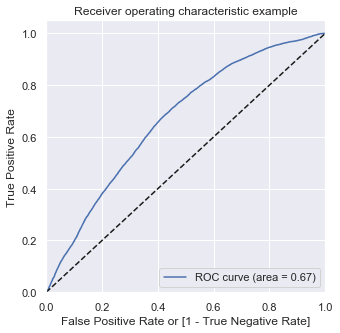

In [216]:
sns.set(font_scale = 1)
draw_roc(y_res_pred_final['Performance Tag'], y_res_pred_final.Probability)

### Section 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [217]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Probability.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head(10)

,Performance Tag,Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.206868,0,1,1,1,0,0,0,0,0,0,0
1,0,0.559223,1,1,1,1,1,1,1,0,0,0,0
2,0,0.158235,0,1,1,0,0,0,0,0,0,0,0
3,0,0.381555,0,1,1,1,1,0,0,0,0,0,0
4,0,0.517320,1,1,1,1,1,1,1,0,0,0,0
5,0,0.614031,1,1,1,1,1,1,1,1,0,0,0
6,0,0.507176,1,1,1,1,1,1,1,0,0,0,0
7,0,0.213282,0,1,1,1,0,0,0,0,0,0,0
8,0,0.509160,1,1,1,1,1,1,1,0,0,0,0
9,0,0.202884,0,1,1,1,0,0,0,0,0,0,0


In [218]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final['Performance Tag'], y_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.444367  1.000000  0.000000
0.1   0.1  0.444437  1.000000  0.000125
0.2   0.2  0.489747  0.971110  0.104778
0.3   0.3  0.571526  0.892125  0.315128
0.4   0.4  0.606752  0.784302  0.464757
0.5   0.5  0.620985  0.564552  0.666116
0.6   0.6  0.590011  0.211985  0.892337
0.7   0.7  0.555424  0.000418  0.999289
0.8   0.8  0.555587  0.000000  0.999916
0.9   0.9  0.555621  0.000000  0.999979


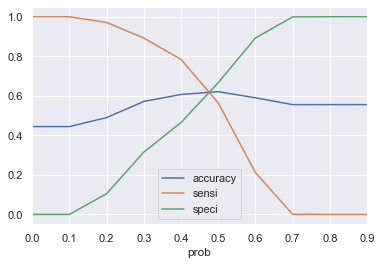

In [219]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.47 is the optimum point to take it as a cutoff probability.

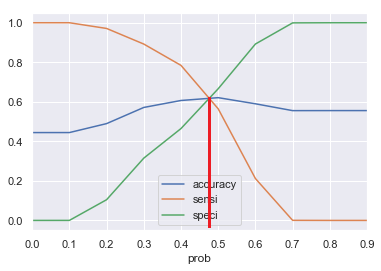

In [220]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Probability.map( lambda x: 1 if x > 0.47 else 0)

y_res_pred_final.head()

,Performance Tag,Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.206868,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.559223,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.158235,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.381555,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.517320,1,1,1,1,1,1,1,0,0,0,0,1


In [221]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)

0.625062446992669

In [222]:
confusion2 = metrics.confusion_matrix(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)
confusion2

array([[28712, 19113],
       [13159, 25089]], dtype=int64)

In [223]:
print('Accuracy : ' + str(accuracy_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))
print('F1 Score : ' + str(f1_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))
print('Recall score: '+ str(recall_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))
print('Precision score: '+ str(precision_score(y_res_pred_final['Performance Tag'], y_res_pred_final.final_predicted)))

Accuracy : 0.625062446992669
ROC_AUC Score : 0.6281556647987936
F1 Score : 0.6085870224378411
Recall score: 0.6559558669734366
Precision score: 0.5675987511877291


In [224]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [225]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6559558669734366

In [226]:
# Let us calculate specificity
TN / float(TN+FP)

0.6003554626241505

In [227]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.39964453737584943


In [228]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5675987511877291


In [229]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6857252036015381


## Precision and Recall

##### Precision
TP / TP + FP

In [230]:
#Looking at the confusion matrix again
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.5675987511877291

##### Recall
TP / TP + FN

In [231]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.6559558669734366

#### Making predictions on the validation set

In [232]:
X_val.columns

Index(['Age', 'Gender', 'Marital_Status', 'No_of_dependents', 'Income',
       'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company',
       'No_of_times_90DPD_worse_last_6months',
       'No_of_times_60DPD_worse_last_6months',
       'No_of_times_30DPD_worse_last_6months',
       'No_of_times_90DPD_worse_last_12months',
       'No_of_times_60DPD_worse_last_12months',
       'No_of_times_30DPD_worse_last_12months', 'AvgCC_Utilization_12months',
       'No_of_Trades_opened_in_last_6_months',
       'No_of_Trades_opened_in_last_12_months',
       'No_of_PL_trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_12_months',
       'No_of_Inq_in_last_6_months', 'No_of_Inq_in_last_12_months',
       'Presence_of_open_home_loan', 'Outstanding_Balance',
       'Total_No_of_Trades', 'Presence_of_open_auto_loan'],
      dtype='object')

In [233]:
X_res11.columns

Index(['const', 'Gender', 'No_of_dependents', 'Income', 'Profession',
       'Type_of_residence', 'No_of_months_in_current_residence',
       'No_of_months_in_current_company',
       'No_of_times_90DPD_worse_last_12months',
       'No_of_times_30DPD_worse_last_12months', 'AvgCC_Utilization_12months',
       'No_of_Trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_12_months',
       'No_of_Inq_in_last_12_months', 'Outstanding_Balance',
       'Total_No_of_Trades', 'Presence_of_open_auto_loan'],
      dtype='object')

In [234]:
#Retrieving the columns in validation set as those that are considered in training set.
X_val1 = X_val[['Gender', 'No_of_dependents', 'Income', 'Profession',
       'Type_of_residence', 'No_of_months_in_current_residence',
       'No_of_months_in_current_company',
       'No_of_times_90DPD_worse_last_12months',
       'No_of_times_30DPD_worse_last_12months', 'AvgCC_Utilization_12months',
       'No_of_Trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_12_months',
       'No_of_Inq_in_last_12_months', 'Outstanding_Balance',
       'Total_No_of_Trades', 'Presence_of_open_auto_loan']]
X_val1.head()

,Gender,No_of_dependents,Income,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,No_of_times_90DPD_worse_last_12months,No_of_times_30DPD_worse_last_12months,AvgCC_Utilization_12months,No_of_Trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_12_months,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan
Application_ID,,,,,,,,,,,,,,,,,
534356442,0.032129,-0.085198,-0.011820,-0.013343,-0.004319,0.239047,0.007627,-0.356637,-0.268944,-0.794568,0.457282,-0.649191,-0.686488,-0.498226,0.292527,0.529619,-0.138237
556413458,-0.010094,-0.085198,-0.178805,-0.028033,-0.004319,0.239047,0.015869,-0.356637,-0.268944,-0.794568,0.457282,-0.649191,-0.686488,-0.498226,-0.938697,0.529619,0.011973
623833947,0.032129,0.054178,-0.330618,-0.013343,-0.004319,0.239047,0.015869,0.508779,-0.268944,-0.794568,-0.000353,0.438391,0.243113,0.484087,0.292527,-0.104863,0.011973
52615265,-0.010094,-0.025162,-0.011820,-0.013343,-0.004319,0.239047,-0.063642,-0.356637,-0.268944,0.545981,0.457282,0.438391,0.426105,0.484087,0.202003,0.529619,0.011973
567981614,-0.010094,0.054178,-0.011820,-0.028033,-0.004319,0.239047,0.007627,-0.356637,-0.268944,0.436073,0.457282,-0.649191,-0.686488,0.484087,-0.938697,0.529619,0.011973


In [235]:
# Getting the predicted values on the train set
X_val1 = sm.add_constant(X_val1)
y_res_pred_test = res11.predict(X_val1)
y_res_pred_test[:10]

Application_ID
534356442    0.192929
556413458    0.189495
623833947    0.495914
52615265     0.527908
567981614    0.387771
167977237    0.188254
546827643    0.423344
706296471    0.476714
887557794    0.476019
508833535    0.346732
dtype: float64

In [236]:
# Converting y_val to dataframe
y_val1 =y_val
y_val_df = pd.DataFrame(y_val1)

In [237]:
y_val_df.head()

,Performance_Tag_cred
Application_ID,
534356442,0
556413458,0
623833947,0
52615265,0
567981614,0


In [238]:
y_val_df= y_val_df.rename(columns={ 0 : 'Performance_Tag_cred'})
y_val_df = y_val_df[['Performance_Tag_cred']]
y_val_df.head()

,Performance_Tag_cred
Application_ID,
534356442,0
556413458,0
623833947,0
52615265,0
567981614,0


In [239]:
# Putting CustID to index
y_val_df['Application_ID'] = y_val_df.index

In [240]:
y_res_pred_test.head()

Application_ID
534356442    0.192929
556413458    0.189495
623833947    0.495914
52615265     0.527908
567981614    0.387771
dtype: float64

In [241]:
# Removing index for both dataframes to append them side by side 
y_res_pred_test.reset_index(drop=True, inplace=True)
y_val_df.reset_index(drop=True, inplace=True)

In [242]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_val_df, y_res_pred_test],axis=1)

In [243]:
y_pred_final.head()

,Performance_Tag_cred,Application_ID,0
0,0,534356442,0.192929
1,0,556413458,0.189495
2,0,623833947,0.495914
3,0,52615265,0.527908
4,0,567981614,0.387771


In [244]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Performance_Tag_cred_Prob'})



# Let's see the head of y_pred_final
y_pred_final.head()

,Performance_Tag_cred,Application_ID,Performance_Tag_cred_Prob
0,0,534356442,0.192929
1,0,556413458,0.189495
2,0,623833947,0.495914
3,0,52615265,0.527908
4,0,567981614,0.387771


In [245]:
y_pred_final['final_predicted'] = y_pred_final.Performance_Tag_cred_Prob.map(lambda x: 1 if x > 0.47 else 0)

y_pred_final.head()

,Performance_Tag_cred,Application_ID,Performance_Tag_cred_Prob,final_predicted
0,0,534356442,0.192929,0
1,0,556413458,0.189495,0
2,0,623833947,0.495914,1
3,0,52615265,0.527908,1
4,0,567981614,0.387771,0


In [246]:
confusion_test = metrics.confusion_matrix(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)
confusion_test

array([[12142,  8317],
       [  343,   585]], dtype=int64)

In [247]:
print('Accuracy : ' + str(accuracy_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))
print('F1 Score : ' + str(f1_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))
print('Recall score: '+ str(recall_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))
print('Precision score: '+ str(precision_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))

Accuracy : 0.5950811240473185
ROC_AUC Score : 0.6119337866228672
F1 Score : 0.11902339776195321
Recall score: 0.6303879310344828
Precision score: 0.06571556953493597


In [248]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [249]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0425640279394645

In [250]:
# Let us calculate specificity
TN / float(TN+FP)

0.5934796422112518

In [251]:
print('F1 Score : ' + str(f1_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))

F1 Score : 0.11902339776195321


##### Precision
TP / TP + FP

In [252]:
#Looking at the confusion matrix again
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.06571556953493597

##### Recall
TP / TP + FN

In [253]:
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.6303879310344828

In [254]:
#Retrieving the columns in validation set as those that are considered in training set.
X_rej1 = X_rej[['Gender', 'No_of_dependents', 'Income', 'Profession',
       'Type_of_residence', 'No_of_months_in_current_residence',
       'No_of_months_in_current_company',
       'No_of_times_90DPD_worse_last_12months',
       'No_of_times_30DPD_worse_last_12months', 'AvgCC_Utilization_12months',
       'No_of_Trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_12_months',
       'No_of_Inq_in_last_12_months', 'Outstanding_Balance',
       'Total_No_of_Trades', 'Presence_of_open_auto_loan']]

X_rej1.head()

,Gender,No_of_dependents,Income,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,No_of_times_90DPD_worse_last_12months,No_of_times_30DPD_worse_last_12months,AvgCC_Utilization_12months,No_of_Trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_12_months,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan
Application_ID,,,,,,,,,,,,,,,,,
207075,1.0,0.50,0.027027,0.0,1.00,0.000000,0.222222,0.4,0.222222,0.69,0.666667,0.75,0.75,0.500,0.255794,0.666667,0.0
4498953,1.0,0.50,0.333333,0.5,1.00,0.625000,0.041667,0.2,0.222222,0.77,0.333333,0.25,0.50,0.375,0.188711,0.466667,0.0
5976236,1.0,0.75,0.081081,0.5,0.75,0.983333,0.250000,0.4,0.333333,0.67,0.166667,0.25,0.50,0.375,0.192080,0.400000,0.0
6353025,0.0,0.75,0.441441,0.0,1.00,0.000000,0.138889,0.2,0.333333,0.83,0.500000,0.50,0.50,0.625,0.174060,0.400000,0.0
6663850,0.0,0.50,0.261261,0.0,0.75,0.000000,0.444444,0.8,0.333333,0.65,0.333333,0.25,0.25,0.250,0.083017,0.333333,0.0


In [255]:
X_rej1 = sm.add_constant(X_rej1)

In [256]:
X_rej1 = sm.add_constant(X_rej1)
y_rej_pred = res11.predict(X_rej1)

In [257]:
# Converting y_val to dataframe
y_rej1 =y_rej
y_rej_df = pd.DataFrame(y_rej1)

In [258]:
y_rej_df.head()

,Performance_Tag_cred
Application_ID,
207075,1
4498953,1
5976236,1
6353025,1
6663850,1


In [259]:
y_rej_pred.head()

Application_ID
207075     0.970131
4498953    0.961256
5976236    0.974721
6353025    0.924523
6663850    0.880859
dtype: float64

In [260]:
# Removing index for both dataframes to append them side by side 
y_rej_pred.reset_index(drop=True, inplace=True)
y_rej_df.reset_index(drop=True, inplace=True)

In [261]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_rej_df, y_rej_pred],axis=1)

In [262]:
y_pred_final.head()

,Performance_Tag_cred,0
0,1,0.970131
1,1,0.961256
2,1,0.974721
3,1,0.924523
4,1,0.880859


In [263]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Performance_Tag_cred_Prob'})



# Let's see the head of y_pred_final
y_pred_final.head()

,Performance_Tag_cred,Performance_Tag_cred_Prob
0,1,0.970131
1,1,0.961256
2,1,0.974721
3,1,0.924523
4,1,0.880859


In [264]:
y_pred_final['final_predicted'] = y_pred_final.Performance_Tag_cred_Prob.map(lambda x: 1 if x > 0.47 else 0)

y_pred_final.head()

,Performance_Tag_cred,Performance_Tag_cred_Prob,final_predicted
0,1,0.970131,1
1,1,0.961256,1
2,1,0.974721,1
3,1,0.924523,1
4,1,0.880859,1


In [265]:
confusion_test = metrics.confusion_matrix(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)
confusion_test

array([[1423]], dtype=int64)

In [266]:
print('Accuracy : ' + str(accuracy_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))
print('F1 Score : ' + str(f1_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))
print('Recall score: '+ str(recall_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))
print('Precision score: '+ str(precision_score(y_pred_final.Performance_Tag_cred, y_pred_final.final_predicted)))

Accuracy : 1.0
F1 Score : 1.0
Recall score: 1.0
Precision score: 1.0


### Logistic regression with Grid search

In [267]:
# Logistic regression with default values
LR = LogisticRegression(class_weight='balanced')

# parameter grid
param_grid = {'penalty': ['l1', 'l2'],'C':[0.005, 0.01, 0.05, 0.1, 0.5, 1]}
# run grid search
folds = 5
grid_search_LR = GridSearchCV(LR, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 5, n_jobs=-1)
# fit 
grid_search_LR.fit(X_res, y_res)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:   29.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   29.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=5)

In [268]:
# scores of GridSearch CV
scores = grid_search_LR.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.336178,0.084232,0.032801,0.017120,0.005,l1,"{'C': 0.005, 'penalty': 'l1'}",0.663187,0.663653,0.660525,...,0.661458,0.001628,12,0.661095,0.660866,0.661681,0.662183,0.661833,0.661532,0.000484
1,1.596908,0.200369,0.034755,0.013396,0.005,l2,"{'C': 0.005, 'penalty': 'l2'}",0.667123,0.668683,0.666190,...,0.665918,0.001929,10,0.666195,0.665674,0.666034,0.666729,0.666624,0.666251,0.000387
2,1.652540,0.279312,0.017361,0.002892,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.665124,0.665283,0.663227,...,0.663553,0.001430,11,0.663589,0.663363,0.663716,0.663960,0.664037,0.663733,0.000246
3,2.037672,0.077314,0.025750,0.007430,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.667631,0.669578,0.667482,...,0.666702,0.002034,9,0.667151,0.666480,0.666766,0.667611,0.667532,0.667108,0.000435
4,3.428420,0.328056,0.031066,0.002750,0.05,l1,"{'C': 0.05, 'penalty': 'l1'}",0.668129,0.670242,0.668657,...,0.667537,0.001973,8,0.668438,0.667284,0.667598,0.668691,0.668597,0.668122,0.000570


In [269]:
# printing the optimal auc score and hyperparameters
print('We get auc score of',grid_search_LR.best_score_,'using',grid_search_LR.best_params_)

We get auc score of 0.6686857291324324 using {'C': 1, 'penalty': 'l1'}


In [270]:
# Logistic regression with best values
LR_optimal = LogisticRegression(C= 1, penalty= 'l2')

# fit 
LR_optimal.fit(X_res, y_res)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [271]:
predictions = LR_optimal.predict(X_res)

In [272]:
print(classification_report(y_res,predictions))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66     47825
           1       0.58      0.56      0.57     38248

    accuracy                           0.62     86073
   macro avg       0.62      0.62      0.62     86073
weighted avg       0.62      0.62      0.62     86073



In [273]:
confusion_mat = metrics.confusion_matrix(y_res,predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,32137,15688
Actual 1,16812,21436


In [274]:
print('Accuracy : ' + str(accuracy_score(y_res,predictions)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_res,predictions)))
print('F1 Score : ' + str(f1_score(y_res,predictions)))
print('Recall score: '+ str(recall_score(y_res,predictions)))
print('Precision score: '+ str(precision_score(y_res,predictions)))

Accuracy : 0.622413532698988
ROC_AUC Score : 0.6162091658554788
F1 Score : 0.5688053919227298
Recall score: 0.5604476051035349
Precision score: 0.577416226699709


In [275]:
#Verifying for validation data
predictions_val = LR_optimal.predict(X_val)

print(classification_report(y_val,predictions_val))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79     20459
           1       0.07      0.55      0.13       928

    accuracy                           0.66     21387
   macro avg       0.52      0.61      0.46     21387
weighted avg       0.93      0.66      0.76     21387



In [276]:
confusion_mat = metrics.confusion_matrix(y_val,predictions_val)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,13703,6756
Actual 1,415,513


In [277]:
from sklearn.metrics import roc_auc_score

print('Accuracy : ' + str(accuracy_score(y_val,predictions_val)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_val,predictions_val)))
print('F1 Score : ' + str(f1_score(y_val,predictions_val)))
print ('Recall score: '+ str(recall_score(y_val,predictions_val)))
print ('Precision score: '+ str(precision_score(y_val,predictions_val)))

Accuracy : 0.6647028568756721
ROC_AUC Score : 0.6112901528456408
F1 Score : 0.12516774429669392
Recall score: 0.552801724137931
Precision score: 0.07057366900536526


In [278]:
# Let's check the results of optimal model on rejected data
print(classification_report(y_rej,LR_optimal.predict(X_rej)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1423

    accuracy                           1.00      1423
   macro avg       1.00      1.00      1.00      1423
weighted avg       1.00      1.00      1.00      1423



In [279]:
# Printing confusion matrix
print(confusion_matrix(y_rej,LR_optimal.predict(X_rej)))

[[1423]]


In [280]:
print('Accuracy : ' + str(accuracy_score(y_rej,LR_optimal.predict(X_rej))))
print('F1 Score : ' + str(f1_score(y_rej,LR_optimal.predict(X_rej))))
print('Recall score: '+ str(recall_score(y_rej,LR_optimal.predict(X_rej))))
print('Precision score: '+ str(precision_score(y_rej,LR_optimal.predict(X_rej))))

Accuracy : 1.0
F1 Score : 1.0
Recall score: 1.0
Precision score: 1.0


### Model building- Random Forest

In [281]:
# Running the random forest with default parameter and balanced subsample to tackle class imbalance.
rfc = RandomForestClassifier(class_weight='balanced_subsample',random_state=100)

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [282]:
# Making predictions
predictions = rfc.predict(X_res)

In [283]:
# Let's check the report of our default model
print(classification_report(y_res,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     47825
           1       1.00      0.99      1.00     38248

    accuracy                           1.00     86073
   macro avg       1.00      1.00      1.00     86073
weighted avg       1.00      1.00      1.00     86073



In [284]:
# Printing confusion matrix
confusion_mat = metrics.confusion_matrix(y_res, predictions)
confusion_mat = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_mat

,Predicted 0,Predicted 1
Actual 0,47822,3
Actual 1,377,37871


In [285]:
print('Accuracy : ' + str(accuracy_score(y_res,predictions)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_res,predictions)))
print('F1 Score : ' + str(f1_score(y_res,predictions)))
print ('Recall score: '+ str(recall_score(y_res,predictions)))
print ('Precision score: '+ str(precision_score(y_res,predictions)))

Accuracy : 0.9955851428438651
ROC_AUC Score : 0.9950402733835021
F1 Score : 0.9950080134520901
Recall score: 0.9901432754653838
Precision score: 0.9999207899878545


In [286]:
X_val.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,...,No_of_Trades_opened_in_last_6_months,No_of_Trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inq_in_last_6_months,No_of_Inq_in_last_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan
Application_ID,,,,,,,,,,,,,,,,,,,,,
534356442,-0.010058,0.032129,-0.003997,-0.085198,-0.011820,0.017390,-0.013343,-0.004319,0.239047,0.007627,...,0.457282,0.571295,-0.649191,-0.686488,0.554893,-0.498226,0.001235,0.292527,0.529619,-0.138237
556413458,-0.147143,-0.010094,0.023383,-0.085198,-0.178805,0.017390,-0.028033,-0.004319,0.239047,0.015869,...,0.457282,0.571295,-0.649191,-0.686488,0.554893,-0.498226,0.001235,-0.938697,0.529619,0.011973
623833947,-0.040049,0.032129,-0.003997,0.054178,-0.330618,0.007904,-0.013343,-0.004319,0.239047,0.015869,...,-0.000353,0.006261,0.438391,0.243113,0.554893,0.484087,0.001235,0.292527,-0.104863,0.011973
52615265,0.038959,-0.010094,-0.003997,-0.025162,-0.011820,0.007904,-0.013343,-0.004319,0.239047,-0.063642,...,0.457282,0.571295,0.438391,0.426105,0.554893,0.484087,0.001235,0.202003,0.529619,0.011973
567981614,-0.010058,-0.010094,-0.003997,0.054178,-0.011820,0.007904,-0.028033,-0.004319,0.239047,0.007627,...,0.457282,0.571295,-0.649191,-0.686488,0.554893,0.484087,0.001235,-0.938697,0.529619,0.011973


In [287]:
#Let's check the default model on test data
print(classification_report(y_val,rfc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20459
           1       0.06      0.00      0.00       928

    accuracy                           0.96     21387
   macro avg       0.51      0.50      0.49     21387
weighted avg       0.92      0.96      0.93     21387



In [288]:
# Printing confusion matrix
confusion_mat = metrics.confusion_matrix(y_val,rfc.predict(X_val))
confusion_mat = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_mat

,Predicted 0,Predicted 1
Actual 0,20426,33
Actual 1,926,2


In [289]:
print('Accuracy : ' + str(accuracy_score(y_val,rfc.predict(X_val))))
print('ROC_AUC Score : ' + str(roc_auc_score(y_val,rfc.predict(X_val))))
print('F1 Score : ' + str(f1_score(y_val,rfc.predict(X_val))))
print ('Recall score: '+ str(recall_score(y_val,rfc.predict(X_val))))
print ('Precision score: '+ str(precision_score(y_val,rfc.predict(X_val))))

Accuracy : 0.9551596764389583
ROC_AUC Score : 0.5002710951760544
F1 Score : 0.004153686396677051
Recall score: 0.0021551724137931034
Precision score: 0.05714285714285714


### Tuning max_depth

Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [290]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',
                   n_jobs=-1)
rf.fit(X_res, y_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                   

In [291]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.730504,0.032916,0.065460,0.017172,2,{'max_depth': 2},0.748583,0.787910,0.808279,0.791091,0.784852,0.784143,0.019545,4
1,2.767710,0.107437,0.068996,0.005356,7,{'max_depth': 7},0.891020,0.978573,0.975371,0.973451,0.967553,0.957193,0.033281,3
2,3.516031,0.183948,0.083241,0.009309,12,{'max_depth': 12},0.915367,0.998513,0.998218,0.998426,0.998712,0.981847,0.033241,2
3,3.040065,0.365966,0.076197,0.004600,17,{'max_depth': 17},0.924966,0.999845,0.999771,0.999832,0.999850,0.984853,0.029944,1


In [292]:
# printing the optimal auc score and hyperparameters
print('We get auc score of',rf.best_score_,'using',rf.best_params_)

We get auc score of 0.9848525227639383 using {'max_depth': 17}


### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit. 

In [293]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf2 = GridSearchCV(rf, parameters, 
                    cv=n_folds,  
                   scoring='roc_auc',
                   n_jobs=-1)
rf2.fit(X_res, y_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [294]:
# scores of GridSearch CV
scores2 = rf2.cv_results_
pd.DataFrame(scores2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.589206,0.200516,0.398548,0.034519,100,{'n_estimators': 100},0.861718,0.929300,0.929048,0.929620,0.925197,0.914976,0.026678,4
1,72.303207,2.004484,1.882247,0.033431,500,{'n_estimators': 500},0.863864,0.933942,0.934524,0.927540,0.935850,0.919144,0.027789,1
2,128.960100,5.548049,3.179516,0.232149,900,{'n_estimators': 900},0.862118,0.935348,0.929495,0.930650,0.932487,0.918019,0.028021,3
3,147.178541,15.769922,3.268746,0.321228,1300,{'n_estimators': 1300},0.863610,0.934273,0.931152,0.933869,0.927750,0.918131,0.027360,2


In [295]:
# printing the optimal auc score and hyperparameters
print('We get auc score of',rf2.best_score_,'using',rf2.best_params_)

We get auc score of 0.9191436729829696 using {'n_estimators': 500}


### Tuning max_features
Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [296]:
X_res.columns

Index(['Age', 'Gender', 'Marital_Status', 'No_of_dependents', 'Income',
       'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company',
       'No_of_times_90DPD_worse_last_6months',
       'No_of_times_60DPD_worse_last_6months',
       'No_of_times_30DPD_worse_last_6months',
       'No_of_times_90DPD_worse_last_12months',
       'No_of_times_60DPD_worse_last_12months',
       'No_of_times_30DPD_worse_last_12months', 'AvgCC_Utilization_12months',
       'No_of_Trades_opened_in_last_6_months',
       'No_of_Trades_opened_in_last_12_months',
       'No_of_PL_trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_12_months',
       'No_of_Inq_in_last_6_months', 'No_of_Inq_in_last_12_months',
       'Presence_of_open_home_loan', 'Outstanding_Balance',
       'Total_No_of_Trades', 'Presence_of_open_auto_loan'],
      dtype='object')

In [297]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [1, 4, 8, 14, 20, 27]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf3 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',
                   n_jobs=-1)
rf3.fit(X_res, y_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [298]:
# scores of GridSearch CV
scores3 = rf3.cv_results_
pd.DataFrame(scores3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.709084,0.011658,0.062574,0.011615,1,{'max_features': 1},0.759617,0.850646,0.805389,0.800065,0.869727,0.817088,0.039055,6
1,1.308557,0.062312,0.061189,0.003293,4,{'max_features': 4},0.810842,0.897209,0.883313,0.879950,0.879262,0.870115,0.030338,5
2,2.111504,0.101564,0.067294,0.006888,8,{'max_features': 8},0.836894,0.901686,0.946786,0.947402,0.946095,0.915772,0.043133,3
3,3.199107,0.034588,0.063629,0.001728,14,{'max_features': 14},0.856109,0.929729,0.935894,0.944730,0.944598,0.922212,0.033531,1
4,4.253845,0.117560,0.063418,0.001306,20,{'max_features': 20},0.837046,0.928523,0.936317,0.932252,0.949591,0.916745,0.040480,2


Max_features 20 can be considered

In [299]:
# printing the optimal auc score and hyperparameters
print('We get auc score of',rf3.best_score_,'using',rf3.best_params_)

We get auc score of 0.9222116814995636 using {'max_features': 14}


### Tuning min_samples_leaf
The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [300]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf4 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',
                   n_jobs=-1)
rf4.fit(X_res, y_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [301]:
# scores of GridSearch CV
scores4 = rf4.cv_results_
pd.DataFrame(scores4).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.597967,0.108284,0.107957,0.015149,100,{'min_samples_leaf': 100},0.906542,0.995035,0.996462,0.994685,0.992283,0.977001,0.035256,1
1,2.559683,0.079867,0.087994,0.012788,150,{'min_samples_leaf': 150},0.898362,0.992003,0.991937,0.994069,0.992395,0.973753,0.037704,2
2,2.485222,0.070467,0.087877,0.007494,200,{'min_samples_leaf': 200},0.902503,0.991708,0.989460,0.990518,0.991218,0.973081,0.035298,3
3,2.469066,0.138123,0.080312,0.006414,250,{'min_samples_leaf': 250},0.901467,0.987572,0.985407,0.988015,0.987926,0.970077,0.034319,4
4,2.285457,0.225855,0.087860,0.017642,300,{'min_samples_leaf': 300},0.889220,0.981124,0.981296,0.982217,0.980072,0.962785,0.036790,5


In [302]:
# printing the optimal auc score and hyperparameters
print('We get auc score of',rf4.best_score_,'using',rf4.best_params_)

We get auc score of 0.9770010467806998 using {'min_samples_leaf': 100}


### Tuning min_samples_split
Let's now look at the performance of the ensemble as we vary min_samples_split.

In [303]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf5 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',
                n_jobs=-1)
rf5.fit(X_res, y_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [304]:
# scores of GridSearch CV
scores5 = rf5.cv_results_
pd.DataFrame(scores5).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.814629,0.163452,0.099081,0.012204,200,{'min_samples_split': 200},0.919448,0.998954,0.999158,0.999495,0.999031,0.983217,0.031885,1
1,2.872967,0.227098,0.088956,0.008389,250,{'min_samples_split': 250},0.918990,0.998843,0.998737,0.998529,0.999169,0.982853,0.031933,2
2,2.732647,0.165606,0.092926,0.007637,300,{'min_samples_split': 300},0.919214,0.998403,0.998026,0.998590,0.998584,0.982563,0.031676,3
3,2.556671,0.018928,0.079902,0.007377,350,{'min_samples_split': 350},0.914922,0.998455,0.997419,0.997818,0.997988,0.981320,0.033201,4
4,2.708022,0.176298,0.090545,0.016059,400,{'min_samples_split': 400},0.912233,0.997164,0.997667,0.998830,0.998089,0.980796,0.034286,5


In [305]:
# printing the optimal auc score and hyperparameters
print('We get auc score of',rf5.best_score_,'using',rf5.best_params_)

We get auc score of 0.9832169968683527 using {'min_samples_split': 200}


### Random forest model with optimal hyperparameters

In [306]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=17,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=900,
                             n_jobs=-1,
                             class_weight='balanced_subsample')
# Fit the grid search to the data
rfc.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=900, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [307]:
# Let's check the report of our optimal model on training data
print(classification_report(y_res,rfc.predict(X_res)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     47825
           1       1.00      0.92      0.96     38248

    accuracy                           0.96     86073
   macro avg       0.97      0.96      0.96     86073
weighted avg       0.97      0.96      0.96     86073



In [308]:
# Printing confusion matrix
print(confusion_matrix(y_res,rfc.predict(X_res)))

[[47796    29]
 [ 3142 35106]]


In [309]:
print('Accuracy : ' + str(accuracy_score(y_res,rfc.predict(X_res))))
print('ROC_AUC Score : ' + str(roc_auc_score(y_res,rfc.predict(X_res))))
print('F1 Score : ' + str(f1_score(y_res,rfc.predict(X_res))))
print ('Recall score: '+ str(recall_score(y_res,rfc.predict(X_res))))
print ('Precision score: '+ str(precision_score(y_res,rfc.predict(X_res))))

Accuracy : 0.963159178836569
ROC_AUC Score : 0.9586227682039454
F1 Score : 0.9567883569764114
Recall score: 0.9178519138255595
Precision score: 0.999174612210047


In [310]:
# Let's check the results of optimal model on valiidation data
print(classification_report(y_val,rfc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20459
           1       0.16      0.00      0.01       928

    accuracy                           0.96     21387
   macro avg       0.56      0.50      0.49     21387
weighted avg       0.92      0.96      0.94     21387



In [311]:
# Printing confusion matrix
print(confusion_matrix(y_val,rfc.predict(X_val)))

[[20443    16]
 [  925     3]]


In [312]:
print('Accuracy : ' + str(accuracy_score(y_val,rfc.predict(X_val))))
print('ROC_AUC Score : ' + str(roc_auc_score(y_val,rfc.predict(X_val))))
print('F1 Score : ' + str(f1_score(y_val,rfc.predict(X_val))))
print ('Recall score: '+ str(recall_score(y_val,rfc.predict(X_val))))
print ('Precision score: '+ str(precision_score(y_val,rfc.predict(X_val))))

Accuracy : 0.9560013092065274
ROC_AUC Score : 0.5012253533559972
F1 Score : 0.006335797254487856
Recall score: 0.003232758620689655
Precision score: 0.15789473684210525


In [313]:
# Let's check the results of optimal model on rejected data
print(classification_report(y_rej,rfc.predict(X_rej)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.20      0.34      1423

    accuracy                           0.20      1423
   macro avg       0.50      0.10      0.17      1423
weighted avg       1.00      0.20      0.34      1423



In [314]:
# Printing confusion matrix
print(confusion_matrix(y_rej,rfc.predict(X_rej)))

[[   0    0]
 [1136  287]]


In [315]:
print('Accuracy : ' + str(accuracy_score(y_rej,rfc.predict(X_rej))))
print('F1 Score : ' + str(f1_score(y_rej,rfc.predict(X_rej))))
print('Recall score: '+ str(recall_score(y_rej,rfc.predict(X_rej))))
print('Precision score: '+ str(precision_score(y_rej,rfc.predict(X_rej))))

Accuracy : 0.2016865776528461
F1 Score : 0.33567251461988307
Recall score: 0.2016865776528461
Precision score: 1.0


### AdaBoost classifier

In [316]:
# adaboost with the default tree as base estimator and SAMMME.R for faster convergence
ABC = AdaBoostClassifier(
        algorithm="SAMME.R", random_state=100, n_estimators=600)
# parameter grid
param_grid = {"learning_rate": [0.005, 0.01, 0.05, 0.1, 0.5, 1]}
# run grid search
folds = 5
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 5, n_jobs=-1)
# fit 
grid_search_ABC.fit(X_res, y_res)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed: 12.7min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 16.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=600,
                                          random_state=100),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=5)

In [317]:
# scores of GridSearch CV
scores = grid_search_ABC.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,207.140660,4.310333,7.740975,0.376034,0.005,{'learning_rate': 0.005},0.833860,0.922321,0.920056,0.918784,...,0.903000,0.034590,6,0.928663,0.900743,0.899369,0.898967,0.898808,0.905310,0.011696
1,206.713243,5.551360,7.544109,0.521974,0.01,{'learning_rate': 0.01},0.852077,0.951855,0.951530,0.950835,...,0.931664,0.039796,5,0.956096,0.927643,0.928068,0.927692,0.928042,0.933508,0.011295
2,210.786617,3.725654,8.219385,0.851711,0.05,{'learning_rate': 0.05},0.876959,0.989346,0.989042,0.988824,...,0.966526,0.044785,4,0.990059,0.963025,0.963223,0.963018,0.963312,0.968528,0.010766
3,208.029153,5.111873,8.118955,0.809892,0.1,{'learning_rate': 0.1},0.881644,0.996580,0.995982,0.996246,...,0.973331,0.045845,3,0.997170,0.970812,0.970996,0.970858,0.970990,0.976165,0.010502
4,201.647803,12.868002,7.191452,0.589886,0.5,{'learning_rate': 0.5},0.880423,0.999548,0.999700,0.999590,...,0.975804,0.047691,1,0.999975,0.977265,0.977212,0.977238,0.977365,0.981811,0.009082


In [318]:
# printing the optimal auc score and hyperparameters
print('We get auc score of',grid_search_ABC.best_score_,'using',grid_search_ABC.best_params_)

We get auc score of 0.9758044965911963 using {'learning_rate': 0.5}


In [319]:
#Fit the optimal learning parameter on base tree
ABC_Optimal = AdaBoostClassifier(
algorithm="SAMME.R", learning_rate=0.5)

ABC_Optimal.fit(X_res, y_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=50, random_state=None)

In [320]:
predictions = ABC_Optimal.predict(X_res)

In [321]:
print(classification_report(y_res,predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     47825
           1       0.98      0.86      0.91     38248

    accuracy                           0.93     86073
   macro avg       0.94      0.92      0.93     86073
weighted avg       0.93      0.93      0.93     86073



In [322]:
confusion_mat = metrics.confusion_matrix(y_res,predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,47184,641
Actual 1,5476,32772


In [323]:
print('Accuracy : ' + str(accuracy_score(y_res,predictions)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_res,predictions)))
print('F1 Score : ' + str(f1_score(y_res,predictions)))
print ('Recall score: '+ str(recall_score(y_res,predictions)))
print ('Precision score: '+ str(precision_score(y_res,predictions)))

Accuracy : 0.9289324178313757
ROC_AUC Score : 0.9217130416803838
F1 Score : 0.9146397622137565
Recall score: 0.8568291152478561
Precision score: 0.9808158501182175


In [324]:
y_val,rfc.predict(X_val)

(Application_ID
 534356442    0
 556413458    0
 623833947    0
 52615265     0
 567981614    0
 167977237    0
 546827643    0
 706296471    0
 887557794    0
 508833535    0
 899976840    0
 352536816    0
 395647991    0
 479424746    0
 580334396    0
 644732831    0
 618769866    0
 957160447    0
 657058395    0
 757109317    0
 658226818    0
 655347964    0
 750043406    0
 941266477    0
 561163876    0
 505151364    0
 502530606    0
 891344988    0
 995853640    0
 424398444    0
             ..
 411191155    0
 705870784    0
 376078705    0
 34771571     0
 838735707    0
 410788012    0
 103644148    0
 872805673    0
 728124909    0
 851714809    0
 896260285    0
 952352564    0
 451018147    0
 674425104    0
 751465067    0
 993461309    0
 421464421    0
 172970127    0
 712493271    0
 964121724    0
 865517672    0
 382844712    0
 255685928    0
 265333349    0
 934073119    1
 199948202    0
 431857114    0
 501159981    0
 966982522    1
 27214912     0
 Name: P

In [325]:
#Verifying for validation data
predictions_val = ABC_Optimal.predict(X_val)

print(classification_report(y_val,predictions_val))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     20459
           1       0.07      0.02      0.03       928

    accuracy                           0.95     21387
   macro avg       0.51      0.50      0.50     21387
weighted avg       0.92      0.95      0.93     21387



In [326]:
confusion_mat = metrics.confusion_matrix(y_val,predictions_val)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,20211,248
Actual 1,910,18


In [327]:
print('Accuracy : ' + str(accuracy_score(y_val,predictions_val)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_val,predictions_val)))
print('F1 Score : ' + str(f1_score(y_val,predictions_val)))
print ('Recall score: '+ str(recall_score(y_val,predictions_val)))
print ('Precision score: '+ str(precision_score(y_val,predictions_val)))

Accuracy : 0.9458549586197222
ROC_AUC Score : 0.5036373735696793
F1 Score : 0.030150753768844223
Recall score: 0.01939655172413793
Precision score: 0.06766917293233082


In [328]:
# Let's check the results of optimal model on rejected data
print(classification_report(y_rej,ABC_Optimal.predict(X_rej)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34      0.51      1423

    accuracy                           0.34      1423
   macro avg       0.50      0.17      0.25      1423
weighted avg       1.00      0.34      0.51      1423



In [329]:
# Printing confusion matrix
print(confusion_matrix(y_rej,ABC_Optimal.predict(X_rej)))

[[  0   0]
 [936 487]]


In [330]:
print('Accuracy : ' + str(accuracy_score(y_rej,ABC_Optimal.predict(X_rej))))
print('F1 Score : ' + str(f1_score(y_rej,ABC_Optimal.predict(X_rej))))
print('Recall score: '+ str(recall_score(y_rej,ABC_Optimal.predict(X_rej))))
print('Precision score: '+ str(precision_score(y_rej,ABC_Optimal.predict(X_rej))))

Accuracy : 0.3422347153900211
F1 Score : 0.5099476439790576
Recall score: 0.3422347153900211
Precision score: 1.0


### Hybrid model

In [331]:
ab = AdaBoostClassifier(n_estimators=100,random_state=100,learning_rate=0.5) 
rf = RandomForestClassifier(n_estimators=900,random_state=100,n_jobs=-1,max_depth=17,min_samples_leaf=100, 
                             min_samples_split=200, class_weight='balanced_subsample')
lr = LogisticRegression(C= 1, penalty= 'l2')

In [332]:
model = VotingClassifier(estimators=[('ab', ab), ('rf', rf), ('lr', lr)], voting='soft')

In [333]:
model.fit(X_res, y_res)

VotingClassifier(estimators=[('ab',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=0.5,
                                                 n_estimators=100,
                                                 random_state=100)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight='balanced_subsample',
                                                     criterion='gini',
                                                     max_depth=17,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impu

In [334]:
model.score(X_res, y_res)

0.9312792629512159

In [335]:
predictions = model.predict(X_res)

In [336]:
confusion_mat = metrics.confusion_matrix(y_res, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,47194,631
Actual 1,5284,32964


In [337]:
# Let's check the report of our hybrid model
print(classification_report(y_res, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     47825
           1       0.98      0.86      0.92     38248

    accuracy                           0.93     86073
   macro avg       0.94      0.92      0.93     86073
weighted avg       0.94      0.93      0.93     86073



In [338]:
print('Accuracy : ' + str(accuracy_score(y_res, predictions)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_res, predictions)))
print('F1 Score : ' + str(f1_score(y_res, predictions)))
print ('Recall score: '+ str(recall_score(y_res, predictions)))
print ('Precision score: '+ str(precision_score(y_res, predictions)))

Accuracy : 0.9312792629512159
ROC_AUC Score : 0.9243275246710247
F1 Score : 0.9176676920507216
Recall score: 0.8618489855678728
Precision score: 0.9812174430718857


In [339]:
print(accuracy_score(y_res, predictions))

0.9312792629512159


In [340]:
#Verifying for validation data
predictions_val = model.predict(X_val)

print(classification_report(y_val,predictions_val))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     20459
           1       0.07      0.02      0.03       928

    accuracy                           0.94     21387
   macro avg       0.51      0.50      0.50     21387
weighted avg       0.92      0.94      0.93     21387



In [341]:
confusion_mat = metrics.confusion_matrix(y_val,predictions_val)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,20174,285
Actual 1,908,20


In [342]:
print('Accuracy : ' + str(accuracy_score(y_val,predictions_val)))
print('ROC_AUC Score : ' + str(roc_auc_score(y_val,predictions_val)))
print('F1 Score : ' + str(f1_score(y_val,predictions_val)))
print ('Recall score: '+ str(recall_score(y_val,predictions_val)))
print ('Precision score: '+ str(precision_score(y_val,predictions_val)))

Accuracy : 0.9442184504605602
ROC_AUC Score : 0.5038107122571467
F1 Score : 0.03244120032441201
Recall score: 0.021551724137931036
Precision score: 0.06557377049180328


### From the below scores Logistic regression is selected as the best model because recall is not dropped as if it dropped in other models for test data. Also rejected data is predicted with 100% accuracy where it is not in Random forest, Adaboost and hybrid models


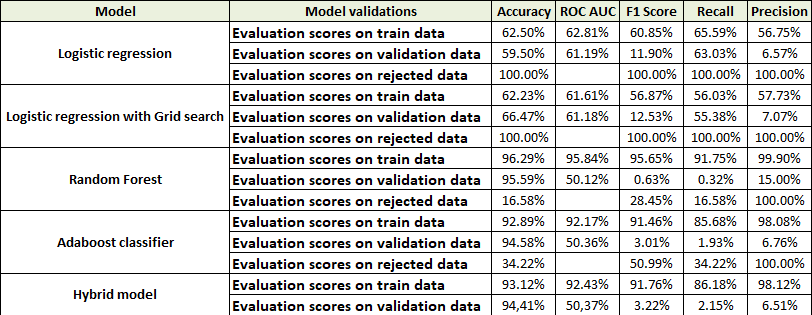


### Lift & gain chart. We will take threshhold value as 0.47 obtained from logistic regression

In [343]:
y_res_pred_lg = y_res_pred_final
y_res_pred_lg['final_predicted'] = y_res_pred_lg.Probability.map( lambda x: 1 if x > 0.47 else 0)

y_res_pred_lg.head()

,Performance Tag,Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.206868,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.559223,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.158235,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.381555,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.517320,1,1,1,1,1,1,1,0,0,0,0,1


In [344]:
# Remove  columns between column index 0.0 to 0.9 and predicted 
y_res_pred_lg.drop(y_res_pred_lg.iloc[:, 4:14], inplace = True, axis = 1) 
y_res_pred_lg.head()

,Performance Tag,Probability,predicted,0.0
0,0,0.206868,0,1
1,0,0.559223,1,1
2,0,0.158235,0,1
3,0,0.381555,0,1
4,0,0.517320,1,1


In [345]:
decile_df = y_res_pred_lg

decile_df['prob_range'] = pd.qcut(decile_df['Probability'], 10)
decile_df['decile'] = pd.qcut(decile_df['Probability'], 10, labels=np.arange(10, 0, -1))
decile_df

,Performance Tag,Probability,predicted,0.0,prob_range,decile
0,0,0.206868,0,1,"(0.07919999999999999, 0.216]",10
1,0,0.559223,1,1,"(0.55, 0.585]",3
2,0,0.158235,0,1,"(0.07919999999999999, 0.216]",10
3,0,0.381555,0,1,"(0.361, 0.427]",7
4,0,0.517320,1,1,"(0.514, 0.55]",4
5,0,0.614031,1,1,"(0.585, 0.622]",2
6,0,0.507176,1,1,"(0.476, 0.514]",5
7,0,0.213282,0,1,"(0.07919999999999999, 0.216]",10
8,0,0.509160,1,1,"(0.476, 0.514]",5
9,0,0.202884,0,1,"(0.07919999999999999, 0.216]",10


In [346]:
lift_df = decile_df.groupby('decile')['Probability'].count().reset_index()

lift_df_probability_range = decile_df.groupby(['prob_range','decile'])['Probability'].count().reset_index()

#lift_df_prob_range

lift_df.rename({'Probability':'total'}, axis=1, inplace=True)

lift_df_pred = decile_df[decile_df['Performance Tag']==1].groupby('decile')['Performance Tag'].count().reset_index()

lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [347]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

lift_df_final =  lift_df_final.merge(lift_df_probability_range[['prob_range','decile']],on = 'decile')

#lift_df_final

lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

lift_df_final['cumresp'] = lift_df_final['Performance Tag'].cumsum()

lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['Performance Tag']))

lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

lift_df_final

,decile,total,Performance Tag,prob_range,cumresp,gain,cumlift
9,1,8608,5450,"(0.622, 0.922]",5450,14.249111,1.424911
8,2,8607,5166,"(0.585, 0.622]",10616,27.755700,1.387785
7,3,8607,4828,"(0.55, 0.585]",15444,40.378582,1.345953
6,4,8607,4505,"(0.514, 0.55]",19949,52.156976,1.303924
5,5,8607,4568,"(0.476, 0.514]",24517,64.100084,1.282002
4,6,8608,3845,"(0.427, 0.476]",28362,74.152897,1.235882
3,7,8607,3361,"(0.361, 0.427]",31723,82.940284,1.184861
2,8,8607,2941,"(0.277, 0.361]",34664,90.629575,1.132870
1,9,8607,2128,"(0.216, 0.277]",36792,96.193265,1.068814
0,10,8608,1456,"(0.07919999999999999, 0.216]",38248,100.000000,1.000000


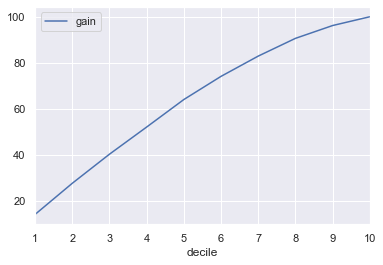

In [348]:
lift_df_final.plot.line(x='decile', y=['gain'])

##### 83%(approx) gain is provided at 7th decile. 

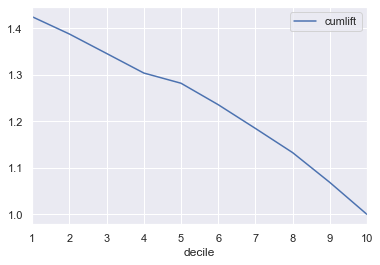

In [349]:
lift_df_final.plot.line(x='decile', y=['cumlift'])

In [350]:
#Original Defaulters rate calculation
100*(master['Performance_Tag_cred'].sum()/master['Performance_Tag_cred'].count()).round(4)

4.22

##### Lift at 7th decile is 1.18. 

### Scorecard calculation

In [351]:
y_res_pred_score= y_res_pred_final
y_res_pred_score = y_res_pred_final.iloc[: ,[0,1,2,3]]
y_res_pred_score.head()

,Performance Tag,Probability,predicted,0.0
0,0,0.206868,0,1
1,0,0.559223,1,1
2,0,0.158235,0,1
3,0,0.381555,0,1
4,0,0.517320,1,1


In [352]:
def application_score(df):
    odd_good = (1-df['Probability'])/df['Probability']
    slope = 20/(np.log(20)-np.log(10))
    score = 400 + slope * (np.log(odd_good) - np.log(10))
    return score

In [353]:
y_res_pred_score['Score'] = application_score(y_res_pred_score)
y_res_pred_score.head()

,Performance Tag,Probability,predicted,0.0,Score
0,0,0.206868,0,1,372.338402
1,0,0.559223,1,1,326.693963
2,0,0.158235,0,1,381.788462
3,0,0.381555,0,1,347.496578
4,0,0.517320,1,1,331.561610


In [354]:
y_res_pred_score.describe()

,Performance Tag,Probability,predicted,0.0,Score
count,86073.000000,86073.000000,86073.000000,86073.0,86073.000000
mean,0.444367,0.444367,0.436385,1.0,341.005839
std,0.496898,0.147431,0.495940,0.0,18.887977
min,0.000000,0.080189,0.000000,1.0,262.471510
25%,0.000000,0.326809,0.000000,1.0,325.743672
50%,0.000000,0.475698,0.000000,1.0,336.368496
75%,1.000000,0.567324,1.000000,1.0,354.412817
max,1.000000,0.921564,1.000000,1.0,403.958645


Text(0, 0.5, 'count')

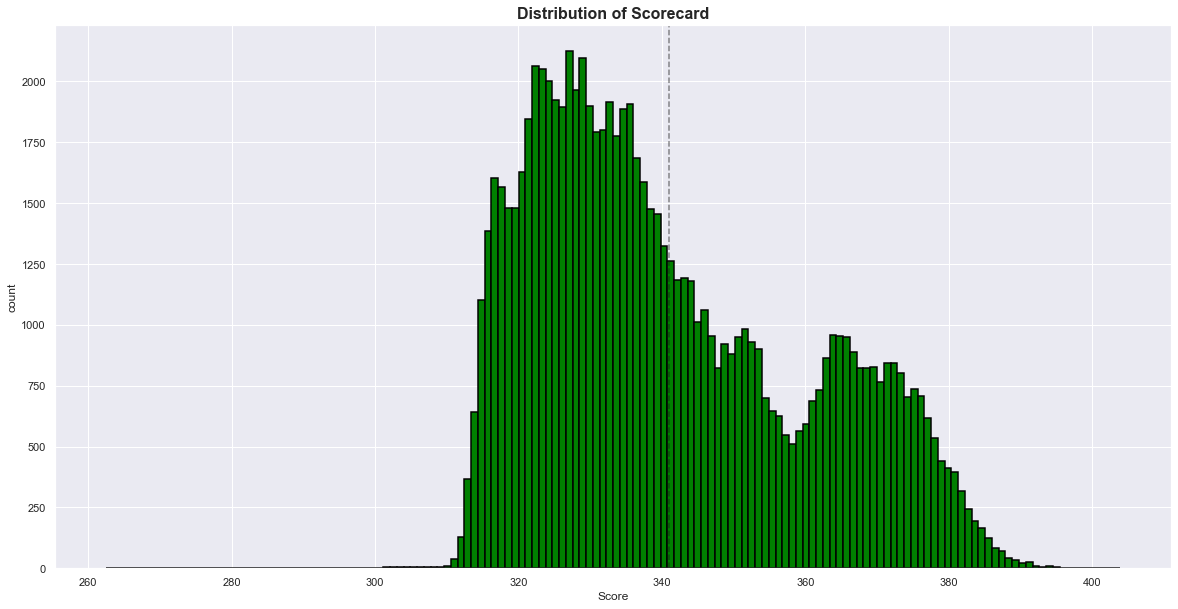

In [355]:
# Plot the Distribution of Final Scorecard with a CutOff Score 
plt.figure(figsize=(20,10))

plt.hist(y_res_pred_score['Score'],bins=150, edgecolor='black', color='green', linewidth=1.5)

plt.title('Distribution of Scorecard', fontweight='bold', fontsize=16)
plt.axvline(y_res_pred_score['Score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('count')

In [356]:
Cutoff_Score= y_res_pred_score['Score'].mean()
Cutoff_Score

341.005838921239

In [357]:
#Print Max and Min score of approved candidates
print("Max Score is: ", y_res_pred_score['Score'].max())
print("Min Score is: ", y_res_pred_score['Score'].min())

Max Score is:  403.95864509252283
Min Score is:  262.4715100754802


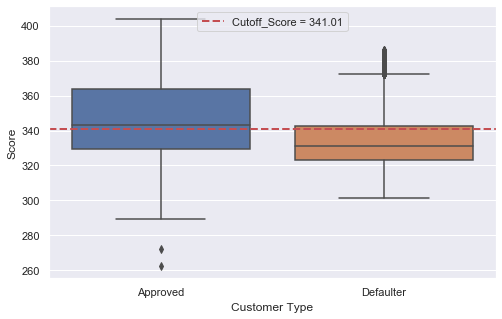

In [358]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(y=y_res_pred_score['Score'],x=y_res_pred_score['Performance Tag'].apply(lambda x:'Approved' if x==0 else 'Defaulter'))
plt.axhline(Cutoff_Score, label='Cutoff_Score = %0.2f' %Cutoff_Score,color='r',linestyle='--',linewidth=2)
ax.set_xlabel('Customer Type')
plt.legend(loc="upper center")
plt.show()

#### Mean and median score of the approved customers is higher than rejected customers. Cutoff score is indicated by red dotted line and it is 341.01

In [359]:
print( 'Mean and Median score of the Approved applicants are {0} and {1} respectively'.format(
    
    str(np.round(np.mean(y_res_pred_score[y_res_pred_score['Performance Tag']==0].Score),2)),
    str(np.round(np.median(y_res_pred_score[y_res_pred_score['Performance Tag']==0].Score),2))
))

y_res_pred_score[y_res_pred_score['Performance Tag']==0].Score.describe()

Mean and Median score of the Approved applicants are 346.01 and 342.88 respectively


count    47825.000000
mean       346.005910
std         19.669392
min        262.471510
25%        329.294095
50%        342.876664
75%        363.945956
max        403.958645
Name: Score, dtype: float64

In [360]:
print( 'Mean and Median score of the rejected applicants are {0} and {1} respectively'.format(
    
    str(np.round(np.mean(y_res_pred_score[y_res_pred_score['Performance Tag']==1].Score),2)),
    str(np.round(np.median(y_res_pred_score[y_res_pred_score['Performance Tag']==1].Score),2))
))

y_res_pred_score[y_res_pred_score['Performance Tag']==1].Score.describe()

Mean and Median score of the rejected applicants are 334.75 and 331.14 respectively


count    38248.000000
mean       334.753789
std         15.771515
min        301.456531
25%        322.902226
50%        331.138885
75%        342.637538
max        385.909050
Name: Score, dtype: float64

In [361]:
y_res_pred_score['Cutoff_Score_Prediction'] = y_res_pred_score['Score'].apply(lambda x:1 if x <= Cutoff_Score else 0)
y_res_pred_score.head()

,Performance Tag,Probability,predicted,0.0,Score,Cutoff_Score_Prediction
0,0,0.206868,0,1,372.338402,0
1,0,0.559223,1,1,326.693963,1
2,0,0.158235,0,1,381.788462,0
3,0,0.381555,0,1,347.496578,0
4,0,0.517320,1,1,331.561610,1


In [362]:
confusion = confusion_matrix(y_res_pred_score['Performance Tag'],y_res_pred_score['Cutoff_Score_Prediction'])
confusion

array([[25344, 22481],
       [10408, 27840]], dtype=int64)

In [363]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Accuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))

Accuracy:0.618
Sensitivity:0.728
Specificity:0.53


#### Calculate credit loss saved when model is used

In [364]:
defaulter =len(y_res_pred_score[(y_res_pred_score['Cutoff_Score_Prediction']==0) & (y_res_pred_score['Performance Tag']==1)])
total_defaulters = len(y_res_pred_score[y_res_pred_score['Performance Tag']==1])
total_customers = len(y_res_pred_score)
percent_defaulters_without_model = round(100*total_defaulters/total_customers,2)
percent_defaulters_with_model = round(100*defaulter/total_customers,2)
rejected_cust_non_defaulters = len(y_res_pred_score[y_res_pred_score['Cutoff_Score_Prediction']=='Non-defaulters'])

In [365]:
print("Number of Customers who are actual defaulters but identified as non-defaulters by the model : {}".format(defaulter))
print("Total number of defaulters : {}".format(total_defaulters))
print("% of candidates approved and then defaulted when model was not used : {}%".format(percent_defaulters_without_model))
print("% of candidates approved and then defaulted when model was used : {}%".format(percent_defaulters_with_model))
print("% of Credit Loss saved : {}%".format(round(percent_defaulters_without_model-percent_defaulters_with_model,2)))

Number of Customers who are actual defaulters but identified as non-defaulters by the model : 10408
Total number of defaulters : 38248
% of candidates approved and then defaulted when model was not used : 44.44%
% of candidates approved and then defaulted when model was used : 12.09%
% of Credit Loss saved : 32.35%


##### Assume that average credit loss for defaulted customer is Rs 100000/- and profit for each non-defaulters be Rs 30000/-

In [366]:
# Calcuate revenu loss(good customers are identified as bad and their application is rejected)
model_non_defaulters = len(y_res_pred_score[(y_res_pred_score['Performance Tag']==0) & (y_res_pred_score['Cutoff_Score_Prediction']==1)])
total_non_defaulters = len(y_res_pred_score[y_res_pred_score['Performance Tag']==0])
print("Number of customers who are actual non-defaulters but identified as defaulters by the model : {}"\
      .format(model_non_defaulters))
print("Number of non-defaulters correctly identified by model : {}".format(total_non_defaulters-model_non_defaulters))
print("Total number of non-defaulters : {}".format(total_non_defaulters))
print("% of good candidates rejected by model : {:.2f}%".format(model_non_defaulters/total_non_defaulters*100))

Number of customers who are actual non-defaulters but identified as defaulters by the model : 22481
Number of non-defaulters correctly identified by model : 25344
Total number of non-defaulters : 47825
% of good candidates rejected by model : 47.01%


In [367]:
profit_without_model = (total_defaulters*100000-total_non_defaulters*30000)/10000000
profit_with_model = (defaulter*100000-(total_non_defaulters-model_non_defaulters)*30000)/10000000
print("Net profit without model : Rs {:.2f} crores".format(profit_with_model))
print("Net profit with model : Rs {:.2f} crores".format(profit_without_model))
print("Net Financial gain using the model : Rs {:.2f} crores".format(profit_without_model-profit_with_model))
print("% Financial Gain : {:.2f}%".format((profit_without_model-profit_with_model)/profit_without_model*100))

Net profit without model : Rs 28.05 crores
Net profit with model : Rs 239.00 crores
Net Financial gain using the model : Rs 210.96 crores
% Financial Gain : 88.26%
